<a href="https://colab.research.google.com/github/nafrielramadhan/health-admission/blob/main/health_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Fakultas Ilmu Komputer, Universitas Indonesia

Questions answered by: Muhammad Nafriel Ramadhan & Ayu Putri Dewi Fitriyani
##**Final Project: Health Admission**

</center>


## Import Library Data

Sumber Data: https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction dengan pengubahan

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

import plotly.express as px
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler

## Data Understanding

Dataset berisikan **informasi umum**, **diagnosa penyakit**, **hasil lab**, dan **data pasien selama dirawat** di rumah sakit.

Deskripsi kolom:
- `SNO` : Serial Number (unique)
- `MRD No.` : Admission Number
- `D.O.A`  : Date of Admission
- `D.O.D`   : Date of Discharge
- `AGE`     : Age patient
- `GENDER`  : Gender patient (F (Female)/M (Male)
- `RURAL`   : Household are of patient ( U (Urban)/ R (Rural))
- `TYPE OF ADMISSION-EMERGENCY/OPD`  : O (Outpatient)/E (Emergency)
- `month year`   : Month and year of admission
- `DURATION OF STAY`   : How long the patient stay in hospital
- `duration of intensive unit stay`  : How long the patient do intensive stay in - `hospital
- `SMOKING` : Is patient smoke? (1 (True)/ 0(False))
- `ALCOHOL`  : Is patient drink alcohol? (1 (True)/ 0(False))
- `DM`   : Diabetes Mellitus
- `HTN` : Hypertension
- `CAD` : Coronary Artery Disease
- `PRIOR CMP` : CARDIOMYOPATHY
- `CKD`  : CHRONIC KIDNEY DISEASE
- `TLC`  : TOTAL LEUKOCYTES COUNT
- `PLATELETS` : Platelets on patient
- `GLUCOSE` : Glucose on patient
- `UREA`  
- `CREATININE`  : Creatinine on patient
- `BNP`   : B-TYPE NATRIURETIC PEPTIDE
- `RAISED CARDIAC ENZYMES`
- `EF`    : Ejection Fraction
- `SEVERE ANAEMIA`
- `ANAEMIA`   
- `STABLE ANGINA`  
- `ACS`   : Acute coronary Syndrome
- `STEMI`  : ST ELEVATION MYOCARDIAL INFARCTION
- `ATYPICAL CHEST PAIN`  
- `HEART FAILURE`    
- `HFREF`  : HEART FAILURE WITH REDUCED EJECTION FRACTION
- `HFNEF`  : HEART FAILURE WITH NORMAL EJECTION FRACTION
- `VALVULAR`  : Valvular Heart Disease
- `CHB`  : Complete Heart Block
- `SSS`  : Sick sinus syndrome
- `AKI`  : ACUTE KIDNEY INJURY
- `CVA INFRACT`  : Cerebrovascular Accident INFRACT
- `CVA BLEED`  : Cerebrovascular Accident BLEED
- `AF`  : Atrial Fibrilation
- `VT`  : Ventricular Tachycardia
- `PSVT` : PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA
- `CONGENITAL` : Congenital Heart Disease
- `UTI`  : Urinary tract infection
- `NEURO CARDIOGENIC SYNCOPE`
- `ORTHOSTATIC`
- `INFECTIVE ENDOCARDITIS`
- `DVT`  : Deep venous thrombosis
- `CARDIOGENIC SHOCK`
- `SHOCK`  
- `PULMONARY EMBOLISM`   
- `CHEST INFECTION`  
- `OUTCOME`  : outcome the patient (Discharge / DAMA (Discharged Against Medical Advice)/ Expiry)
- `HB` : Hemoglobin


In [ ]:
df = pd.read_csv('admission.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              12551 non-null  int64 
 1   MRD No.                          12551 non-null  object
 2   D.O.A                            12551 non-null  object
 3   D.O.D                            12551 non-null  object
 4   AGE                              12551 non-null  int64 
 5   GENDER                           12551 non-null  object
 6   RURAL                            12551 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  12551 non-null  object
 8   month year                       12551 non-null  object
 9   DURATION OF STAY                 12551 non-null  int64 
 10  duration of intensive unit stay  12551 non-null  int64 
 11  SMOKING                          12551 non-null  int64 
 12  ALCOHOL                         

In [ ]:
total_rows, total_attributes = df.shape
print("Jumlah data: ", total_rows)
print("Jumlah atribut: ", total_attributes)

df.head()

Jumlah data:  12551
Jumlah atribut:  56


SNO MRD No.       D.O.A       D.O.D  AGE GENDER RURAL  \
0   3615  344173   10/9/2017  10/15/2017   63      F     U   
1  14308  665288  04/02/2019  08/02/2019   47      M     U   
2   3303  203598  25/09/2017  26/09/2017   59      M     U   
3  15405  640386  17/03/2019  25/03/2019   62      M     R   
4   2232  168189   7/28/2017    8/1/2017   55      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
0                               O     Oct-17                 7  ...   
1                               O     Feb-19                 5  ...   
2                               E     Sep-17                 2  ...   
3                               E     Mar-19                 9  ...   
4                               E     Jul-17                 5  ...   

   NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  INFECTIVE ENDOCARDITIS  DVT  \
0                          0            0                       0    0   
1                          0            0                       0    0   
2                          0            0                       0    0   
3                          0            0                       0    0   
4                          0            0                       0    0   

   CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  CHEST INFECTION    OUTCOME  \
0                  0      0                   0                0  DISCHARGE   
1                  0      0                   0                0  DISCHARGE   
2                  0      0                   0                0  DISCHARGE   
3                  0      0                   0                0  DISCHARGE   
4                  0      0                   0                0  DISCHARGE   

     HB  
0  10.9  
1    15  
2  13.7  
3  13.3  
4  11.8  

[5 rows x 56 columns]

#### **Mengubah fitur `month year` ke fitur baru & Hapus `month year`**

Fitur pada month year masih berbentuk “Oct-17”, kami memutuskan untuk memisahkan month dan year. Sehingga fitur tersebut terdeteksi menjadi 2 fitur yaitu :
- `month` => berisi bilangan ordinal yakni bulan ke 1 sampai bulan ke 12
- `year`  => berisi tahunnya. Lalu kami akan lakukan drop variable “month year” yang awal tersebut.

Alasan melakukan pemisahan :
- Agar dapat menganalisis fitur lainnya (seperti fitur Duration of Stay) dengan mudah
- Bila membutuhkan informasi bulan dan tahun dapat langsung mencarinya dengan menggunakan dua fitur terpisah.

In [ ]:
import pandas as pd

df_copy = df.copy()
# Mengonversi semua nilai dalam kolom 'month year' menjadi string
df_copy['month year'] = df_copy['month year'].astype(str)

# Memisahkan kolom 'month year' menjadi dua kolom 'month' dan 'year'
df_copy[['month', 'year']] = df_copy['month year'].str.split('-', expand=True)

# Mengubah nilai bulan menjadi numerik
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Mengubah nama bulan menjadi angka
df_copy['month'] = df_copy['month'].str.lower().map(month_mapping)

# Menambahkan prefix '20' ke kolom 'year' untuk mengubah format tahun
df_copy['year'] = '20' + df_copy['year']

# Drop Month year
df_copy = df_copy.drop(columns=['month year'])

# Menampilkan beberapa baris pertama data setelah diubah
print("\nData setelah fitur month year diubah:")
df_copy.head()


Data setelah fitur month year diubah:


SNO MRD No.       D.O.A       D.O.D  AGE GENDER RURAL  \
0   3615  344173   10/9/2017  10/15/2017   63      F     U   
1  14308  665288  04/02/2019  08/02/2019   47      M     U   
2   3303  203598  25/09/2017  26/09/2017   59      M     U   
3  15405  640386  17/03/2019  25/03/2019   62      M     R   
4   2232  168189   7/28/2017    8/1/2017   55      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
0                               O                 7   
1                               O                 5   
2                               E                 2   
3                               E                 9   
4                               E                 5   

   duration of intensive unit stay  ...  INFECTIVE ENDOCARDITIS  DVT  \
0                                4  ...                       0    0   
1                                0  ...                       0    0   
2                                1  ...                       0    0   
3                                5  ...                       0    0   
4                                3  ...                       0    0   

   CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  CHEST INFECTION    OUTCOME  \
0                  0      0                   0                0  DISCHARGE   
1                  0      0                   0                0  DISCHARGE   
2                  0      0                   0                0  DISCHARGE   
3                  0      0                   0                0  DISCHARGE   
4                  0      0                   0                0  DISCHARGE   

     HB month  year  
0  10.9    10  2017  
1    15     2  2019  
2  13.7     9  2017  
3  13.3     3  2019  
4  11.8     7  2017  

[5 rows x 57 columns]

#### **Ubah Format fitur `D.O.A` -> DD/MM/YYYY**

Kami menganalisa terdapat beberapa data pada fitur D.O.A yang masih tidak sesuai format tanggal misalnya :
- Ada data yang ditulis sebagai DD/MM/YYYY
- Ada data yang ditulis sebagai MM/DD/YYYY
Maka dari itu kami ingin menyamaratakan sebagai DD/MM/YYYY

In [ ]:
from datetime import datetime
# Fungsi untuk mengkoreksi format penulisan D.O.A
def correct_date_format(row):
    doa = row['D.O.A']
    month = row['month']
    try:
        # Jika month sesuai dengan mm di D.O.A, maka formatnya mm/dd/yyyy
        if datetime.strptime(doa, '%m/%d/%Y').month == month:
            corrected_date = datetime.strptime(doa, '%m/%d/%Y').strftime('%d/%m/%Y')
            return corrected_date
    except ValueError:
        pass
    # Jika tidak sesuai, mengembalikan nilai asli
    return doa
# Menerapkan fungsi ke kolom 'D.O.A'
df_copy['D.O.A'] = df_copy.apply(correct_date_format, axis=1)

# Menampilkan beberapa baris pertama data setelah pengkoreksian format D.O.A
print("\nData setelah mengkoreksi format D.O.A:")
df_copy.head()



Data setelah mengkoreksi format D.O.A:


SNO MRD No.       D.O.A       D.O.D  AGE GENDER RURAL  \
0   3615  344173  09/10/2017  10/15/2017   63      F     U   
1  14308  665288  04/02/2019  08/02/2019   47      M     U   
2   3303  203598  25/09/2017  26/09/2017   59      M     U   
3  15405  640386  17/03/2019  25/03/2019   62      M     R   
4   2232  168189  28/07/2017    8/1/2017   55      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
0                               O                 7   
1                               O                 5   
2                               E                 2   
3                               E                 9   
4                               E                 5   

   duration of intensive unit stay  ...  INFECTIVE ENDOCARDITIS  DVT  \
0                                4  ...                       0    0   
1                                0  ...                       0    0   
2                                1  ...                       0    0   
3                                5  ...                       0    0   
4                                3  ...                       0    0   

   CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  CHEST INFECTION    OUTCOME  \
0                  0      0                   0                0  DISCHARGE   
1                  0      0                   0                0  DISCHARGE   
2                  0      0                   0                0  DISCHARGE   
3                  0      0                   0                0  DISCHARGE   
4                  0      0                   0                0  DISCHARGE   

     HB month  year  
0  10.9    10  2017  
1    15     2  2019  
2  13.7     9  2017  
3  13.3     3  2019  
4  11.8     7  2017  

[5 rows x 57 columns]

### **Bikin variabel baru `D.O.D_new` dengan cara `D.O.A + DURATION OF STAY - 1` sesuai dengan barisnya**

Kami membuat fitur baru D.O.D_new untuk menggantikan fitur D.O.D karena :
- Ada data yang ditulis sebagai DD/MM/YYYY
- Ada data yang ditulis sebagai MM/DD/YYYY
Maka dari itu kami ingin menyamaratakan sebagai DD/MM/YYYY

Selain itu, kami sebelumnya menganalisa penggunaan fitur Duration of Stay. Ternyata fitur tsb ada kaitannya dengan fitur D.O.A dan D.O.D, misalnya :
Pasien dengan SNO 3615 tercatat menginap dirumah sakit selama 7 hari yaitu dari tanggal 9 bulan Oktober 2017 sampai tanggal 15 bulan Oktober 2017 dengan informasi sebagai berikut
- SNO   = 3615
- D.O.A = 09/10/2017
- D.O.D = 15/10/2017
- Duration of Stay = 7


In [ ]:
# Mengubah kolom 'D.O.A' menjadi format datetime dulu
df_copy['D.O.A'] = pd.to_datetime(df_copy['D.O.A'], format='%d/%m/%Y')

# Menambahkan kolom 'D.O.D_new' berdasarkan D.O.A dan DURATION OF STAY
df_copy['D.O.D_new'] = df_copy.apply(lambda row: (row['D.O.A'] +
                       pd.Timedelta(days=row['DURATION OF STAY'] - 1)).strftime('%d/%m/%Y'), axis=1)

# Mengubah format kolom 'D.O.A' menjadi DD/MM/YYYY dengan strftime kembali.
# Karna sebelumnya berubah jadi DD-MM-YYYY
df_copy['D.O.A'] = df_copy['D.O.A'].dt.strftime('%d/%m/%Y')

In [ ]:
# Mengganti nilai 'D.O.D' dengan nilai dari 'D.O.D_new'
df_copy['D.O.D'] = df_copy['D.O.D_new']

# Menghapus kolom 'D.O.D_new' karena sudah tidak diperlukan lagi
df_copy = df_copy.drop(columns=['D.O.D_new'])

# Menampilkan beberapa baris pertama data setelah pengkoreksian format D.O.A
print("\nData setelah add fitur D.O.D_new -> lalu drop D.O.D:")
df_copy.head()



Data setelah add fitur D.O.D_new -> lalu drop D.O.D:


SNO MRD No.       D.O.A       D.O.D  AGE GENDER RURAL  \
0   3615  344173  09/10/2017  15/10/2017   63      F     U   
1  14308  665288  04/02/2019  08/02/2019   47      M     U   
2   3303  203598  25/09/2017  26/09/2017   59      M     U   
3  15405  640386  17/03/2019  25/03/2019   62      M     R   
4   2232  168189  28/07/2017  01/08/2017   55      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
0                               O                 7   
1                               O                 5   
2                               E                 2   
3                               E                 9   
4                               E                 5   

   duration of intensive unit stay  ...  INFECTIVE ENDOCARDITIS  DVT  \
0                                4  ...                       0    0   
1                                0  ...                       0    0   
2                                1  ...                       0    0   
3                                5  ...                       0    0   
4                                3  ...                       0    0   

   CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  CHEST INFECTION    OUTCOME  \
0                  0      0                   0                0  DISCHARGE   
1                  0      0                   0                0  DISCHARGE   
2                  0      0                   0                0  DISCHARGE   
3                  0      0                   0                0  DISCHARGE   
4                  0      0                   0                0  DISCHARGE   

     HB month  year  
0  10.9    10  2017  
1    15     2  2019  
2  13.7     9  2017  
3  13.3     3  2019  
4  11.8     7  2017  

[5 rows x 57 columns]

### **Ringkasan Dataset Saat ini**

In [ ]:
total_rows, total_attributes = df_copy.shape
print("Jumlah data: ", total_rows)
print("Jumlah atribut: ", total_attributes)

df_copy.head()

Jumlah data:  12551
Jumlah atribut:  57


SNO MRD No.       D.O.A       D.O.D  AGE GENDER RURAL  \
0   3615  344173  09/10/2017  15/10/2017   63      F     U   
1  14308  665288  04/02/2019  08/02/2019   47      M     U   
2   3303  203598  25/09/2017  26/09/2017   59      M     U   
3  15405  640386  17/03/2019  25/03/2019   62      M     R   
4   2232  168189  28/07/2017  01/08/2017   55      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
0                               O                 7   
1                               O                 5   
2                               E                 2   
3                               E                 9   
4                               E                 5   

   duration of intensive unit stay  ...  INFECTIVE ENDOCARDITIS  DVT  \
0                                4  ...                       0    0   
1                                0  ...                       0    0   
2                                1  ...                       0    0   
3                                5  ...                       0    0   
4                                3  ...                       0    0   

   CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  CHEST INFECTION    OUTCOME  \
0                  0      0                   0                0  DISCHARGE   
1                  0      0                   0                0  DISCHARGE   
2                  0      0                   0                0  DISCHARGE   
3                  0      0                   0                0  DISCHARGE   
4                  0      0                   0                0  DISCHARGE   

     HB month  year  
0  10.9    10  2017  
1    15     2  2019  
2  13.7     9  2017  
3  13.3     3  2019  
4  11.8     7  2017  

[5 rows x 57 columns]

Dari informasi tersebut terdapat 12551 baris dengan 57 Fitur karena kami sekarang sudah memisahkan fitur `month year`

In [ ]:
df_copy.describe()

SNO           AGE  DURATION OF STAY  \
count  12551.000000  12551.000000      12551.000000   
mean    7868.738666     61.402358          6.450641   
std     4550.914447     13.364793          4.914368   
min        1.000000      4.000000          1.000000   
25%     3919.500000     54.000000          3.000000   
50%     7855.000000     62.000000          5.000000   
75%    11788.500000     70.000000          8.000000   
max    15757.000000    110.000000         58.000000   

       duration of intensive unit stay      SMOKING        ALCOHOL  \
count                     12551.000000  12551.000000  12551.000000   
mean                          3.829336      0.050275      0.066608   
std                           4.004006      0.218520      0.249352   
min                           0.000000      0.000000      0.000000   
25%                           1.000000      0.000000      0.000000   
50%                           3.000000      0.000000      0.000000   
75%                           5.000000      0.000000      0.000000   
max                          58.000000      1.000000      1.000000   

                 DM           HTN           CAD     PRIOR CMP  ...  \
count  12551.000000  12551.000000  12551.000000  12551.000000  ...   
mean       0.323321      0.489682      0.673731      0.156800  ...   
std        0.467763      0.499913      0.468866      0.363627  ...   
min        0.000000      0.000000      0.000000      0.000000  ...   
25%        0.000000      0.000000      0.000000      0.000000  ...   
50%        0.000000      0.000000      1.000000      0.000000  ...   
75%        1.000000      1.000000      1.000000      0.000000  ...   
max        1.000000      1.000000      1.000000      1.000000  ...   

         CONGENITAL           UTI  NEURO CARDIOGENIC SYNCOPE   ORTHOSTATIC  \
count  12551.000000  12551.000000               12551.000000  12551.000000   
mean       0.010995      0.061509                   0.008286      0.008127   
std        0.104284      0.240271                   0.090654      0.089786   
min        0.000000      0.000000                   0.000000      0.000000   
25%        0.000000      0.000000                   0.000000      0.000000   
50%        0.000000      0.000000                   0.000000      0.000000   
75%        0.000000      0.000000                   0.000000      0.000000   
max        1.000000      1.000000                   1.000000      1.000000   

       INFECTIVE ENDOCARDITIS           DVT  CARDIOGENIC SHOCK         SHOCK  \
count            12551.000000  12551.000000       12551.000000  12551.000000   
mean                 0.001753      0.013704           0.058163      0.042546   
std                  0.041832      0.116264           0.234060      0.201840   
min                  0.000000      0.000000           0.000000      0.000000   
25%                  0.000000      0.000000           0.000000      0.000000   
50%                  0.000000      0.000000           0.000000      0.000000   
75%                  0.000000      0.000000           0.000000      0.000000   
max                  1.000000      1.000000           1.000000      1.000000   

       PULMONARY EMBOLISM         month  
count        12551.000000  12551.000000  
mean             0.014660      6.513664  
std              0.120193      3.625688  
min              0.000000      1.000000  
25%              0.000000      3.000000  
50%              0.000000      7.000000  
75%              0.000000     10.000000  
max              1.000000     12.000000  

[8 rows x 40 columns]

### **Data Redundant**

In [ ]:
stats = df_copy.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print ("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


Empty DataFrame
Columns: [redundant]
Index: []

### **Cek Outlier**

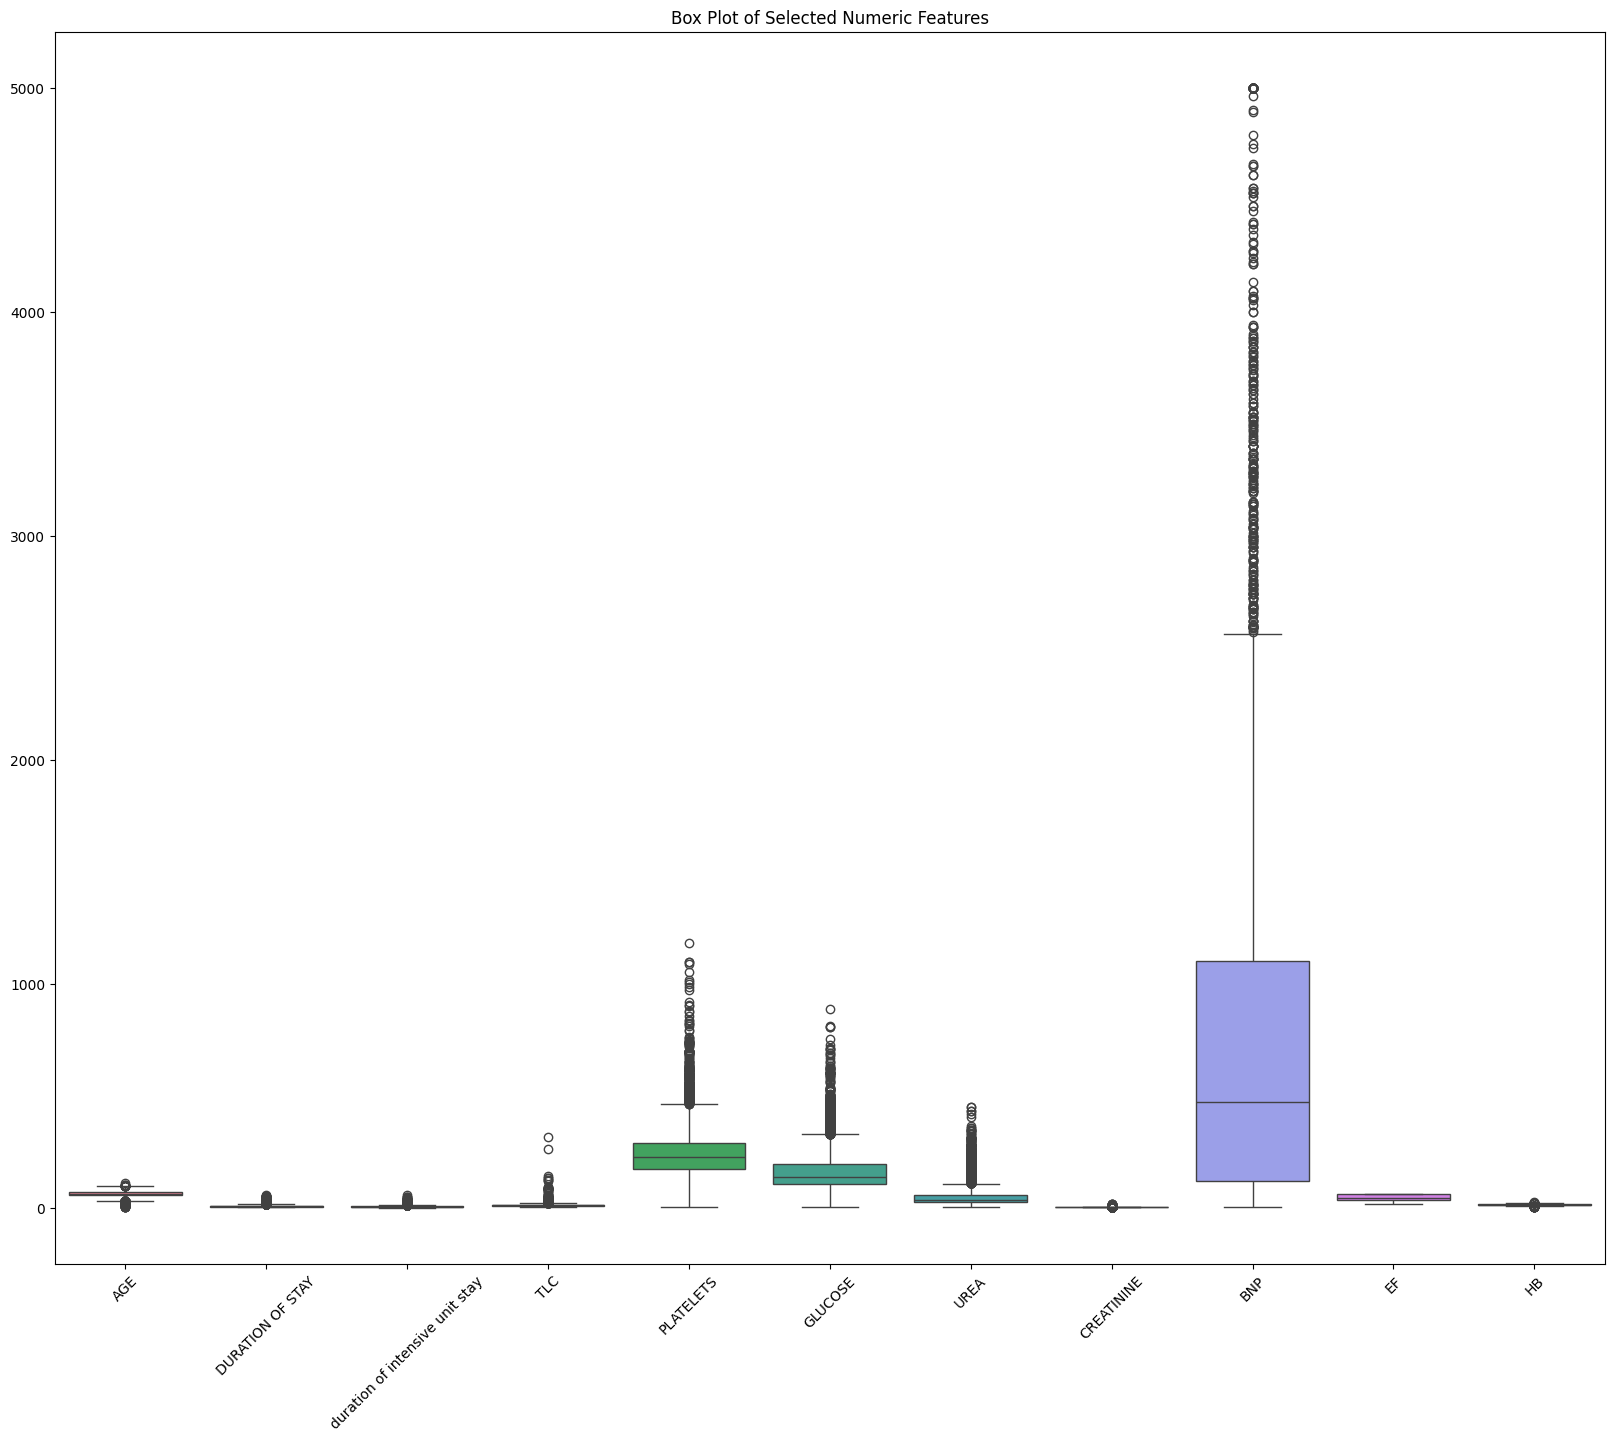

{'AGE': 267,
 'DURATION OF STAY': 585,
 'duration of intensive unit stay': 542,
 'TLC': 623,
 'PLATELETS': 371,
 'GLUCOSE': 596,
 'UREA': 1104,
 'CREATININE': 1314,
 'BNP': 356,
 'EF': 0,
 'HB': 100}

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to calculate outliers
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Numeric columns to analyze
# namun untuk D.O.A , year, dan D.O.D tidak dimasukkan untuk mengecek outlier
numeric_cols = ['AGE', 'DURATION OF STAY', 'duration of intensive unit stay', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE','BNP', 'EF', 'HB']
# Convert necessary columns to numeric, handling non-numeric entries
df_copy[numeric_cols] = df_copy[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Plotting boxplots
plt.figure(figsize=(20, 16))
sns.boxplot(data=df_copy[numeric_cols])
plt.title('Box Plot of Selected Numeric Features')
plt.xticks(rotation=45)
plt.show()

# Calculate the number of outliers for each column
outliers_count = {col: calculate_outliers(df_copy[col]) for col in numeric_cols}
outliers_count

In [ ]:
import pandas as pd

# Combine the two dictionaries of outliers count
outliers_count.update(outliers_count)

# Creating a DataFrame from the outliers count
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Features', 'Number of Outliers'])

# Display the DataFrame
outliers_df

Features  Number of Outliers
0                               AGE                 267
1                  DURATION OF STAY                 585
2   duration of intensive unit stay                 542
3                               TLC                 623
4                         PLATELETS                 371
5                           GLUCOSE                 596
6                              UREA                1104
7                        CREATININE                1314
8                               BNP                 356
9                                EF                   0
10                               HB                 100

## Data Preprocessing

Data Preprocessing dibawah ini akan menghandle hal-hal berikut :
* handle Missing Value & duplikat data
* Melakukan encoding pada data kategorikal (?)
* Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
* Melakukan standarisasi pada dataset. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

In [ ]:
#  Mengecek ukuran dan jumlah data
print ("Jumlah kolom : " , df_copy.shape[1])
print ("Jumlah baris : " , df_copy.shape[0])

Jumlah kolom :  57
Jumlah baris :  12551


#### **Handle Missing Value & duplikat data**

In [ ]:
print ("Jumlah missing values tiap kolom\n", df_copy.isnull().sum())

Jumlah missing values tiap kolom
 SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
DURATION OF STAY                      0
duration of intensive unit stay       0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
TLC                                  33
PLATELETS                            37
GLUCOSE                             649
UREA                                 28
CREATININE                           35
BNP                                7141
RAISED CARDIAC ENZYMES                0
EF    

**Menampilkan Visualisasi Grafik & Boxplot Missing Value :**

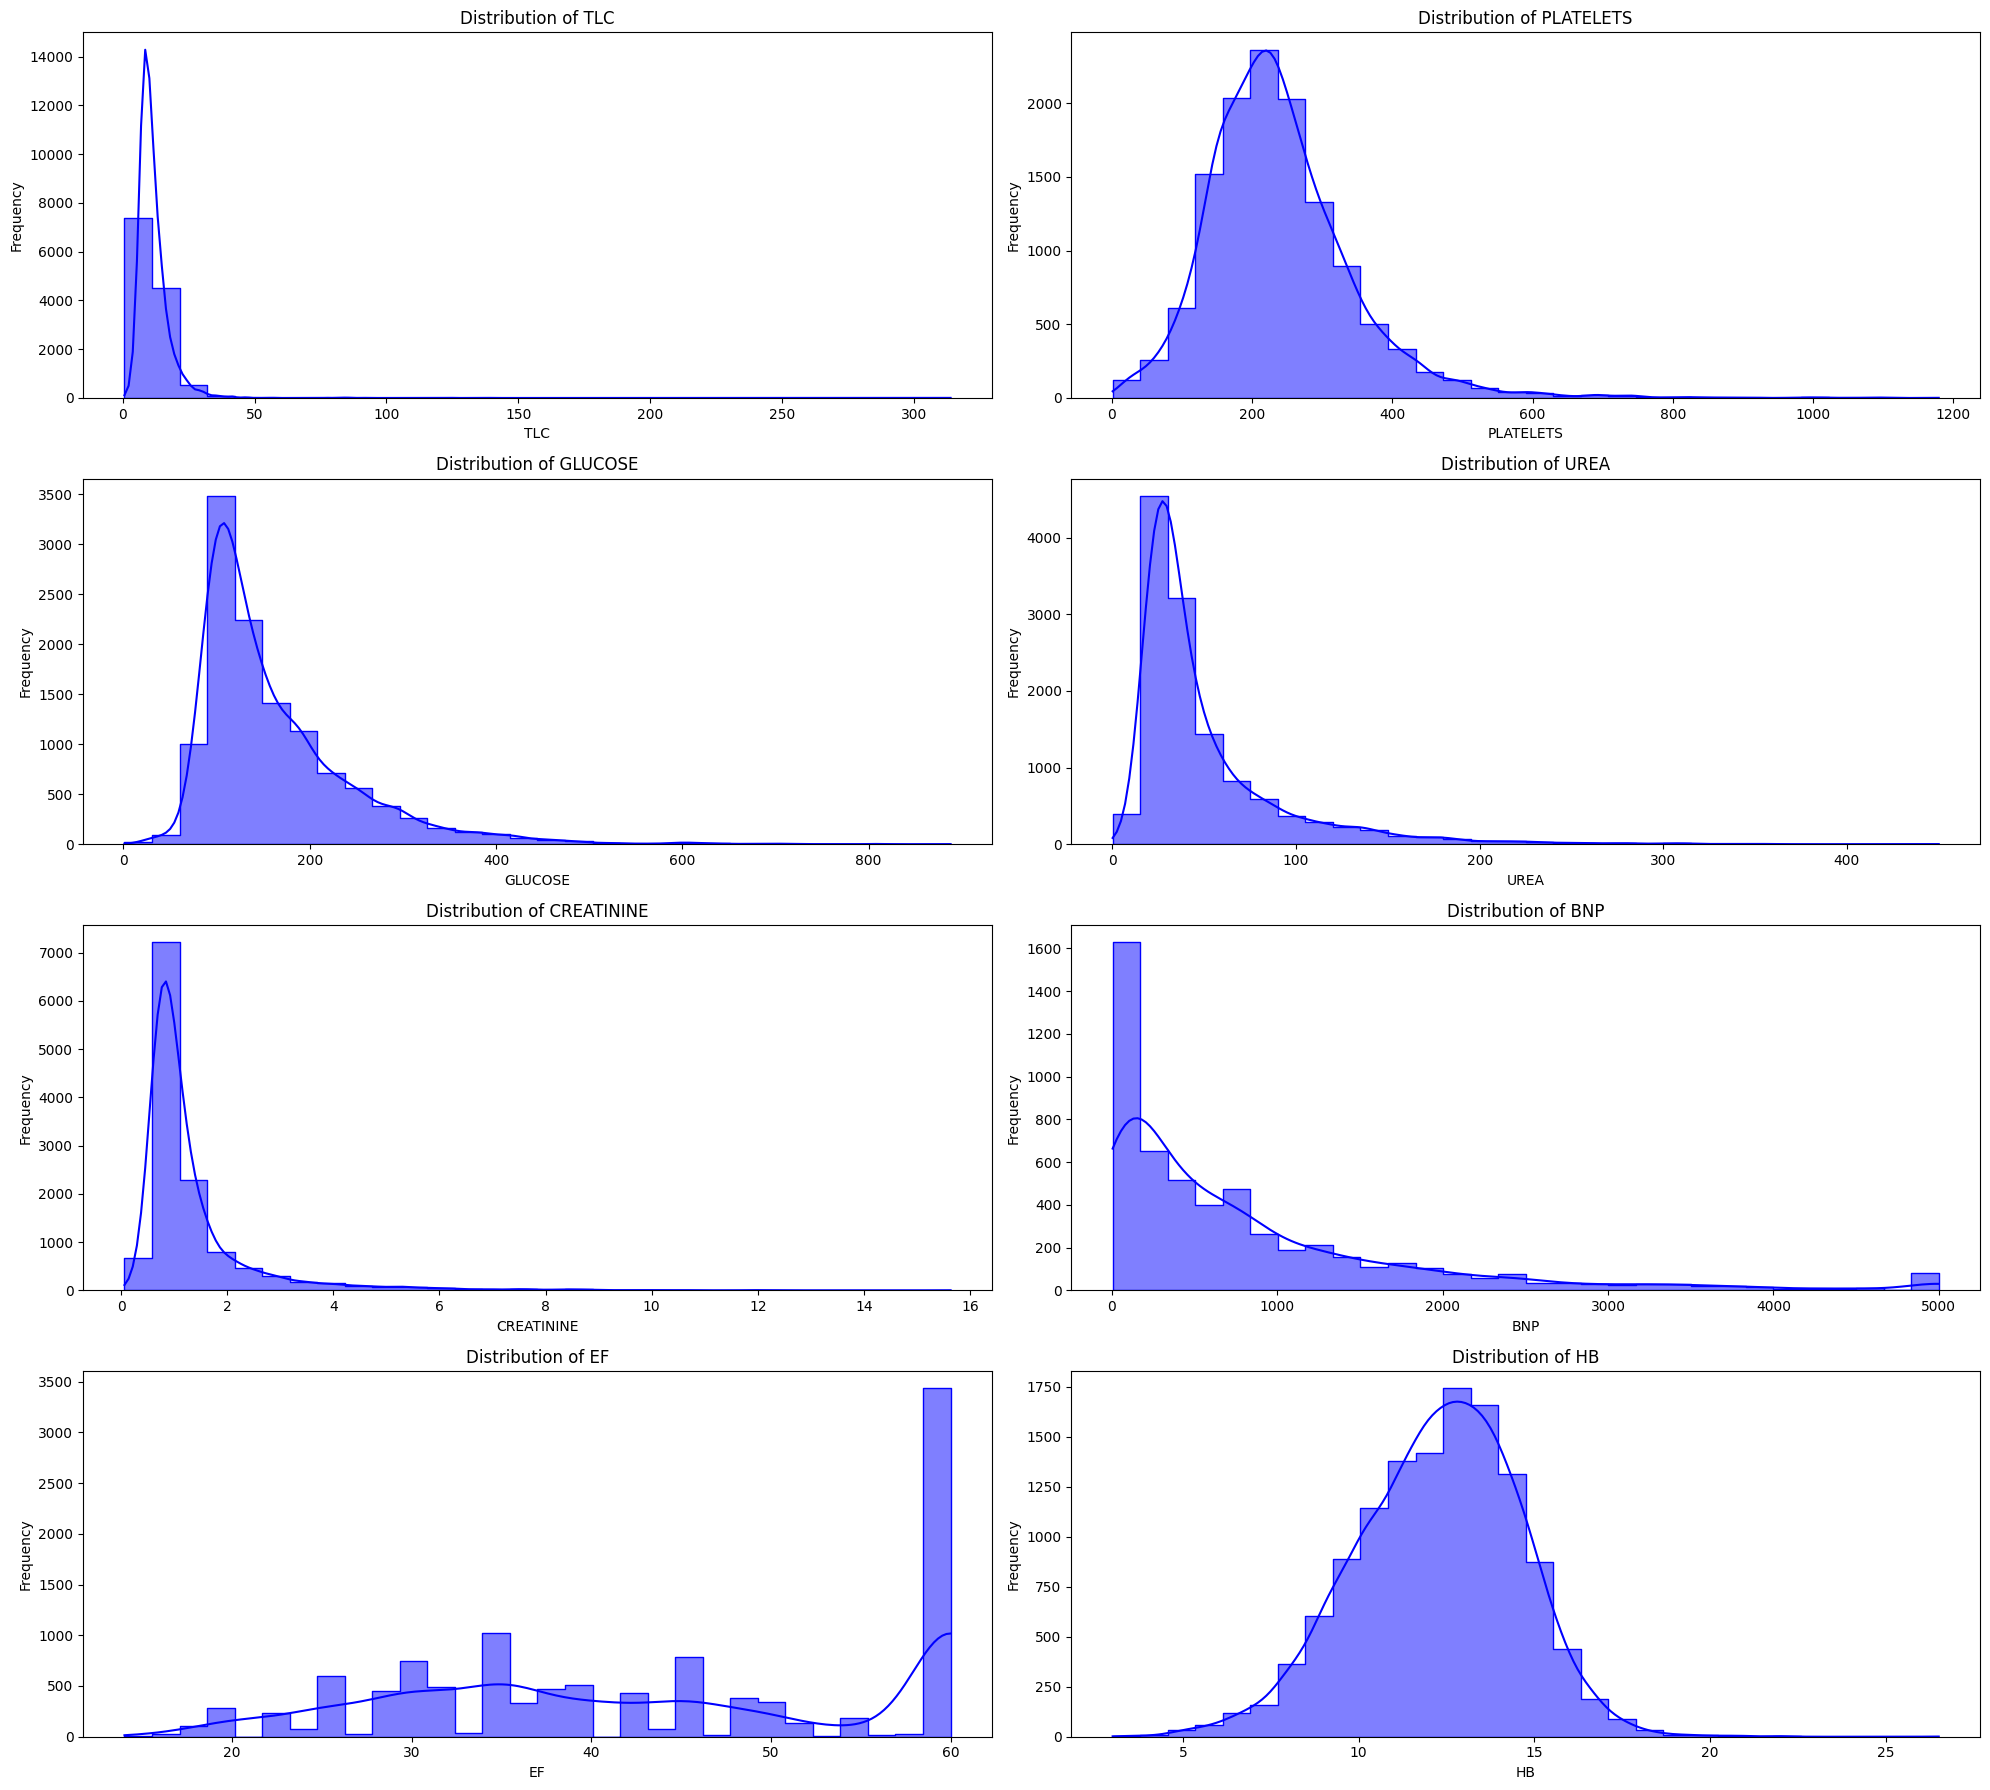

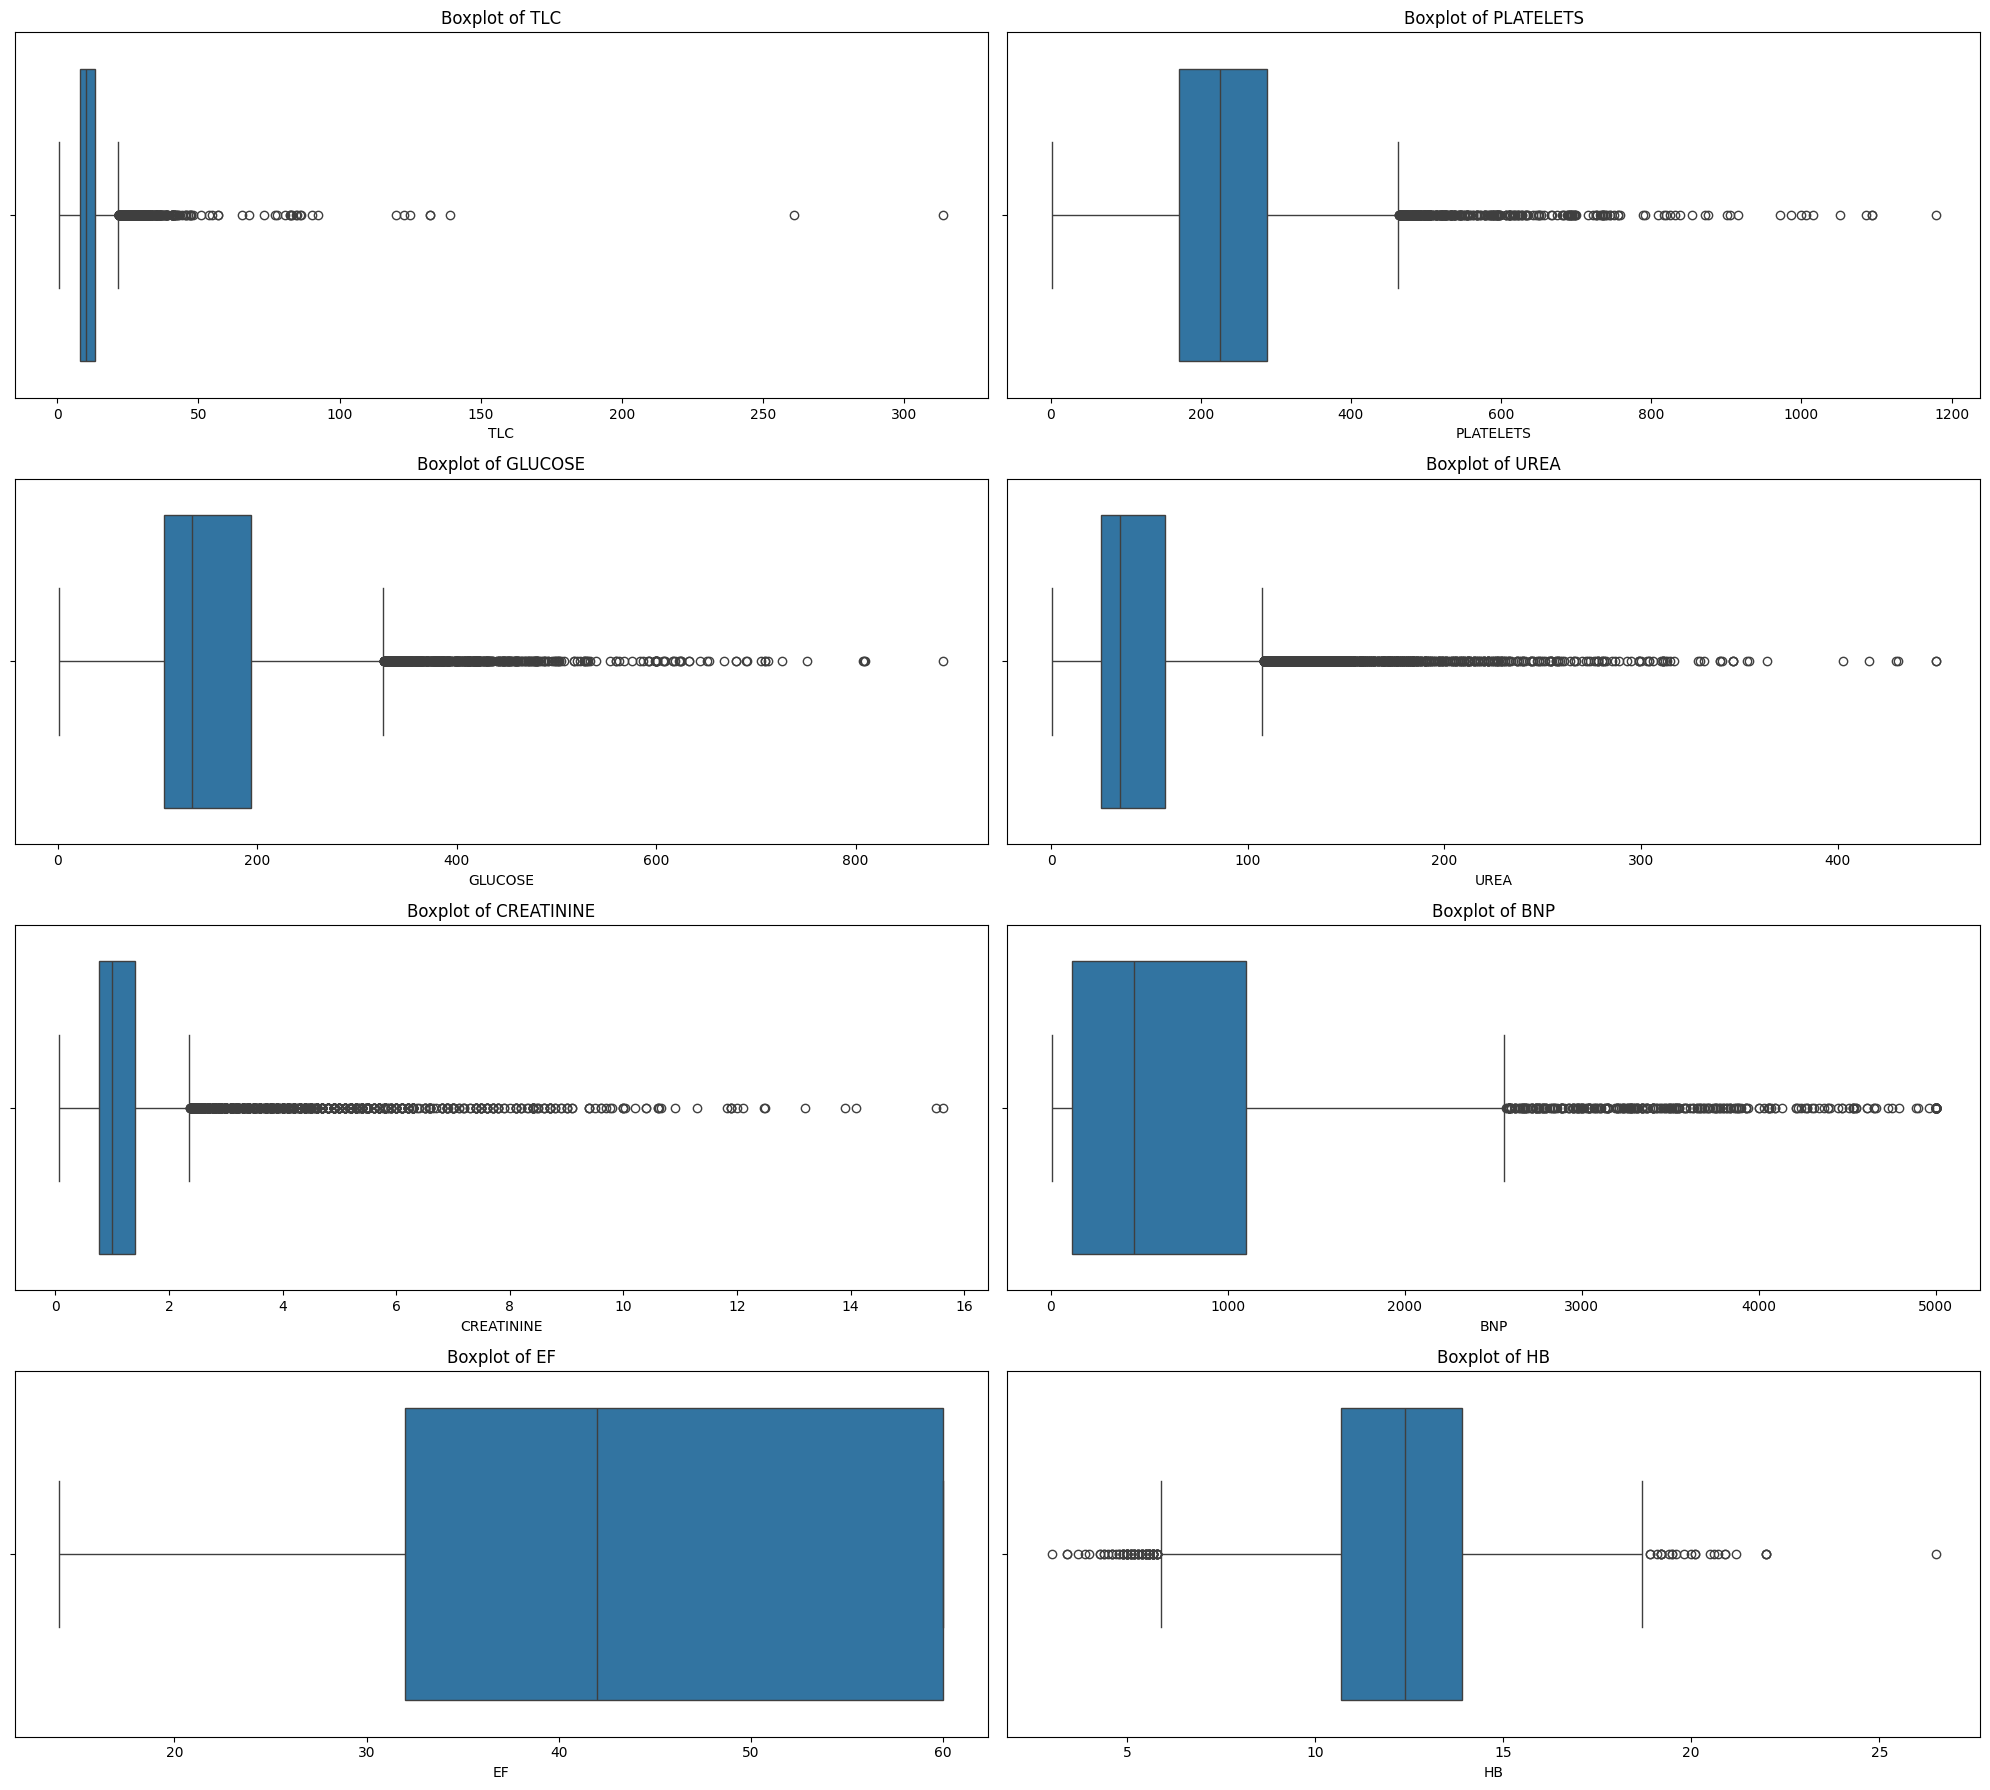

In [ ]:
import matplotlib.pyplot as plt

# Columns with missing values for visualization
columns_with_missing = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'HB']

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Loop through the columns and create a subplot for each column
for index, col in enumerate(columns_with_missing, 1):
    plt.subplot(4, 2, index)
    # Histogram for the distribution
    sns.histplot(df_copy[col].dropna(), kde=True, bins=30, color="blue", element="step")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Creating boxplots in a separate figure to better handle scale differences
plt.figure(figsize=(20, 18))

for index, col in enumerate(columns_with_missing, 1):
    plt.subplot(4, 2, index)
    # Boxplot for outlier visualization
    sns.boxplot(x=df_copy[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Extract the relevant columns for calculating skewness
relevant_columns = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'HB']

# Calculate skewness for each of these columns
skewness_values = df_copy[relevant_columns].skew()

skewness_values

TLC           12.706371
PLATELETS      1.454696
GLUCOSE        2.018762
UREA           2.814217
CREATININE     3.989751
BNP            2.096849
EF            -0.034840
HB            -0.224696
dtype: float64

Dengan melihat tipe distribusi data dan nilai skewness dari fitur dengan missing value, dapat ditemukan bahwa kebanyakan bertipe **distribusi skew**.


Oleh karena itu, melihat pentingnya data fitur tersebut untuk target model kita maka kita menghandle missing value dengan cara imputasi menggunakan nilai **median** untuk atribut TLC, GLUCOSE, UREA, CREATININE, BNP (karena memiliki nilai skewness yang tinggi). Imputasi menggunakan nilai **mean** untuk atribut PLATELETS, HB, dan EF (karena nilai skewness yang masih mendekati distribusi normal).

In [ ]:
columns_to_impute = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'HB']

# impute missing value dengan median dan mean
for col in columns_to_impute:
    if col in ['EF', 'PLATELETS', 'HB']:
        mean_value = df_copy[col].mean()
        df_copy[col].fillna(mean_value, inplace=True)
    else:
        median_value = df_copy[col].median()
        df_copy[col].fillna(median_value, inplace=True)

# Check the number of missing values per column after imputation to confirm
print("Jumlah missing values tiap kolom setelah imputasi:")
print(df_copy[columns_to_impute].isnull().sum())

Jumlah missing values tiap kolom setelah imputasi:
TLC           0
PLATELETS     0
GLUCOSE       0
UREA          0
CREATININE    0
BNP           0
EF            0
HB            0
dtype: int64


####**Melakukan encoding pada data kategorikal**



In [ ]:
df_copy

SNO MRD No.       D.O.A       D.O.D  AGE GENDER RURAL  \
0       3615  344173  09/10/2017  15/10/2017   63      F     U   
1      14308  665288  04/02/2019  08/02/2019   47      M     U   
2       3303  203598  25/09/2017  26/09/2017   59      M     U   
3      15405  640386  17/03/2019  25/03/2019   62      M     R   
4       2232  168189  28/07/2017  01/08/2017   55      F     U   
...      ...     ...         ...         ...  ...    ...   ...   
12546   5032  377273  08/12/2017  11/12/2017   65      F     U   
12547   7031  451050  03/03/2018  14/03/2018   55      F     U   
12548   5795  353502  06/01/2018  17/01/2018   86      M     U   
12549   1373  286711  14/06/2017  15/06/2017   46      M     U   
12550   6870  445881  23/02/2018  24/02/2018   60      M     U   

      TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
0                                   O                 7   
1                                   O                 5   
2                                   E                 2   
3                                   E                 9   
4                                   E                 5   
...                               ...               ...   
12546                               O                 4   
12547                               E                12   
12548                               E                12   
12549                               O                 2   
12550                               O                 2   

       duration of intensive unit stay  ...  INFECTIVE ENDOCARDITIS  DVT  \
0                                    4  ...                       0    0   
1                                    0  ...                       0    0   
2                                    1  ...                       0    0   
3                                    5  ...                       0    0   
4                                    3  ...                       0    0   
...                                ...  ...                     ...  ...   
12546                                7  ...                       0    0   
12547                                8  ...                       0    1   
12548                               12  ...                       0    0   
12549                                0  ...                       0    0   
12550                                2  ...                       0    0   

       CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  CHEST INFECTION  \
0                      0      0                   0                0   
1                      0      0                   0                0   
2                      0      0                   0                0   
3                      0      0                   0                0   
4                      0      0                   0                0   
...                  ...    ...                 ...              ...   
12546                  0      0                   0                0   
12547                  0      1                   0                0   
12548                  1      1                   0                0   
12549                  0      0                   0                0   
12550                  0      0                   0                0   

         OUTCOME    HB  month  year  
0      DISCHARGE  10.9     10  2017  
1      DISCHARGE  15.0      2  2019  
2      DISCHARGE  13.7      9  2017  
3      DISCHARGE  13.3      3  2019  
4      DISCHARGE  11.8      7  2017  
...          ...   ...    ...   ...  
12546  DISCHARGE  11.9     12  2017  
12547  DISCHARGE  20.9      3  2018  
12548     EXPIRY   9.3      1  2018  
12549  DISCHARGE  16.3      6  2017  
12550       DAMA  11.8      2  2018  

[12551 rows x 57 columns]

##### **Mengubah Fitur Kategorikal lainnya**

Kami menemukan masih terdapat fitur bersifat kategorikal pada dataset yaitu :  
**1. Fitur Gender**
- F (Female)
- M (Male)

**2. Fitur RURAL**
- U (Urban)
- R (Rural)

**3. Fitur TYPE OF ADMISSION-EMERGENCY/OPD**
- O (Outpatient)
- E (Emergency)

**4. Fitur Outcome**
Terdapat beberapa kategori yaitu :      
- **EXPIRY**: Meninggal
- **DISCHARGE**: Sembuh atau kondisinya membaik sehingga dia diperbolehkan pulang dari rumah sakit
- **DAMA**: Ini menunjukkan bahwa pasien meninggalkan rumah sakit atas permintaannya sendiri, bertentangan dengan nasihat medis. Dalam situasi ini, pasien mungkin belum sepenuhnya pulih atau masih memerlukan perawatan medis, tetapi memutuskan untuk keluar dari rumah sakit.

Untuk memudahkan Exploratory Data Analysis dan Modelling. Kami mengubahnya sebagai berikut.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_encoded = df_copy.copy()


# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada kolom-kolom tertentu
df_encoded['GENDER'] = label_encoder.fit_transform(df_encoded['GENDER'])
df_encoded['RURAL'] = label_encoder.fit_transform(df_encoded['RURAL'])
df_encoded['TYPE OF ADMISSION-EMERGENCY/OPD'] = label_encoder.fit_transform(df_encoded['TYPE OF ADMISSION-EMERGENCY/OPD'])

# Koreksi pada encoding kolom 'OUTCOME'
df_encoded['OUTCOME'] = label_encoder.fit_transform(df_encoded['OUTCOME'])

df_encoded

SNO MRD No.       D.O.A       D.O.D  AGE  GENDER  RURAL  \
0       3615  344173  09/10/2017  15/10/2017   63       0      1   
1      14308  665288  04/02/2019  08/02/2019   47       1      1   
2       3303  203598  25/09/2017  26/09/2017   59       1      1   
3      15405  640386  17/03/2019  25/03/2019   62       1      0   
4       2232  168189  28/07/2017  01/08/2017   55       0      1   
...      ...     ...         ...         ...  ...     ...    ...   
12546   5032  377273  08/12/2017  11/12/2017   65       0      1   
12547   7031  451050  03/03/2018  14/03/2018   55       0      1   
12548   5795  353502  06/01/2018  17/01/2018   86       1      1   
12549   1373  286711  14/06/2017  15/06/2017   46       1      1   
12550   6870  445881  23/02/2018  24/02/2018   60       1      1   

       TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
0                                    1                 7   
1                                    1                 5   
2                                    0                 2   
3                                    0                 9   
4                                    0                 5   
...                                ...               ...   
12546                                1                 4   
12547                                0                12   
12548                                0                12   
12549                                1                 2   
12550                                1                 2   

       duration of intensive unit stay  ...  INFECTIVE ENDOCARDITIS  DVT  \
0                                    4  ...                       0    0   
1                                    0  ...                       0    0   
2                                    1  ...                       0    0   
3                                    5  ...                       0    0   
4                                    3  ...                       0    0   
...                                ...  ...                     ...  ...   
12546                                7  ...                       0    0   
12547                                8  ...                       0    1   
12548                               12  ...                       0    0   
12549                                0  ...                       0    0   
12550                                2  ...                       0    0   

       CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  CHEST INFECTION  OUTCOME  \
0                      0      0                   0                0        1   
1                      0      0                   0                0        1   
2                      0      0                   0                0        1   
3                      0      0                   0                0        1   
4                      0      0                   0                0        1   
...                  ...    ...                 ...              ...      ...   
12546                  0      0                   0                0        1   
12547                  0      1                   0                0        1   
12548                  1      1                   0                0        2   
12549                  0      0                   0                0        1   
12550                  0      0                   0                0        0   

         HB  month  year  
0      10.9     10  2017  
1      15.0      2  2019  
2      13.7      9  2017  
3      13.3      3  2019  
4      11.8      7  2017  
...     ...    ...   ...  
12546  11.9     12  2017  
12547  20.9      3  2018  
12548   9.3      1  2018  
12549  16.3      6  2017  
12550  11.8      2  2018  

[12551 rows x 57 columns]

# Exploratory Data Analysis

#### **1. Pada bulan apakah jumlah pasien terbanyak yang dirawat di rumah sakit?**

Pada nomor satu ini kita masih memakai dataframe df_copy. Belum membutuhkan
hasil encoding, hasil pemisahan dataset training & testing, dan belum membutuhkan data hasil standarisasi pada dataset

<ipython-input-29-8a0faf579a5e>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Month_Name', y='Total Days', palette='viridis')


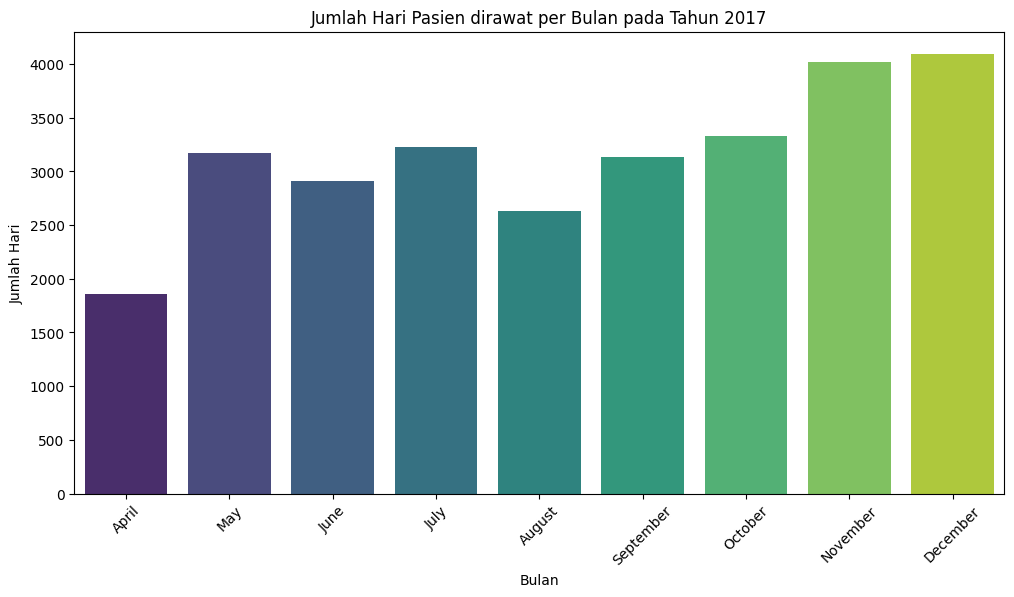

<ipython-input-29-8a0faf579a5e>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Month_Name', y='Total Days', palette='viridis')


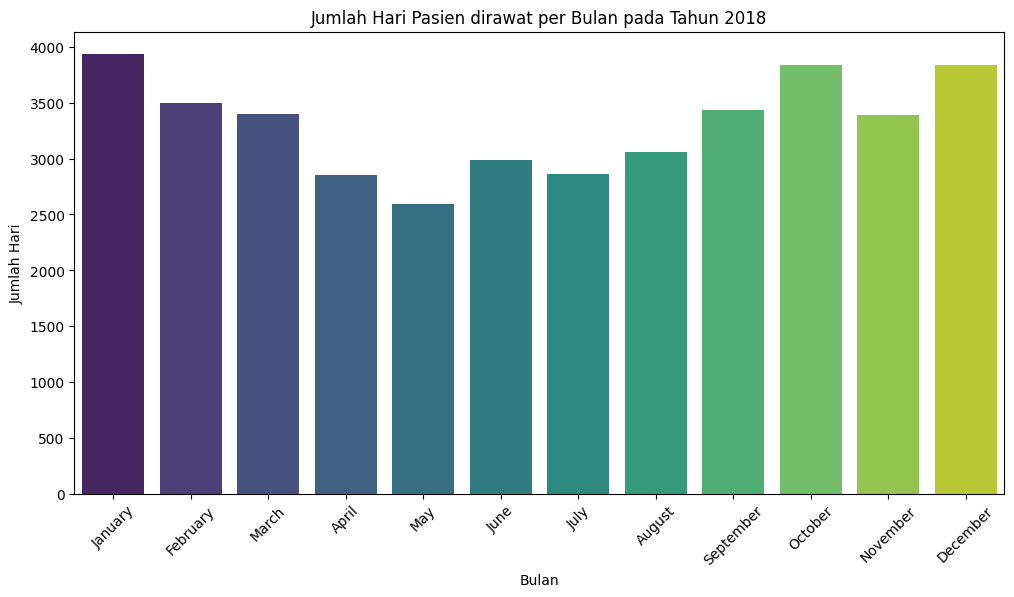

<ipython-input-29-8a0faf579a5e>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Month_Name', y='Total Days', palette='viridis')


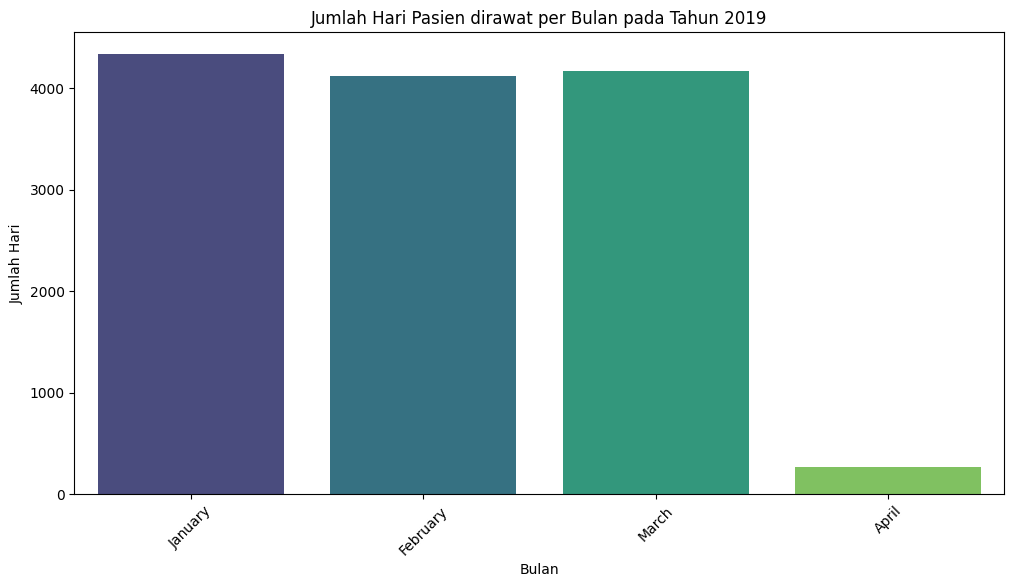

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengonversi kolom 'D.O.A' dan 'D.O.D' menjadi format datetime
df_copy['D.O.A'] = pd.to_datetime(df_copy['D.O.A'], format='%d/%m/%Y') #DD-MM-YYYY jadi bukan DD/MM/YYYY
df_copy['D.O.D'] = pd.to_datetime(df_copy['D.O.D'], format='%d/%m/%Y')

# Fungsi untuk menghitung jumlah hari dalam setiap bulan dari rentang D.O.A hingga D.O.D
def count_days_per_month(row):
    days_per_month = {}
    start_date = row['D.O.A']
    end_date = row['D.O.D']
    current_date = start_date

    while current_date <= end_date:
        month_year = current_date.strftime('%Y-%m')
        if month_year not in days_per_month:
            days_per_month[month_year] = 0
        if current_date.month == end_date.month and current_date.year == end_date.year:
            days_per_month[month_year] += (end_date - current_date).days + 1
            break
        else:
            next_month = (current_date.replace(day=28) + pd.DateOffset(days=4)).replace(day=1)
            days_per_month[month_year] += (next_month - current_date).days
            current_date = next_month

    return days_per_month

# Menghitung jumlah hari rawat inap per bulan untuk setiap pasien
days_per_month_list = df_copy.apply(count_days_per_month, axis=1)

# Menggabungkan hasil menjadi satu dictionary
total_days_per_month = {}
for days_per_month in days_per_month_list:
    for month_year, days in days_per_month.items():
        if month_year not in total_days_per_month:
            total_days_per_month[month_year] = 0
        total_days_per_month[month_year] += days


# BIKIN VISUALISASI -----------------------------------
# Mengonversi hasil ke DataFrame untuk analisis lebih lanjut
total_days_per_month_df = pd.DataFrame(list(total_days_per_month.items()), columns=['Month', 'Total Days'])
total_days_per_month_df['Month'] = pd.to_datetime(total_days_per_month_df['Month'])

# Menambahkan kolom 'Year' dan 'Month_Name' untuk mempermudah pengelompokan
total_days_per_month_df['Year'] = total_days_per_month_df['Month'].dt.year
total_days_per_month_df['Month_Name'] = total_days_per_month_df['Month'].dt.strftime('%B')

# Menyusun ulang bulan berdasarkan urutan kalender
total_days_per_month_df['Month_Num'] = total_days_per_month_df['Month'].dt.month
total_days_per_month_df = total_days_per_month_df.sort_values(by=['Year', 'Month_Num'])

# Mencari bulan dengan jumlah hari rawat inap terbanyak dalam setiap tahun
max_days_per_month_per_year = total_days_per_month_df.loc[total_days_per_month_df.groupby('Year')['Total Days'].idxmax()]

# Visualisasi bulan dengan jumlah hari rawat inap terbanyak dalam setiap tahunnya
years = total_days_per_month_df['Year'].unique()

# Membuat grafik terpisah untuk setiap tahun
for year in years:
    plt.figure(figsize=(12, 6))
    data = total_days_per_month_df[total_days_per_month_df['Year'] == year]
    sns.barplot(data=data, x='Month_Name', y='Total Days', palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Jumlah Hari Pasien dirawat per Bulan pada Tahun {year}')
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Hari')
    plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

# Mengonversi kolom 'D.O.A' dan 'D.O.D' menjadi format datetime
df_copy['D.O.A'] = pd.to_datetime(df_copy['D.O.A'], format='%d/%m/%Y') #DD-MM-YYYY jadi bukan DD/MM/YYYY
df_copy['D.O.D'] = pd.to_datetime(df_copy['D.O.D'], format='%d/%m/%Y')

# Fungsi untuk menghitung jumlah hari dalam setiap bulan dari rentang D.O.A hingga D.O.D
def count_days_per_month(row):
    days_per_month = {}
    start_date = row['D.O.A']
    end_date = row['D.O.D']
    current_date = start_date

    while current_date <= end_date:
        month_year = current_date.strftime('%Y-%m')
        if month_year not in days_per_month:
            days_per_month[month_year] = 0
        if current_date.month == end_date.month and current_date.year == end_date.year:
            days_per_month[month_year] += (end_date - current_date).days + 1
            break
        else:
            next_month = (current_date.replace(day=28) + pd.DateOffset(days=4)).replace(day=1)
            days_per_month[month_year] += (next_month - current_date).days
            current_date = next_month

    return days_per_month

# Menghitung jumlah hari rawat inap per bulan untuk setiap pasien
days_per_month_list = df_copy.apply(count_days_per_month, axis=1)

# Menggabungkan hasil menjadi satu dictionary
total_days_per_month = {}
for days_per_month in days_per_month_list:
    for month_year, days in days_per_month.items():
        if month_year not in total_days_per_month:
            total_days_per_month[month_year] = 0
        total_days_per_month[month_year] += days

# BIKIN VISUALISASI -----------------------------------
# Mengonversi hasil ke DataFrame untuk analisis lebih lanjut
total_days_per_month_df = pd.DataFrame(list(total_days_per_month.items()), columns=['Month', 'Total Days'])
total_days_per_month_df['Month'] = pd.to_datetime(total_days_per_month_df['Month'])

# Menambahkan kolom 'Year' dan 'Month_Name' untuk mempermudah pengelompokan
total_days_per_month_df['Year'] = total_days_per_month_df['Month'].dt.year
total_days_per_month_df['Month_Name'] = total_days_per_month_df['Month'].dt.strftime('%B')

# Menyusun ulang bulan berdasarkan urutan kalender
total_days_per_month_df['Month_Num'] = total_days_per_month_df['Month'].dt.month
total_days_per_month_df = total_days_per_month_df.sort_values(by=['Year', 'Month_Num'])

# Mengganti nama kolom untuk tampilan akhir
table = total_days_per_month_df[['Year', 'Month_Name', 'Total Days']]
table.columns = ['Tahun', 'Bulan', 'Total Hari Pasien Dirawat']

# Menampilkan tabel hasil
table


Tahun      Bulan  Total Hari Pasien Dirawat
24   2017      April                       1855
9    2017        May                       3170
14   2017       June                       2914
4    2017       July                       3226
5    2017     August                       2629
2    2017  September                       3129
0    2017    October                       3331
12   2017   November                       4013
15   2017   December                       4096
6    2018    January                       3941
10   2018   February                       3502
11   2018      March                       3401
18   2018      April                       2855
19   2018        May                       2593
13   2018       June                       2984
17   2018       July                       2866
7    2018     August                       3059
8    2018  September                       3431
20   2018    October                       3836
16   2018   November                       3391
22   2018   December                       3840
23   2019    January                       4336
1    2019   February                       4125
3    2019      March                       4173
21   2019      April                        266

Kesimpulan :
- Pada tahun 2017 pasien terbanyak yaitu pada bulan December.
- Pada tahun 2018 pasien terbanyak yaitu pada bulan January.
- Pada tahun 2019 pasien terbanyak yaitu pada bulan January.

#### **2. Bagaimana karakteristik pasien yang menderita heart failure?**

Statistik Deskriptif Pasien dengan Heart Failure:
                SNO                          D.O.A  \
count   3665.000000                           3665   
mean    8306.958527  2018-05-08 21:49:56.889495296   
min        1.000000            2017-04-01 00:00:00   
25%     4541.000000            2017-11-20 00:00:00   
50%     8439.000000            2018-05-19 00:00:00   
75%    12389.000000            2018-11-24 00:00:00   
max    15752.000000            2019-03-31 00:00:00   
std     4539.665398                            NaN   

                               D.O.D          AGE  DURATION OF STAY  \
count                           3665  3665.000000       3665.000000   
mean   2018-05-15 16:14:24.392905728    64.639291          7.766985   
min              2017-04-02 00:00:00    14.000000          1.000000   
25%              2017-11-27 00:00:00    57.000000          4.000000   
50%              2018-05-25 00:00:00    65.000000          7.000000   
75%              2018-11-30 00:00:00 

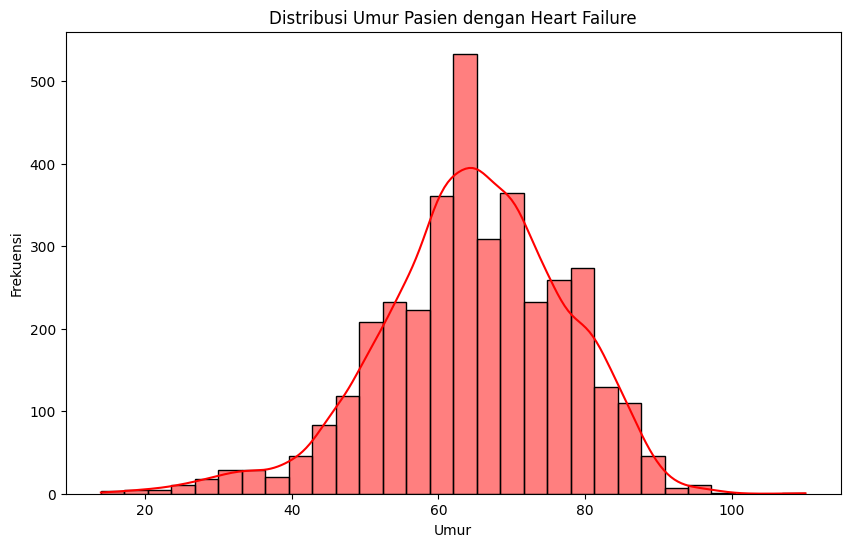

<ipython-input-31-5741e03fbd14>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart_failure_patients, x='GENDER', palette='coolwarm')


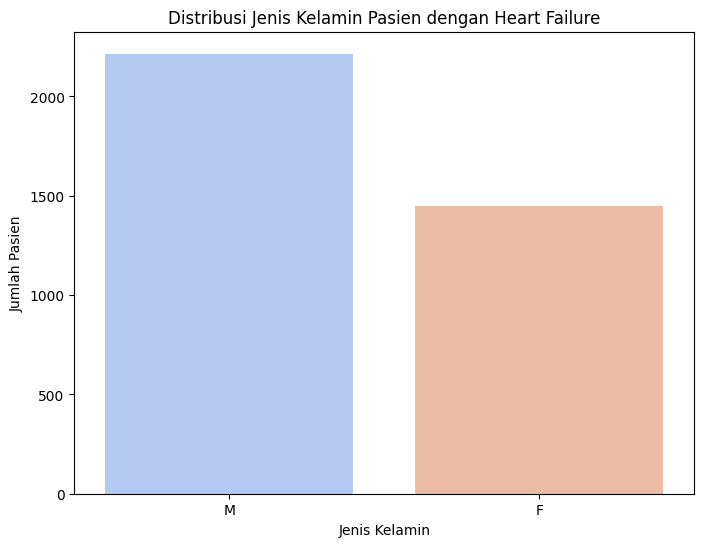

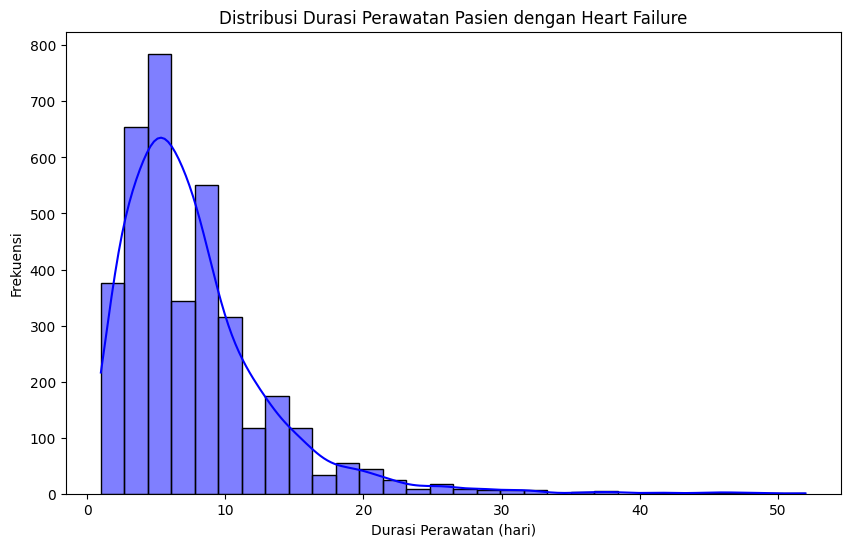

<ipython-input-31-5741e03fbd14>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart_failure_patients, x='OUTCOME', palette='viridis')


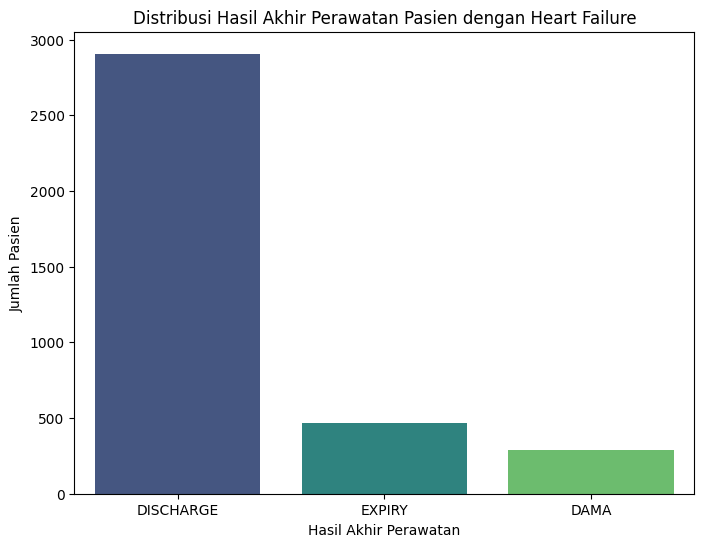

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memastikan kolom yang relevan ada
if 'HEART FAILURE' in df_copy.columns:
    # Memfilter data pasien dengan heart failure
    heart_failure_patients = df_copy[df_copy['HEART FAILURE'] == 1]

    # Analisis statistik deskriptif
    descriptive_stats = heart_failure_patients.describe()
    print("Statistik Deskriptif Pasien dengan Heart Failure:")
    print(descriptive_stats)

    # Visualisasi distribusi umur
    plt.figure(figsize=(10, 6))
    sns.histplot(heart_failure_patients['AGE'], kde=True, bins=30, color='red')
    plt.title('Distribusi Umur Pasien dengan Heart Failure')
    plt.xlabel('Umur')
    plt.ylabel('Frekuensi')
    plt.show()

    # Analisis berdasarkan jenis kelamin
    gender_distribution = heart_failure_patients['GENDER'].value_counts()
    plt.figure(figsize=(8, 6))
    sns.countplot(data=heart_failure_patients, x='GENDER', palette='coolwarm')
    plt.title('Distribusi Jenis Kelamin Pasien dengan Heart Failure')
    plt.xlabel('Jenis Kelamin')
    plt.ylabel('Jumlah Pasien')
    plt.show()

    # Distribusi durasi perawatan
    plt.figure(figsize=(10, 6))
    sns.histplot(heart_failure_patients['DURATION OF STAY'], kde=True, bins=30, color='blue')
    plt.title('Distribusi Durasi Perawatan Pasien dengan Heart Failure')
    plt.xlabel('Durasi Perawatan (hari)')
    plt.ylabel('Frekuensi')
    plt.show()

    # Visualisasi berdasarkan hasil akhir perawatan
    outcome_distribution = heart_failure_patients['OUTCOME'].value_counts()
    plt.figure(figsize=(8, 6))
    sns.countplot(data=heart_failure_patients, x='OUTCOME', palette='viridis')
    plt.title('Distribusi Hasil Akhir Perawatan Pasien dengan Heart Failure')
    plt.xlabel('Hasil Akhir Perawatan')
    plt.ylabel('Jumlah Pasien')
    plt.show()
else:
    print("Kolom 'HEART FAILURE' tidak ditemukan dalam dataset.")


##### **Mengecek korelasi antara Heart Failure dengan Fitur lain.**

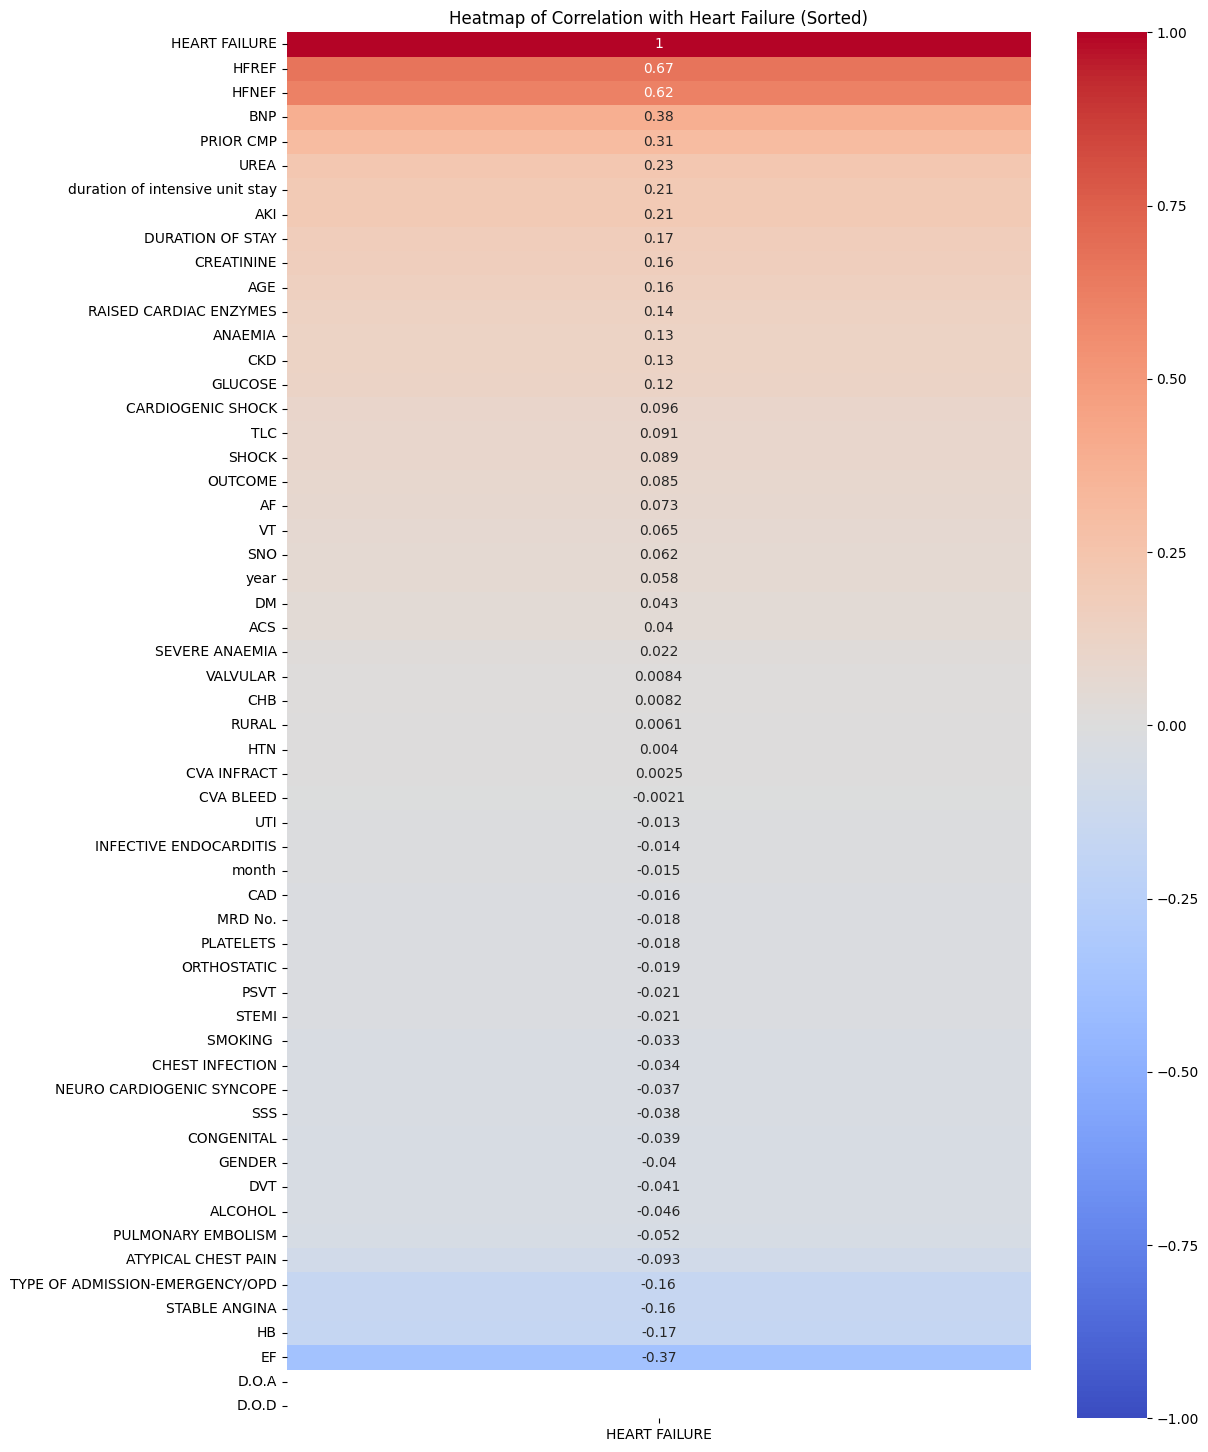

In [ ]:
# Mengonversi semua nilai yang tidak valid menjadi NaN, kemudian mengisi dengan nilai numerik atau menghapusnya
df_encoded_no2 = df_encoded.apply(pd.to_numeric, errors='coerce')

# Mengisi nilai NaN dengan nilai median dari masing-masing kolom
df_encoded_no2 = df_encoded_no2.fillna(df_encoded_no2.median())

# Menghitung korelasi antara 'HEART FAILURE' dengan semua variabel lain di df_encoded
correlation_matrix = df_encoded_no2.corr()

# Mengurutkan korelasi dengan 'HEART FAILURE' dari tertinggi hingga terendah
sorted_correlation = correlation_matrix[['HEART FAILURE']].sort_values(by='HEART FAILURE', ascending=False)

# Membuat heatmap dengan korelasi yang sudah diurutkan
plt.figure(figsize=(12, 18))
sns.heatmap(sorted_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation with Heart Failure (Sorted)')
plt.show()

In [ ]:
# Memisahkan data pasien dengan heart failure
heart_failure_patients = df_encoded_no2[df_encoded['HEART FAILURE'] == 1]

# Menampilkan deskripsi statistik untuk pasien dengan heart failure
heart_failure_description = heart_failure_patients.describe()

# Menampilkan hasil deskripsi statistik
heart_failure_description

SNO       MRD No.  D.O.A  D.O.D          AGE       GENDER  \
count   3665.000000  3.665000e+03    0.0    0.0  3665.000000  3665.000000   
mean    8306.958527  4.053450e+05    NaN    NaN    64.639291     0.604366   
std     4539.665398  2.266949e+05    NaN    NaN    12.508634     0.489053   
min        1.000000  9.890000e+02    NaN    NaN    14.000000     0.000000   
25%     4541.000000  2.574460e+05    NaN    NaN    57.000000     0.000000   
50%     8439.000000  3.982660e+05    NaN    NaN    65.000000     1.000000   
75%    12389.000000  5.715670e+05    NaN    NaN    73.000000     1.000000   
max    15752.000000  6.408503e+06    NaN    NaN   110.000000     1.000000   

             RURAL  TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
count  3665.000000                      3665.000000       3665.000000   
mean      0.769986                         0.194543          7.766985   
std       0.420899                         0.395902          5.543078   
min       0.000000                         0.000000          1.000000   
25%       1.000000                         0.000000          4.000000   
50%       1.000000                         0.000000          7.000000   
75%       1.000000                         0.000000         10.000000   
max       1.000000                         1.000000         52.000000   

       duration of intensive unit stay  ...  INFECTIVE ENDOCARDITIS  \
count                      3665.000000  ...             3665.000000   
mean                          5.124420  ...                0.000819   
std                           4.544277  ...                0.028603   
min                           0.000000  ...                0.000000   
25%                           2.000000  ...                0.000000   
50%                           4.000000  ...                0.000000   
75%                           7.000000  ...                0.000000   
max                          48.000000  ...                1.000000   

               DVT  CARDIOGENIC SHOCK        SHOCK  PULMONARY EMBOLISM  \
count  3665.000000        3665.000000  3665.000000         3665.000000   
mean      0.006276           0.093042     0.070396            0.004911   
std       0.078980           0.290531     0.255848            0.069918   
min       0.000000           0.000000     0.000000            0.000000   
25%       0.000000           0.000000     0.000000            0.000000   
50%       0.000000           0.000000     0.000000            0.000000   
75%       0.000000           0.000000     0.000000            0.000000   
max       1.000000           1.000000     1.000000            1.000000   

       CHEST INFECTION      OUTCOME           HB        month         year  
count      3665.000000  3665.000000  3665.000000  3665.000000  3665.000000  
mean          0.014188     1.049659    11.611310     6.431378  2017.859209  
std           0.118283     0.452118     2.293232     3.810716     0.694518  
min           0.000000     0.000000     3.000000     1.000000  2017.000000  
25%           0.000000     1.000000    10.000000     3.000000  2017.000000  
50%           0.000000     1.000000    11.600000     6.000000  2018.000000  
75%           0.000000     1.000000    13.200000    10.000000  2018.000000  
max           1.000000     2.000000    20.500000    12.000000  2019.000000  

[8 rows x 57 columns]

Berdasarkan hasil gambar Heatmap sebelumnya, `D.O.D` dan `D.O.A` kosong karena kami tidak melakukan drop pada kedua fitur tersebut ketika melakukan cek korelasi antara `Heart Failure` dengan fitur lain .

Berikut adalah karakteristik pasien yang bisa kami dapatkan untuk mengetahui informasi terkait fitur lain yang ada kaitannya dengan orang-orang yang menderita `Heart Failure`
1. **Umur (AGE)**:
    - Rata-rata: 64.6 tahun
    - Minimum: 14 tahun
    - Maksimum: 110 tahun
2. **Jenis Kelamin (GENDER)**:
    - Rata-rata: 0.6 (0 untuk perempuan, 1 untuk laki-laki)
    - Indikasi bahwa lebih banyak laki-laki yang menderita heart failure dalam dataset ini
3. **Lokasi (RURAL)**:
    - Rata-rata: 0.77 (0 untuk R, 1 untuk U)
    - Sebagian besar pasien berasal dari daerah urban (U)
4. **Tipe Penerimaan (TYPE OF ADMISSION-EMERGENCY/OPD)**:
    - Rata-rata: 0.19 (1 untuk OPD, 0 untuk Emergency)
    - Lebih banyak pasien yang diterima melalui OPD (Outpatient Department)
5. **Durasi Tinggal (DURATION OF STAY)**:
    - Rata-rata: 7.77 hari
    - Minimum: 1 hari
    - Maksimum: 52 hari
6. **Outcome (OUTCOME)**:
    - Rata-rata: 1.05 (0 untuk DAMA, 1 untuk DISCHARGE, dan 2 untuk EXPIRY)
    - Sebagian besar pasien sembuh setelah perawatan

#### **3. Penyakit apa yang terbanyak diderita pasien yang berumur 19 - 25 tahun?**

In [ ]:
# Filter data pasien berumur 19 - 25 tahun
age_filtered_df = df_encoded[(df_encoded['AGE'] >= 19) & (df_encoded['AGE'] <= 25)]


<ipython-input-35-6a633cbcfc51>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df[col] = pd.to_numeric(age_filtered_df[col], errors='coerce')
<ipython-input-35-6a633cbcfc51>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=disease_counts_df, x='Penyakit', y='Jumlah Pasien', palette='viridis')


                     Penyakit  Jumlah Pasien
0                         ACS             17
1               HEART FAILURE             16
2                         CAD             12
3                     ANAEMIA             12
4                   PRIOR CMP              9
5                       HFREF              9
6                         AKI              9
7                       STEMI              8
8                       SHOCK              8
9                       HFNEF              7
10          CARDIOGENIC SHOCK              7
11                   VALVULAR              5
12                 CONGENITAL              5
13                         VT              5
14                        DVT              4
15         PULMONARY EMBOLISM              3
16        ATYPICAL CHEST PAIN              3
17             SEVERE ANAEMIA              3
18                        CKD              3
19                        HTN              2
20     INFECTIVE ENDOCARDITIS              2
21        

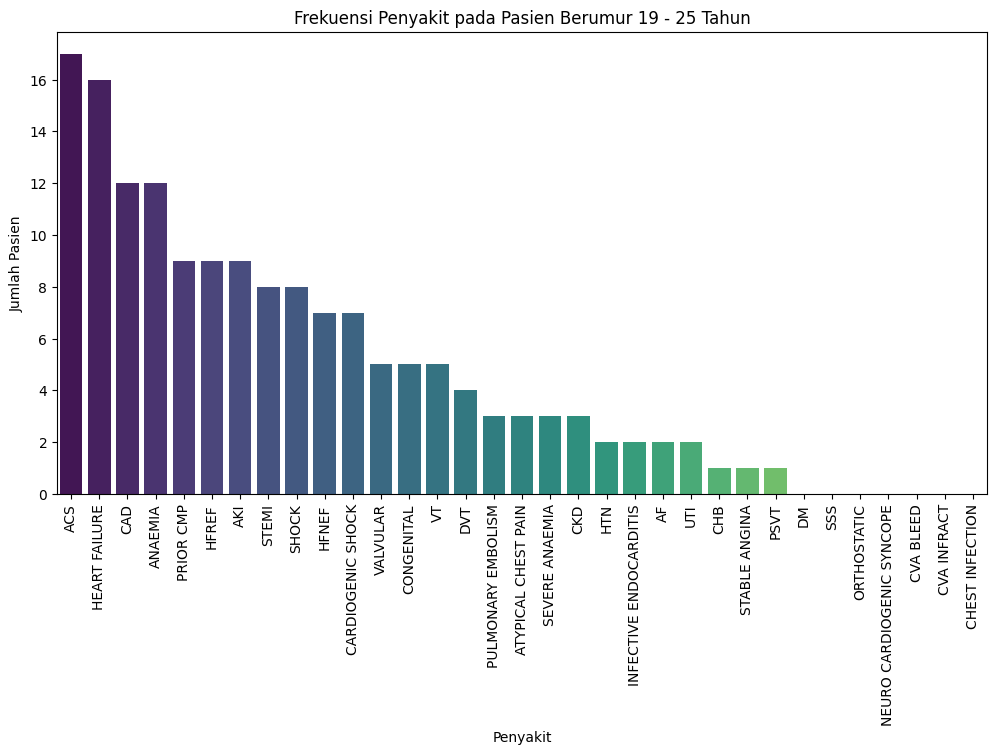

In [ ]:
# Daftar kolom penyakit
disease_columns = [
    'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA',
    'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
    'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL',
    'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT',
    'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION'
]

# Mengonversi kolom-kolom penyakit menjadi tipe numerik
for col in disease_columns:
    age_filtered_df[col] = pd.to_numeric(age_filtered_df[col], errors='coerce')

# Menghitung frekuensi masing-masing penyakit
disease_counts = age_filtered_df[disease_columns].sum().sort_values(ascending=False)

# Menampilkan tabel frekuensi penyakit
disease_counts_df = disease_counts.reset_index()
disease_counts_df.columns = ['Penyakit', 'Jumlah Pasien']

# Menampilkan tabel
print(disease_counts_df)

# Visualisasi hasil
plt.figure(figsize=(12, 6))
sns.barplot(data=disease_counts_df, x='Penyakit', y='Jumlah Pasien', palette='viridis')
plt.title('Frekuensi Penyakit pada Pasien Berumur 19 - 25 Tahun')
plt.xlabel('Penyakit')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=90)
plt.show()


Dari analisis grafik dan table yang ditampilkan, didapat bahwa penyakit terbanyak pada pasien berumur 19 - 25 tahun yaitu **ACS (Acure Coronary Syndrome)** yaitu : Sindrom koroner akut, istilah umum untuk situasi di mana aliran darah ke jantung tiba-tiba berkurang, mencakup infark miokard dan angina tidak stabil.

#### **4.  Apakah pasien yang memiliki kebiasan merokok dan tinggal di daerah urban memiliki rata-rata komplikasi penyakit yang lebih banyak dibandingkan pasien yang memiliki kebiasan merokok dan tinggal di daerah rural? (komplikasi penyakit dapat diketahui dari jumlah penyakit yang diderita suatu pasien)**

In [ ]:
# Filter data untuk pasien dengan kebiasaan merokok
smoking_patients = df_encoded[df_encoded['SMOKING '] == 1].copy()

# Daftar Kolom Penyakit
disease_columns = [
    'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA',
    'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
    'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL',
    'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT',
    'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION'
]

# Memastikan hanya kolom penyakit yang memiliki tipe data numerik
disease_columns_numeric = [col for col in disease_columns if smoking_patients[col].dtype in ['int64', 'float64']]

# Menghitung Jumlah penyakit yang dimiliki pasien dengan kebiasaan merokok
smoking_patients['num_diseases'] = smoking_patients[disease_columns_numeric].sum(axis=1)

# Menghitung rata rata jumlah penyakit untuk pasien dengan kebiasaan merokok yang tinggal daerah urban dan tinggal di daerah rural
urban_avg = smoking_patients[smoking_patients['RURAL'] == 1]['num_diseases'].mean()
rural_avg = smoking_patients[smoking_patients['RURAL'] == 0]['num_diseases'].mean()

urban_avg, rural_avg


(3.454724409448819, 3.4065040650406506)

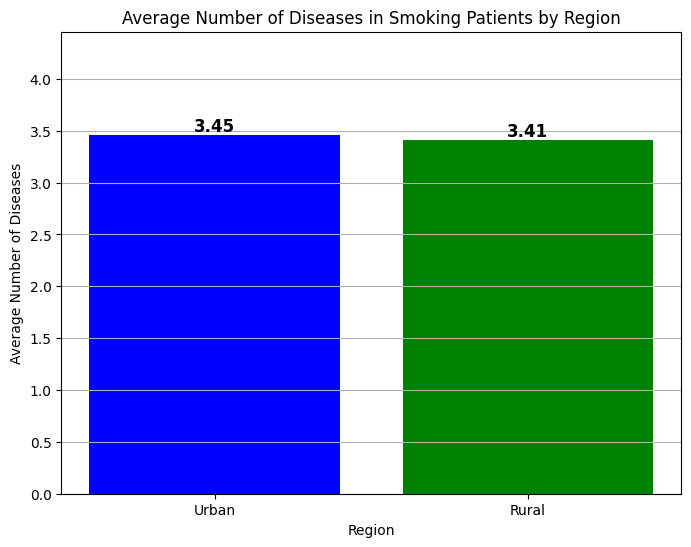

In [ ]:
# Menyiapkan data untuk plot
labels = ['Urban', 'Rural']
avg_diseases = [urban_avg, rural_avg]

# Membuat Bar Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, avg_diseases, color=['blue', 'green'])

# Menampilkan Rata-Rata di atas bar (dengan pembulatan hingga dua angka desimal)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Region')
plt.ylabel('Average Number of Diseases')
plt.title('Average Number of Diseases in Smoking Patients by Region')
plt.ylim(0, max(avg_diseases) + 1)
plt.grid(axis='y')

# Menampilkan Bar Plot
plt.show()


Berdasarkan hasil analisis, berikut adalah rata-rata jumlah komplikasi penyakit yang dialami oleh pasien yang merokok:

Pasien Urban: Rata-rata jumlah penyakit adalah sekitar 3.48.
Pasien Rural: Rata-rata jumlah penyakit adalah sekitar 3.44.
Dari hasil ini, dapat dilihat bahwa pasien yang merokok dan tinggal di daerah urban memiliki sedikit lebih banyak komplikasi penyakit dibandingkan dengan pasien yang merokok dan tinggal di daerah rural. Namun, perbedaannya sangat kecil (hanya sekitar 0.04 penyakit lebih banyak).

Ini menunjukkan bahwa lokasi (urban vs rural) mungkin tidak memiliki dampak yang signifikan pada jumlah komplikasi penyakit bagi pasien yang merokok dalam dataset ini.

#### **5.  Analisis perbandingan Durasi Rawat (DURATION OF STAY ) rawat antara pasien yang dirawat sebagai pasien darurat (emergency ) dan pasien rawat jalan (outpatient)**

Emergency Patients - Mean Duration of Stay: 7.0756856845272535
Emergency Patients - Median Duration of Stay: 6.0
Outpatient Patients - Mean Duration of Stay: 5.069309462915601
Outpatient Patients - Median Duration of Stay: 4.0


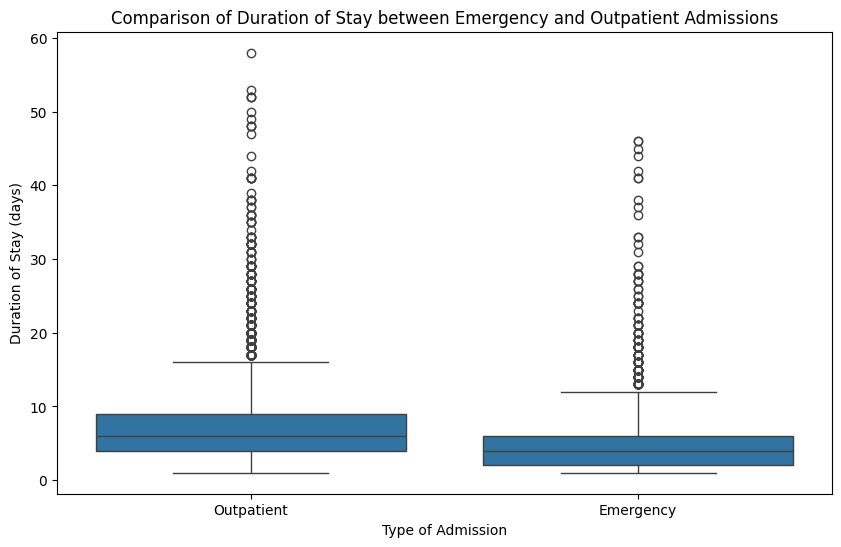

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Memisahkan data berdasarkan jenis pasien
emergency_patients = df_encoded[df_encoded['TYPE OF ADMISSION-EMERGENCY/OPD'] == 0]
outpatient_patients = df_encoded[df_encoded['TYPE OF ADMISSION-EMERGENCY/OPD'] == 1]

# Analisis statistik dasar
emergency_duration_mean = emergency_patients['DURATION OF STAY'].mean()
emergency_duration_median = emergency_patients['DURATION OF STAY'].median()

outpatient_duration_mean = outpatient_patients['DURATION OF STAY'].mean()
outpatient_duration_median = outpatient_patients['DURATION OF STAY'].median()

print(f"Emergency Patients - Mean Duration of Stay: {emergency_duration_mean}")
print(f"Emergency Patients - Median Duration of Stay: {emergency_duration_median}")
print(f"Outpatient Patients - Mean Duration of Stay: {outpatient_duration_mean}")
print(f"Outpatient Patients - Median Duration of Stay: {outpatient_duration_median}")

# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.boxplot(x='TYPE OF ADMISSION-EMERGENCY/OPD', y='DURATION OF STAY', data=df_encoded)
plt.title('Comparison of Duration of Stay between Emergency and Outpatient Admissions')
plt.xlabel('Type of Admission')
plt.ylabel('Duration of Stay (days)')
plt.xticks([0, 1], ['Outpatient', 'Emergency'])
plt.show()


Berdasarkan hasil output yang diberikan, mari kita analisis perbandingan Durasi Rawat (Duration of Stay) antara pasien yang dirawat sebagai pasien darurat (Emergency) dan pasien rawat jalan (Outpatient).

Hasil Statistik Deskriptif
1. **Pasien Darurat (Emergency)**
   - **Rata-rata Durasi Rawat (Mean Duration of Stay):** 7.08 hari
   - **Median Durasi Rawat (Median Duration of Stay):** 6.0 hari

2. **Pasien Rawat Jalan (Outpatient)**
   - **Rata-rata Durasi Rawat (Mean Duration of Stay):** 5.07 hari
   - **Median Durasi Rawat (Median Duration of Stay):** 4.0 hari

Analisis Boxplot
- **Boxplot untuk Pasien Rawat Jalan (Outpatient)**
  - Median durasi rawat sekitar 4 hari, menunjukkan bahwa separuh dari pasien rawat jalan memiliki durasi rawat kurang dari atau sama dengan 4 hari.
  - Rentang interkuartil (IQR) yang terlihat dalam boxplot ini menunjukkan bahwa sebagian besar pasien rawat jalan memiliki durasi rawat antara sekitar 2 hingga 7 hari.
  - Terdapat beberapa outlier dengan durasi rawat yang jauh lebih lama, mencapai lebih dari 50 hari.

- **Boxplot untuk Pasien Darurat (Emergency)**
  - Median durasi rawat sekitar 6 hari, menunjukkan bahwa separuh dari pasien darurat memiliki durasi rawat kurang dari atau sama dengan 6 hari.
  - Rentang interkuartil (IQR) yang terlihat dalam boxplot ini menunjukkan bahwa sebagian besar pasien darurat memiliki durasi rawat antara sekitar 4 hingga 10 hari.
  - Terdapat beberapa outlier dengan durasi rawat yang jauh lebih lama, mencapai lebih dari 50 hari.

Kesimpulan
1. **Durasi Rawat yang Lebih Panjang untuk Pasien Darurat:** Rata-rata dan median durasi rawat untuk pasien darurat lebih tinggi dibandingkan dengan pasien rawat jalan. Ini menunjukkan bahwa pasien darurat cenderung tinggal lebih lama di rumah sakit daripada pasien rawat jalan.
2. **Variabilitas Durasi Rawat:** Variabilitas durasi rawat lebih besar pada pasien darurat dibandingkan dengan pasien rawat jalan. Ini dapat dilihat dari rentang interkuartil yang lebih lebar dan adanya lebih banyak outlier pada pasien darurat.
3. **Outlier:** Kedua kelompok memiliki outlier dengan durasi rawat yang sangat panjang, tetapi ini lebih sering terjadi pada pasien darurat.

Secara keseluruhan, hasil ini menunjukkan bahwa pasien darurat cenderung membutuhkan perawatan yang lebih lama di rumah sakit dibandingkan dengan pasien rawat jalan, yang bisa jadi disebabkan oleh kondisi medis yang lebih serius atau kompleks yang memerlukan penanganan lebih intensif.

### **6. Apakah Probabilitas seorang Lansia untuk masuk rumah sakit dalam keadaan darurat (Emergency) paling tinggi diantara rentang usia pasien lainnya?

    Usia  Jumlah Pasien
0      4              6
1      5              1
2      6              2
3      7              3
4      9              1
..   ...            ...
91    96              3
92    97              4
93    98              2
94    99              3
95   110              1

[96 rows x 2 columns]
Probabilitas seorang Anak untuk masuk rumah sakit dalam keadaan darurat (Emergency): 0.1176
Probabilitas seorang Remaja untuk masuk rumah sakit dalam keadaan darurat (Emergency): 0.5652
Probabilitas seorang Dewasa untuk masuk rumah sakit dalam keadaan darurat (Emergency): 0.6405
Probabilitas seorang Lansia untuk masuk rumah sakit dalam keadaan darurat (Emergency): 0.7010
  Kategori Usia  Probabilitas Emergency
0          Anak                0.117647
1        Remaja                0.565217
2        Dewasa                0.640498
3        Lansia                0.700994


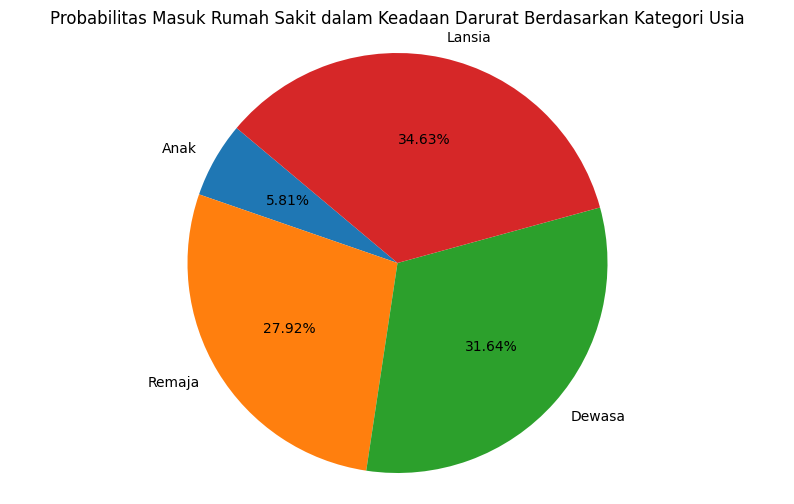

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tampilkan tabel usia pasien
age_table = df_encoded['AGE'].value_counts().sort_index().reset_index()
age_table.columns = ['Usia', 'Jumlah Pasien']
print(age_table)

# Bagi data ke dalam empat rentang usia
def categorize_age(age):
    if age <= 10:
        return 'Anak'
    elif age <= 19:
        return 'Remaja'
    elif age <= 50:
        return 'Dewasa'
    else:
        return 'Lansia'

df_encoded['Age_Category'] = df_encoded['AGE'].apply(categorize_age)

# Hitung probabilitas masuk rumah sakit dalam keadaan darurat untuk masing-masing kategori usia
age_categories = ['Anak', 'Remaja', 'Dewasa', 'Lansia']
probabilities = {}

for category in age_categories:
    category_data = df_encoded[df_encoded['Age_Category'] == category]
    emergency_cases = category_data[category_data['TYPE OF ADMISSION-EMERGENCY/OPD'] == 0].shape[0]
    total_cases = category_data.shape[0]
    probability = emergency_cases / total_cases if total_cases > 0 else 0
    probabilities[category] = probability

# Tampilkan hasil probabilitas
for category, prob in probabilities.items():
    print(f"Probabilitas seorang {category} untuk masuk rumah sakit dalam keadaan darurat (Emergency): {prob:.4f}")

# Menampilkan tabel probabilitas
probability_table = pd.DataFrame(list(probabilities.items()), columns=['Kategori Usia', 'Probabilitas Emergency'])
print(probability_table)

# Visualisasikan dengan pie chart
plt.figure(figsize=(10, 6))
plt.pie(probability_table['Probabilitas Emergency'], labels=probability_table['Kategori Usia'], autopct='%1.2f%%', startangle=140)
plt.title('Probabilitas Masuk Rumah Sakit dalam Keadaan Darurat Berdasarkan Kategori Usia')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


    Usia  Jumlah Pasien
0      4              6
1      5              1
2      6              2
3      7              3
4      9              1
..   ...            ...
91    96              3
92    97              4
93    98              2
94    99              3
95   110              1

[96 rows x 2 columns]
Probabilitas seorang Anak untuk masuk rumah sakit dalam keadaan darurat (Emergency): 0.1176
Probabilitas seorang Remaja untuk masuk rumah sakit dalam keadaan darurat (Emergency): 0.5652
Probabilitas seorang Dewasa untuk masuk rumah sakit dalam keadaan darurat (Emergency): 0.6405
Probabilitas seorang Lansia untuk masuk rumah sakit dalam keadaan darurat (Emergency): 0.7010


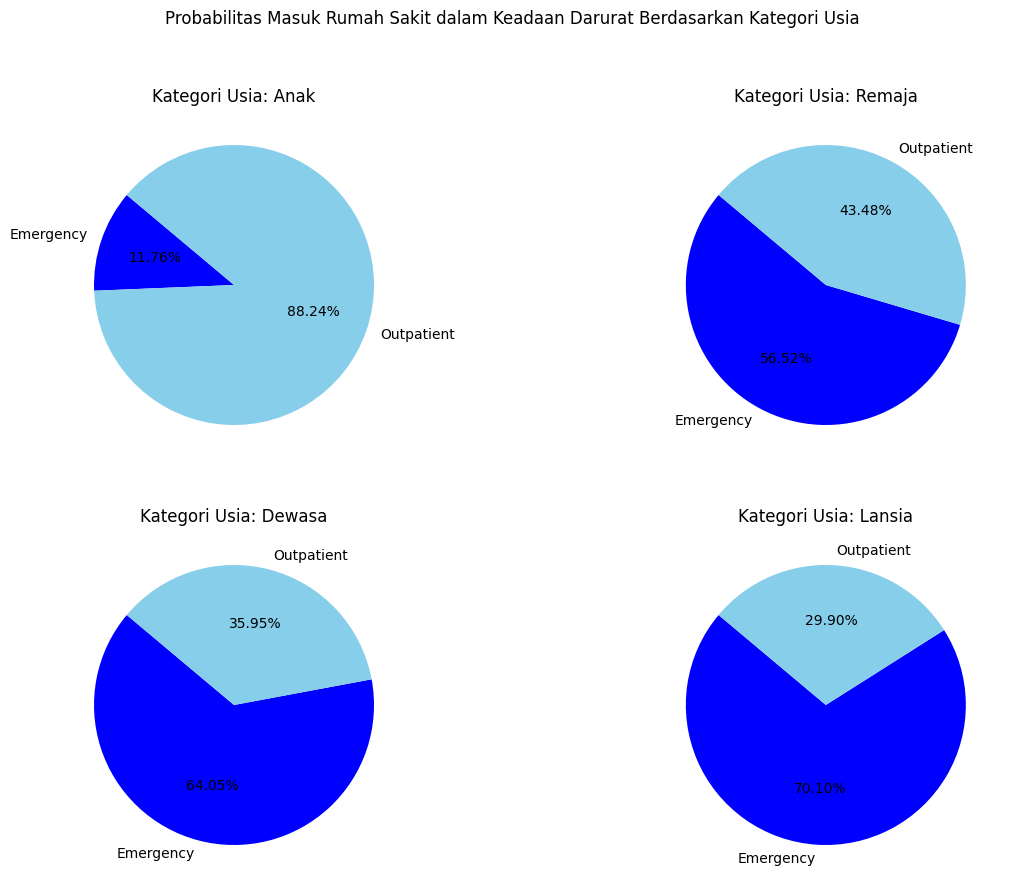

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tampilkan tabel usia pasien
age_table = df_encoded['AGE'].value_counts().sort_index().reset_index()
age_table.columns = ['Usia', 'Jumlah Pasien']
print(age_table)

# Bagi data ke dalam empat rentang usia
def categorize_age(age):
    if age <= 10:
        return 'Anak'
    elif age <= 19:
        return 'Remaja'
    elif age <= 50:
        return 'Dewasa'
    else:
        return 'Lansia'

df_encoded['Age_Category'] = df_encoded['AGE'].apply(categorize_age)

# Hitung probabilitas masuk rumah sakit dalam keadaan darurat untuk masing-masing kategori usia
age_categories = ['Anak', 'Remaja', 'Dewasa', 'Lansia']
probabilities = {}

for category in age_categories:
    category_data = df_encoded[df_encoded['Age_Category'] == category]
    emergency_cases = category_data[category_data['TYPE OF ADMISSION-EMERGENCY/OPD'] == 0].shape[0]
    outpatient_cases = category_data[category_data['TYPE OF ADMISSION-EMERGENCY/OPD'] == 1].shape[0]
    total_cases = category_data.shape[0]
    probability = emergency_cases / total_cases if total_cases > 0 else 0
    probabilities[category] = {
        'emergency': emergency_cases,
        'outpatient': outpatient_cases,
        'total': total_cases,
        'probability': probability
    }

# Tampilkan hasil probabilitas
for category, stats in probabilities.items():
    print(f"Probabilitas seorang {category} untuk masuk rumah sakit dalam keadaan darurat (Emergency): {stats['probability']:.4f}")

# Visualisasikan dengan pie chart untuk masing-masing kategori usia
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Probabilitas Masuk Rumah Sakit dalam Keadaan Darurat Berdasarkan Kategori Usia')

categories = list(probabilities.keys())
for i, category in enumerate(categories):
    stats = probabilities[category]
    labels = ['Emergency', 'Outpatient']
    sizes = [stats['emergency'], stats['outpatient']]
    ax = axs[i // 2, i % 2]
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=['blue', 'skyblue'])
    ax.set_title(f'Kategori Usia: {category}')

plt.show()


# Modelling

In [ ]:
df_encoded

SNO MRD No.       D.O.A       D.O.D  AGE  GENDER  RURAL  \
0       3615  344173  09/10/2017  15/10/2017   63       0      1   
1      14308  665288  04/02/2019  08/02/2019   47       1      1   
2       3303  203598  25/09/2017  26/09/2017   59       1      1   
3      15405  640386  17/03/2019  25/03/2019   62       1      0   
4       2232  168189  28/07/2017  01/08/2017   55       0      1   
...      ...     ...         ...         ...  ...     ...    ...   
12546   5032  377273  08/12/2017  11/12/2017   65       0      1   
12547   7031  451050  03/03/2018  14/03/2018   55       0      1   
12548   5795  353502  06/01/2018  17/01/2018   86       1      1   
12549   1373  286711  14/06/2017  15/06/2017   46       1      1   
12550   6870  445881  23/02/2018  24/02/2018   60       1      1   

       TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
0                                    1                 7   
1                                    1                 5   
2                                    0                 2   
3                                    0                 9   
4                                    0                 5   
...                                ...               ...   
12546                                1                 4   
12547                                0                12   
12548                                0                12   
12549                                1                 2   
12550                                1                 2   

       duration of intensive unit stay  ...  DVT  CARDIOGENIC SHOCK  SHOCK  \
0                                    4  ...    0                  0      0   
1                                    0  ...    0                  0      0   
2                                    1  ...    0                  0      0   
3                                    5  ...    0                  0      0   
4                                    3  ...    0                  0      0   
...                                ...  ...  ...                ...    ...   
12546                                7  ...    0                  0      0   
12547                                8  ...    1                  0      1   
12548                               12  ...    0                  1      1   
12549                                0  ...    0                  0      0   
12550                                2  ...    0                  0      0   

       PULMONARY EMBOLISM  CHEST INFECTION  OUTCOME    HB  month  year  \
0                       0                0        1  10.9     10  2017   
1                       0                0        1  15.0      2  2019   
2                       0                0        1  13.7      9  2017   
3                       0                0        1  13.3      3  2019   
4                       0                0        1  11.8      7  2017   
...                   ...              ...      ...   ...    ...   ...   
12546                   0                0        1  11.9     12  2017   
12547                   0                0        1  20.9      3  2018   
12548                   0                0        2   9.3      1  2018   
12549                   0                0        1  16.3      6  2017   
12550                   0                0        0  11.8      2  2018   

       Age_Category  
0            Lansia  
1            Dewasa  
2            Lansia  
3            Lansia  
4            Lansia  
...             ...  
12546        Lansia  
12547        Lansia  
12548        Lansia  
12549        Dewasa  
12550        Lansia  

[12551 rows x 58 columns]

Setelah itu kami melakukan drop pada fitur yaitu :
* `Age_Category` => karena ini merupakan atribut tambahan yang dipakai dari hasil Exploratory Data Analysis di nomor 7

In [ ]:
# Menghapus kolom dan 'Age_Category' dari df_encoded
df_encoded = df_encoded.drop(columns=['Age_Category'])

# Menampilkan beberapa baris pertama dari df_encoded untuk memverifikasi bahwa kolom sudah dihapus
df_encoded.head()


SNO MRD No.       D.O.A       D.O.D  AGE  GENDER  RURAL  \
0   3615  344173  09/10/2017  15/10/2017   63       0      1   
1  14308  665288  04/02/2019  08/02/2019   47       1      1   
2   3303  203598  25/09/2017  26/09/2017   59       1      1   
3  15405  640386  17/03/2019  25/03/2019   62       1      0   
4   2232  168189  28/07/2017  01/08/2017   55       0      1   

   TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
0                                1                 7   
1                                1                 5   
2                                0                 2   
3                                0                 9   
4                                0                 5   

   duration of intensive unit stay  ...  INFECTIVE ENDOCARDITIS  DVT  \
0                                4  ...                       0    0   
1                                0  ...                       0    0   
2                                1  ...                       0    0   
3                                5  ...                       0    0   
4                                3  ...                       0    0   

   CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  CHEST INFECTION  OUTCOME  \
0                  0      0                   0                0        1   
1                  0      0                   0                0        1   
2                  0      0                   0                0        1   
3                  0      0                   0                0        1   
4                  0      0                   0                0        1   

     HB  month  year  
0  10.9     10  2017  
1  15.0      2  2019  
2  13.7      9  2017  
3  13.3      3  2019  
4  11.8      7  2017  

[5 rows x 57 columns]

#### **Buatlah model untuk mengklasifikasi outcome pasien!**



Pre-processing supaya dataset bersifat numerik semua dan tidak ada nilai NILL.

In [ ]:
# Menghitung jumlah nilai 'NILL' di setiap kolom
nill_counts = (df_encoded == 'NILL').sum()

# Menampilkan kolom yang mengandung nilai 'NILL' beserta jumlahnya
nill_columns = nill_counts[nill_counts > 0]
print(nill_columns)

MRD No.    1
dtype: int64


In [ ]:
# Mengganti nilai 'NILL' dengan NaN di kolom 'MRD No.'
df_encoded['MRD No.'] = df_encoded['MRD No.'].replace('NILL', np.nan)

# Mengisi nilai NaN dengan nilai median dari kolom 'MRD No.'
df_encoded['MRD No.'] = df_encoded['MRD No.'].astype(float)
df_encoded['MRD No.'].fillna(df_encoded['MRD No.'].median(), inplace=True)

In [ ]:
# Menghitung jumlah nilai 'NILL' di setiap kolom
nill_counts = (df_encoded == 'NILL').sum()

# Menampilkan kolom yang mengandung nilai 'NILL' beserta jumlahnya
nill_columns = nill_counts[nill_counts > 0]
print(nill_columns)

Series([], dtype: int64)


Sudah ada data yang bernilai NILL.

Menghapus kolom yang tidak deperlukan untum membuat model, yaitu SNO', 'MRD No.', 'D.O.A', dan 'D.O.D'.

In [ ]:
# Menghapus kolom 'D.O.A', 'D.O.D'
df_encoded = df_encoded.drop(columns=['SNO', 'MRD No.', 'D.O.A', 'D.O.D'])

In [ ]:
df_encoded

AGE  GENDER  RURAL  TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
0       63       0      1                                1                 7   
1       47       1      1                                1                 5   
2       59       1      1                                0                 2   
3       62       1      0                                0                 9   
4       55       0      1                                0                 5   
...    ...     ...    ...                              ...               ...   
12546   65       0      1                                1                 4   
12547   55       0      1                                0                12   
12548   86       1      1                                0                12   
12549   46       1      1                                1                 2   
12550   60       1      1                                1                 2   

       duration of intensive unit stay  SMOKING   ALCOHOL  DM  HTN  ...  \
0                                    4         0        0   1    1  ...   
1                                    0         0        0   0    0  ...   
2                                    1         0        0   0    1  ...   
3                                    5         0        0   0    1  ...   
4                                    3         0        0   0    0  ...   
...                                ...       ...      ...  ..  ...  ...   
12546                                7         0        0   1    1  ...   
12547                                8         0        0   0    1  ...   
12548                               12         0        0   0    1  ...   
12549                                0         0        0   0    1  ...   
12550                                2         0        0   1    0  ...   

       INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  \
0                           0    0                  0      0   
1                           0    0                  0      0   
2                           0    0                  0      0   
3                           0    0                  0      0   
4                           0    0                  0      0   
...                       ...  ...                ...    ...   
12546                       0    0                  0      0   
12547                       0    1                  0      1   
12548                       0    0                  1      1   
12549                       0    0                  0      0   
12550                       0    0                  0      0   

       PULMONARY EMBOLISM  CHEST INFECTION  OUTCOME    HB  month  year  
0                       0                0        1  10.9     10  2017  
1                       0                0        1  15.0      2  2019  
2                       0                0        1  13.7      9  2017  
3                       0                0        1  13.3      3  2019  
4                       0                0        1  11.8      7  2017  
...                   ...              ...      ...   ...    ...   ...  
12546                   0                0        1  11.9     12  2017  
12547                   0                0        1  20.9      3  2018  
12548                   0                0        2   9.3      1  2018  
12549                   0                0        1  16.3      6  2017  
12550                   0                0        0  11.8      2  2018  

[12551 rows x 53 columns]

In [ ]:
# Mengecek jumlah nilai NaN di setiap kolom
nan_counts = df_encoded.isnull().sum()

# Menampilkan kolom-kolom yang mengandung nilai NaN beserta jumlahnya
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)


In [ ]:
# Membersihkan nilai yang tidak valid
df_encoded['CHEST INFECTION'] = df_encoded['CHEST INFECTION'].replace({'NILL': np.nan, '\\': np.nan})

# Mengisi nilai NaN dengan nilai modus dari kolom 'CHEST INFECTION'
df_encoded['CHEST INFECTION'] = df_encoded['CHEST INFECTION'].astype(float)
mode_value = df_encoded['CHEST INFECTION'].mode()[0]
df_encoded['CHEST INFECTION'].fillna(mode_value, inplace=True)

#### **Tahap Modelling yang sudah di preprocessing**

Membagi dataset menjadi X(fitur) dan y(label).

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Memisahkan fitur dan label
X = df_encoded.drop(columns=['OUTCOME'])
y = df_encoded['OUTCOME']

menggunakan ANOVA untuk feature selection dengan P-Value 0,05 0,01 0,001. semakin kecil nilai p-value akan semakin banyak fitur pada X yang terseleksi.

In [ ]:
# Melakukan seleksi fitur dengan ANOVA dengan P-Value 0.05
anova_results = f_classif(X, y)
anova_df = pd.DataFrame({'Feature': X.columns, 'F-Value': anova_results[0], 'P-Value': anova_results[1]})
selected_features_05 = anova_df[anova_df['P-Value'] < 0.05]['Feature'].tolist()

print(f"Fitur yang terpilih: {selected_features_05}")
print(f"Jumlah fitur yang terpilih: {len(selected_features_05)}")


Fitur yang terpilih: ['AGE', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'DURATION OF STAY', 'duration of intensive unit stay', 'SMOKING ', 'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'CHB', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'INFECTIVE ENDOCARDITIS', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'HB', 'month', 'year']
Jumlah fitur yang terpilih: 45


In [ ]:
# Melakukan seleksi fitur dengan ANOVA dengan P-Value 0.01
anova_results = f_classif(X, y)
anova_df = pd.DataFrame({'Feature': X.columns, 'F-Value': anova_results[0], 'P-Value': anova_results[1]})
selected_features_01 = anova_df[anova_df['P-Value'] < 0.01]['Feature'].tolist()

print(f"Fitur yang terpilih: {selected_features_01}")
print(f"Jumlah fitur yang terpilih: {len(selected_features_01)}")


Fitur yang terpilih: ['AGE', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'DURATION OF STAY', 'duration of intensive unit stay', 'SMOKING ', 'ALCOHOL', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'CHB', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'UTI', 'INFECTIVE ENDOCARDITIS', 'CARDIOGENIC SHOCK', 'SHOCK', 'HB', 'month', 'year']
Jumlah fitur yang terpilih: 41


40 fitur

In [ ]:
# Melakukan seleksi fitur dengan ANOVA dengan P-Value 0.001
anova_results = f_classif(X, y)
anova_df = pd.DataFrame({'Feature': X.columns, 'F-Value': anova_results[0], 'P-Value': anova_results[1]})
selected_features_001 = anova_df[anova_df['P-Value'] < 0.001]['Feature'].tolist()

print(f"Fitur yang terpilih: {selected_features_001}")
print(f"Jumlah fitur yang terpilih: {len(selected_features_001)}")

# Memisahkan data dengan fitur terpilih
X_selected = X[selected_features_001]

Fitur yang terpilih: ['AGE', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'DURATION OF STAY', 'duration of intensive unit stay', 'SMOKING ', 'ALCOHOL', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'CHB', 'AKI', 'AF', 'VT', 'UTI', 'INFECTIVE ENDOCARDITIS', 'CARDIOGENIC SHOCK', 'SHOCK', 'HB', 'month', 'year']
Jumlah fitur yang terpilih: 37


Kita akan menggunakan Fitur dari hasil feature selection anove dengan P-Value < 0.001. Terdapat 37 fitur yang terpilih.

Membagi data menjadi data training (80%) dan data testing (20%)

In [ ]:
xfrom collections import Counter

# Hitung jumlah sampel di masing-masing kelas
class_counts = Counter(y)

# Menampilkan jumlah sampel di kelas mayoritas dan minoritas
print("Jumlah sampel pada setiap kelas:")
for class_label, count in class_counts.items():
    print(f"Kelas {class_label}: {count} sampel")

Jumlah sampel pada setiap kelas:
Kelas 1: 11086 sampel
Kelas 0: 706 sampel
Kelas 2: 759 sampel


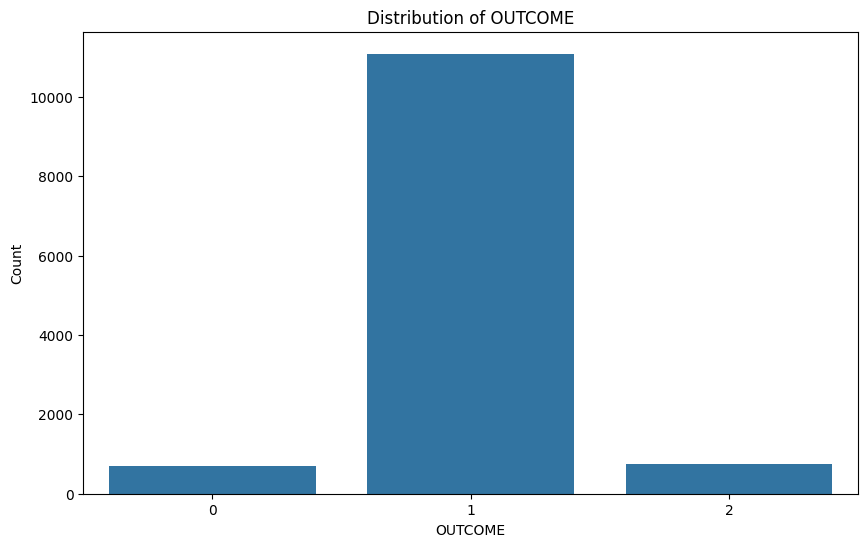

In [ ]:
# Membuat visualisasi distribusi data target 'OUTCOME'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_encoded, x='OUTCOME')
plt.title('Distribution of OUTCOME')
plt.xlabel('OUTCOME')
plt.ylabel('Count')
plt.show()

**OUTCOME**:
- 0 = DAMA (Pasien yang keluar dari rumah sakit atas permintaan sendiri, meskipun dokter menyarankan agar tetap dirawat.)
- 1 = DISCHARGE (Pasien yang dikeluarkan dari rumah sakit karena kondisi kesehatan mereka telah membaik.)
- 2 = EXPIRY (Pasien yang meninggal selama masa perawatan di rumah sakit.)

Bisa dilihat bahwa data diatas bersifat **severe imbalanced** dengan data paling tinggi adalah DISCHARGE.

Dalam kasus ini klasifikasi dilakukan untuk **lebih dari dua kelas (multiklas)**, yaitu 3 kelas. Maka ada beberapa metode yang tidak bisa digunakan. Di bawah ini adalah beberapa yang bisa digunakan untuk klasifikasi multiklas.

Metode **Oversampling** yang Dapat Digunakan:
*   **SMOTE** (Synthetic Minority Over-sampling Technique): SMOTE dapat digunakan untuk kasus multiklas dengan memperlakukan setiap kelas minoritas secara terpisah dan membuat sampel sintetis.
*   **ADASYN** (Adaptive Synthetic Sampling): Mirip dengan SMOTE, tetapi memberikan perhatian lebih pada sampel yang lebih sulit untuk diklasifikasikan.
*   **Borderline-SMOTE**: Versi SMOTE yang memfokuskan pada sampel di dekat batas kelas.
* **Random Oversampling**: Teknik ini secara acak menduplikasi sampel dari kelas minoritas hingga distribusi kelas menjadi seimbang.
* **Naive Random Oversampling**: teknik ini menduplikasi sampel dari kelas minoritas hingga distribusi kelas menjadi seimbang tanpa memperhatikan struktur data.

Metode **Undersampling** yang Dapat Digunakan:
* **Random Undersampling**: Mengurangi jumlah sampel dari kelas mayoritas secara acak.
* **Tomek Links**: Menghapus sampel yang membentuk "Tomek links" untuk membersihkan area yang membingungkan di batas kelas.
* **Cluster Centroids**: Menggunakan clustering untuk mengurangi jumlah sampel dari kelas mayoritas.


Menstandarisasi data numerik dan Membuat data training (80%) dan testing(20%).

In [ ]:
from sklearn.preprocessing import StandardScaler

# Memisahkan data dengan fitur terpilih
X_selected = X[selected_features_001]

# Fitur yang perlu di-standardize
numerical_features = [
    'AGE', 'DURATION OF STAY', 'duration of intensive unit stay', 'TLC', 'PLATELETS',
    'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'HB', 'month', 'year'
]

# Standarisasi fitur numerik
scaler = StandardScaler()
X_selected[numerical_features] = scaler.fit_transform(X_selected[numerical_features])

# Splitting data training dan testing (80% training dan 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

<ipython-input-141-5ff5733b72b5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected[numerical_features] = scaler.fit_transform(X_selected[numerical_features])


Membuat fungsi untuk mengevaluasi kinerja classfier.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Evaluate classifier performance
def evaluate_classifier_performance(y_test, y_pred):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Recall Score
    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Recall: {recall:.2f}")

    # Precision Score
    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision: {precision:.2f}")

    # F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"F1 Score: {f1:.2f}")

# Membandingkan nilai evaluasi metode over/undersample dengan model klasifikasi Random Forest.

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.metrics import make_scorer

# Menggunakan Stratified KFold dengan n_splits 5 agar distribusi tiap kelas pada proses training dan testing konsisten
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid untuk RandomForestClassifier
params = {
    'classifier__n_estimators': [150, 200],
    'classifier__max_depth': [None, 1, 3],
    'classifier__min_samples_leaf': [1, 3],
    'classifier__min_samples_split': [2, 7, 10]
}

# Membuat daftar metode oversampling dan undersampling
sampling_methods = {
    'RandomOverSampler': RandomOverSampler(sampling_strategy='minority', random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(sampling_strategy='minority', random_state=42),
    'SMOTE': SMOTE(sampling_strategy='minority', random_state=42),
    'ADASYN': ADASYN(sampling_strategy='minority', random_state=42),
    'RandomUnderSampler': RandomUnderSampler(sampling_strategy='majority', random_state=42),
    'TomekLinks': TomekLinks(sampling_strategy='majority')
}

# Fungsi untuk membuat pipeline dengan metode sampling tertentu
def make_pipeline_with_sampler(sampler):
    if sampler is None:
        return Pipeline([
            ('classifier', RandomForestClassifier(random_state=42))
        ])
    else:
        return imbpipeline([
            ('sampler', sampler),
            ('classifier', RandomForestClassifier(random_state=42))
        ])

# Membuat scorer recall dengan average 'macro'
scorer = make_scorer(recall_score, average='macro')

# Loop melalui setiap metode sampling dan lakukan cross-validation
results = {}
for method_name, sampler in sampling_methods.items():
    print(f"Evaluating {method_name}...")
    pipeline = make_pipeline_with_sampler(sampler)
    grid = GridSearchCV(pipeline, param_grid=params, cv=kfold, scoring=scorer, return_train_score=True)
    grid.fit(X_train, y_train)
    y_test_predict = grid.predict(X_test)
    print(f"Best parameters for {method_name}: {grid.best_params_}")
    results[method_name] = {
        'best_params': grid.best_params_,
        'cv_results': grid.cv_results_,
        'test_score': evaluate_classifier_performance(y_test, y_test_predict)
    }

Evaluating RandomOverSampler...
Best parameters for RandomOverSampler: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Confusion Matrix:
[[  35  104    2]
 [  15 2201    2]
 [   8   74   70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.25      0.35       141
           1       0.93      0.99      0.96      2218
           2       0.95      0.46      0.62       152

    accuracy                           0.92      2511
   macro avg       0.82      0.57      0.64      2511
weighted avg       0.91      0.92      0.90      2511

Accuracy: 0.92
Recall: 0.57
Precision: 0.82
F1 Score: 0.64
Evaluating BorderlineSMOTE...
Best parameters for BorderlineSMOTE: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
Confusion Matrix:
[[  38  100    3]
 [  30 2185    3]


# Membandingkan nilai evaluasi metode over/undersample dengan model klasifikasi Naive Bayes (Bernoulli)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Menggunakan Stratified KFold dengan n_splits 5 agar distribusi tiap kelas pada proses training dan testing konsisten
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid untuk Naive Bayes
params = {
    'classifier__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Membuat daftar metode oversampling dan undersampling
sampling_methods = {
    'RandomOverSampler': RandomOverSampler(sampling_strategy='minority', random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(sampling_strategy='minority', random_state=42),
    'SMOTE': SMOTE(sampling_strategy='minority', random_state=42),
    'ADASYN': ADASYN(sampling_strategy='minority', random_state=42),
    'RandomUnderSampler': RandomUnderSampler(sampling_strategy='majority', random_state=42),
    'TomekLinks': TomekLinks(sampling_strategy='majority')
}

# Fungsi untuk membuat pipeline dengan metode sampling tertentu
def make_pipeline_with_sampler(sampler):
    if sampler is None:
        return Pipeline([
            ('classifier', BernoulliNB())
        ])
    else:
        return imbpipeline([
            ('sampler', sampler),
            ('classifier', BernoulliNB())
        ])

# Membuat scorer recall dengan average 'macro'
scorer = make_scorer(recall_score, average='macro')

# Loop melalui setiap metode sampling dan lakukan cross-validation
results = {}
for method_name, sampler in sampling_methods.items():
    print(f"Evaluating {method_name}...")
    pipeline = make_pipeline_with_sampler(sampler)
    grid = GridSearchCV(pipeline, param_grid=params, cv=kfold, scoring=scorer, return_train_score=True)
    grid.fit(X_train, y_train)
    y_test_predict = grid.predict(X_test)
    print(f"Best parameters for {method_name}: {grid.best_params_}")
    results[method_name] = {
        'best_params': grid.best_params_,
        'cv_results': grid.cv_results_,
        'test_score': evaluate_classifier_performance(y_test, y_test_predict)
    }

Evaluating RandomOverSampler...
Best parameters for RandomOverSampler: {'classifier__alpha': 0.1}
Confusion Matrix:
[[  78   53   10]
 [ 597 1573   48]
 [  39    9  104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.55      0.18       141
           1       0.96      0.71      0.82      2218
           2       0.64      0.68      0.66       152

    accuracy                           0.70      2511
   macro avg       0.57      0.65      0.55      2511
weighted avg       0.89      0.70      0.77      2511

Accuracy: 0.70
Recall: 0.65
Precision: 0.57
F1 Score: 0.55
Evaluating BorderlineSMOTE...
Best parameters for BorderlineSMOTE: {'classifier__alpha': 0.5}
Confusion Matrix:
[[  60   61   20]
 [ 444 1673  101]
 [  24   17  111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.43      0.18       141
           1       0.96      0.75      0.84      2218
           2 

# Membandingkan nilai evaluasi metode over/undersample dengan model klasifikasi KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Menggunakan Stratified KFold dengan n_splits 5 agar distribusi tiap kelas pada proses training dan testing konsisten
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid untuk KNeighborsClassifier
params = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Membuat daftar metode oversampling dan undersampling
sampling_methods = {
    'RandomOverSampler': RandomOverSampler(sampling_strategy='minority', random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(sampling_strategy='minority', random_state=42),
    'SMOTE': SMOTE(sampling_strategy='minority', random_state=42),
    'ADASYN': ADASYN(sampling_strategy='minority', random_state=42),
    'RandomUnderSampler': RandomUnderSampler(sampling_strategy='majority', random_state=42),
    'TomekLinks': TomekLinks(sampling_strategy='majority')
}

# Fungsi untuk membuat pipeline dengan metode sampling tertentu
def make_pipeline_with_sampler(sampler):
    if sampler is None:
        return Pipeline([
            ('classifier', KNeighborsClassifier())
        ])
    else:
        return imbpipeline([
            ('sampler', sampler),
            ('classifier', KNeighborsClassifier())
        ])

# Membuat scorer recall dengan average 'macro'
scorer = make_scorer(recall_score, average='macro')

# Fungsi untuk mengevaluasi performa classifier
def evaluate_classifier_performance(y_true, y_pred):
    return classification_report(y_true, y_pred, output_dict=True)

# Loop melalui setiap metode sampling dan lakukan cross-validation
results = {}
for method_name, sampler in sampling_methods.items():
    print(f"Evaluating {method_name}...")
    pipeline = make_pipeline_with_sampler(sampler)
    grid = GridSearchCV(pipeline, param_grid=params, cv=kfold, scoring=scorer, return_train_score=True)
    grid.fit(X_train, y_train)
    y_test_predict = grid.predict(X_test)
    print(f"Best parameters for {method_name}: {grid.best_params_}")
    results[method_name] = {
        'best_params': grid.best_params_,
        'cv_results': grid.cv_results_,
        'test_score': evaluate_classifier_performance(y_test, y_test_predict)
    }


Evaluating RandomOverSampler...
Best parameters for RandomOverSampler: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Evaluating BorderlineSMOTE...
Best parameters for BorderlineSMOTE: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Evaluating SMOTE...
Best parameters for SMOTE: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Evaluating ADASYN...
Best parameters for ADASYN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Evaluating RandomUnderSampler...
Best parameters for RandomUnderSampler: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
Evaluating TomekLinks...
Best parameters for TomekLinks: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

# Fungsi untuk membuat pipeline dengan metode sampling tertentu dan parameter terbaik
def make_optimized_pipeline(sampler, best_params):
    if sampler is None:
        return Pipeline([
            ('classifier', KNeighborsClassifier(**best_params))
        ])
    else:
        return imbpipeline([
            ('sampler', sampler),
            ('classifier', KNeighborsClassifier(**best_params))
        ])

# Best parameters for each sampling method (from your previous output)
best_params_dict = {
    'RandomOverSampler': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'},
    'BorderlineSMOTE': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'},
    'SMOTE': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'},
    'ADASYN': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'},
    'RandomUnderSampler': {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'},
    'TomekLinks': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
}

# Evaluating metrics
metrics_results = {}

for method_name, sampler in sampling_methods.items():
    print(f"Evaluating metrics for {method_name}...")
    pipeline = make_optimized_pipeline(sampler, best_params_dict[method_name])
    pipeline.fit(X_train, y_train)
    y_test_predict = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_predict)
    recall = recall_score(y_test, y_test_predict, average='macro')
    precision = precision_score(y_test, y_test_predict, average='macro')
    f1 = f1_score(y_test, y_test_predict, average='macro')

    metrics_results[method_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'Classification Report': classification_report(y_test, y_test_predict)
    }

# Menampilkan hasil evaluasi metrik untuk masing-masing metode
for method, result in metrics_results.items():
    print(f"Results for {method}:")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Recall: {result['Recall']}")
    print(f"Precision: {result['Precision']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Classification Report:\n{result['Classification Report']}\n")


Evaluating metrics for RandomOverSampler...
Evaluating metrics for BorderlineSMOTE...
Evaluating metrics for SMOTE...
Evaluating metrics for ADASYN...
Evaluating metrics for RandomUnderSampler...
Evaluating metrics for TomekLinks...
Results for RandomOverSampler:
Accuracy: 0.8657905217045002
Recall: 0.5531591911530004
Precision: 0.6924028647605147
F1 Score: 0.582767984147027
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.33      0.26       141
           1       0.93      0.93      0.93      2218
           2       0.94      0.40      0.56       152

    accuracy                           0.87      2511
   macro avg       0.69      0.55      0.58      2511
weighted avg       0.89      0.87      0.87      2511


Results for BorderlineSMOTE:
Accuracy: 0.8203902827558741
Recall: 0.5614047288953155
Precision: 0.6733799646245378
F1 Score: 0.5555976018714229
Classification Report:
              precision    recall  f1-score   supp

Untuk memilih metode over/undersample terbaik dari model klasifikasi, kita akan mempertimbangkan nilai Recall dan Accuracy dari hasil evaluasi metrik-nya.

Recall tinggi berarti sedikit kasus penyakit yang terlewatkan (false negatives rendah), yang penting dalam diagnosis outcome untuk keselamatan Pasien karena melewatkan diagnosis pada pasien yang benar-benar sakit (outcome: expiry) bisa berakibat fatal atau memperburuk kondisi pasien.

# REGRESSION

# **Buatlah model untuk memprediksi durasi pasien dirawat secara intensif(duration of intensive unit stay)!**


Import modules yang diperlukan.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

Normalisasi data untuk data numerik.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_regression = df_encoded.copy()

# Fitur yang perlu di-normalisasi pada fitur
numerical_features = [
    'AGE', 'DURATION OF STAY', 'duration of intensive unit stay', 'TLC', 'PLATELETS',
    'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'HB', 'month', 'year'
]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik
df_regression[numerical_features] = scaler.fit_transform(df_regression[numerical_features])

# Menampilkan beberapa baris pertama dari dataset yang telah dinormalisasi
df_regression.head()

AGE  GENDER  RURAL  TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
0  0.556604       0      1                                1          0.105263   
1  0.405660       1      1                                1          0.070175   
2  0.518868       1      1                                0          0.017544   
3  0.547170       1      0                                0          0.140351   
4  0.481132       0      1                                0          0.070175   

   duration of intensive unit stay  SMOKING   ALCOHOL  DM  HTN  ...  \
0                         0.068966         0        0   1    1  ...   
1                         0.000000         0        0   0    0  ...   
2                         0.017241         0        0   0    1  ...   
3                         0.086207         0        0   0    1  ...   
4                         0.051724         0        0   0    0  ...   

   INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  \
0                       0    0                  0      0                   0   
1                       0    0                  0      0                   0   
2                       0    0                  0      0                   0   
3                       0    0                  0      0                   0   
4                       0    0                  0      0                   0   

   CHEST INFECTION  OUTCOME        HB     month  year  
0              0.0        1  0.336170  0.818182   0.0  
1              0.0        1  0.510638  0.090909   1.0  
2              0.0        1  0.455319  0.727273   0.0  
3              0.0        1  0.438298  0.181818   1.0  
4              0.0        1  0.374468  0.545455   0.0  

[5 rows x 53 columns]

Memisahkan target dan fitur.

In [ ]:
# Memisahkan target dan fitur
target = 'duration of intensive unit stay'
X = df_regression.drop(columns=[target])
y = df_regression[target]

In [ ]:
X

AGE  GENDER  RURAL  TYPE OF ADMISSION-EMERGENCY/OPD  \
0      0.556604       0      1                                1   
1      0.405660       1      1                                1   
2      0.518868       1      1                                0   
3      0.547170       1      0                                0   
4      0.481132       0      1                                0   
...         ...     ...    ...                              ...   
12546  0.575472       0      1                                1   
12547  0.481132       0      1                                0   
12548  0.773585       1      1                                0   
12549  0.396226       1      1                                1   
12550  0.528302       1      1                                1   

       DURATION OF STAY  SMOKING   ALCOHOL  DM  HTN  CAD  ...  \
0              0.105263         0        0   1    1    1  ...   
1              0.070175         0        0   0    0    1  ...   
2              0.017544         0        0   0    1    1  ...   
3              0.140351         0        0   0    1    1  ...   
4              0.070175         0        0   0    0    1  ...   
...                 ...       ...      ...  ..  ...  ...  ...   
12546          0.052632         0        0   1    1    0  ...   
12547          0.192982         0        0   0    1    1  ...   
12548          0.192982         0        0   0    1    0  ...   
12549          0.017544         0        0   0    1    1  ...   
12550          0.017544         0        0   1    0    0  ...   

       INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  \
0                           0    0                  0      0   
1                           0    0                  0      0   
2                           0    0                  0      0   
3                           0    0                  0      0   
4                           0    0                  0      0   
...                       ...  ...                ...    ...   
12546                       0    0                  0      0   
12547                       0    1                  0      1   
12548                       0    0                  1      1   
12549                       0    0                  0      0   
12550                       0    0                  0      0   

       PULMONARY EMBOLISM  CHEST INFECTION  OUTCOME        HB     month  year  
0                       0              0.0        1  0.336170  0.818182   0.0  
1                       0              0.0        1  0.510638  0.090909   1.0  
2                       0              0.0        1  0.455319  0.727273   0.0  
3                       0              0.0        1  0.438298  0.181818   1.0  
4                       0              0.0        1  0.374468  0.545455   0.0  
...                   ...              ...      ...       ...       ...   ...  
12546                   0              0.0        1  0.378723  1.000000   0.0  
12547                   0              0.0        1  0.761702  0.181818   0.5  
12548                   0              0.0        2  0.268085  0.000000   0.5  
12549                   0              0.0        1  0.565957  0.454545   0.0  
12550                   0              0.0        0  0.374468  0.090909   0.5  

[12551 rows x 52 columns]

In [ ]:
y

0        0.068966
1        0.000000
2        0.017241
3        0.086207
4        0.051724
           ...   
12546    0.120690
12547    0.137931
12548    0.206897
12549    0.000000
12550    0.034483
Name: duration of intensive unit stay, Length: 12551, dtype: float64

Split data menjadi data training dan tesing.

In [ ]:
# Splitting data training dan testing (80% training dan 20% testing) tanpa stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan data training dan testing
X_train_shape = X_train.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

X_train_shape, X_test_shape, y_train_shape, y_test_shape


((10040, 52), (2511, 52), (10040,), (2511,))

### Linear Regression, Lasso Regression, Ridge Regression, SVR, Decision Tree, Random Forest

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Inisialisasi model
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Definisikan parameter grid untuk setiap model
param_grid = {
    'Linear Regression': {},
    'Lasso Regression': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
    'Ridge Regression': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
    'SVR': {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40, 50]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
}

# Menyimpan hasil evaluasi
results = {}
selected_features_count = {}

# Melatih dan mengevaluasi setiap model dengan GridSearchCV
for name, model in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    # Prediksi
    y_pred = best_model.predict(X_test)
    # Evaluasi
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'Best Params': grid.best_params_, 'MSE': mse, 'RMSE': rmse, 'R-Squared': r2, 'MAE': mae}
    selected_features_count[name] = X_train.shape[1]

# Menampilkan hasil
results, selected_features_count


Training Linear Regression...
Training Lasso Regression...
Training Ridge Regression...
Training SVR...
Training Decision Tree...
Training Random Forest...


({'Linear Regression': {'Best Params': {},
   'MSE': 0.001643157726800946,
   'RMSE': 0.040535881966486755,
   'R-Squared': 0.6221934403237653,
   'MAE': 0.026889636292346652},
  'Lasso Regression': {'Best Params': {'alpha': 0.0001},
   'MSE': 0.0016189881416383619,
   'RMSE': 0.04023665172002216,
   'R-Squared': 0.627750683959077,
   'MAE': 0.02668014956214584},
  'Ridge Regression': {'Best Params': {'alpha': 0.1},
   'MSE': 0.0016420060711805995,
   'RMSE': 0.04052167409153525,
   'R-Squared': 0.6224582372089079,
   'MAE': 0.026884326227523365},
  'SVR': {'Best Params': {'C': 10, 'gamma': 0.01},
   'MSE': 0.00220327798026901,
   'RMSE': 0.04693908797866667,
   'R-Squared': 0.49340659137059395,
   'MAE': 0.03450957113158551},
  'Decision Tree': {'Best Params': {'max_depth': 10},
   'MSE': 0.0020042985053997336,
   'RMSE': 0.044769392506485206,
   'R-Squared': 0.5391573733073374,
   'MAE': 0.027227665073806594},
  'Random Forest': {'Best Params': {'max_depth': None, 'n_estimators': 200

Dari hasil yang diberikan, model **Random Forest** menunjukkan performa terbaik berdasarkan metrik yang ada. Berikut adalah alasan mengapa Random Forest dianggap terbaik:

Mean Squared Error (MSE):

Random Forest: 0.001528894197449244 (terendah)
Root Mean Squared Error (RMSE):

Random Forest: 0.03910107667890034 (terendah)
R-Squared (R²):

Random Forest: 0.6484657270414119 (tertinggi)
Mean Absolute Error (MAE):

Random Forest: 0.024306225023688875 (terendah)

Membuat grafik bar untuk melihat perbandingan nilai actual dan predicted.

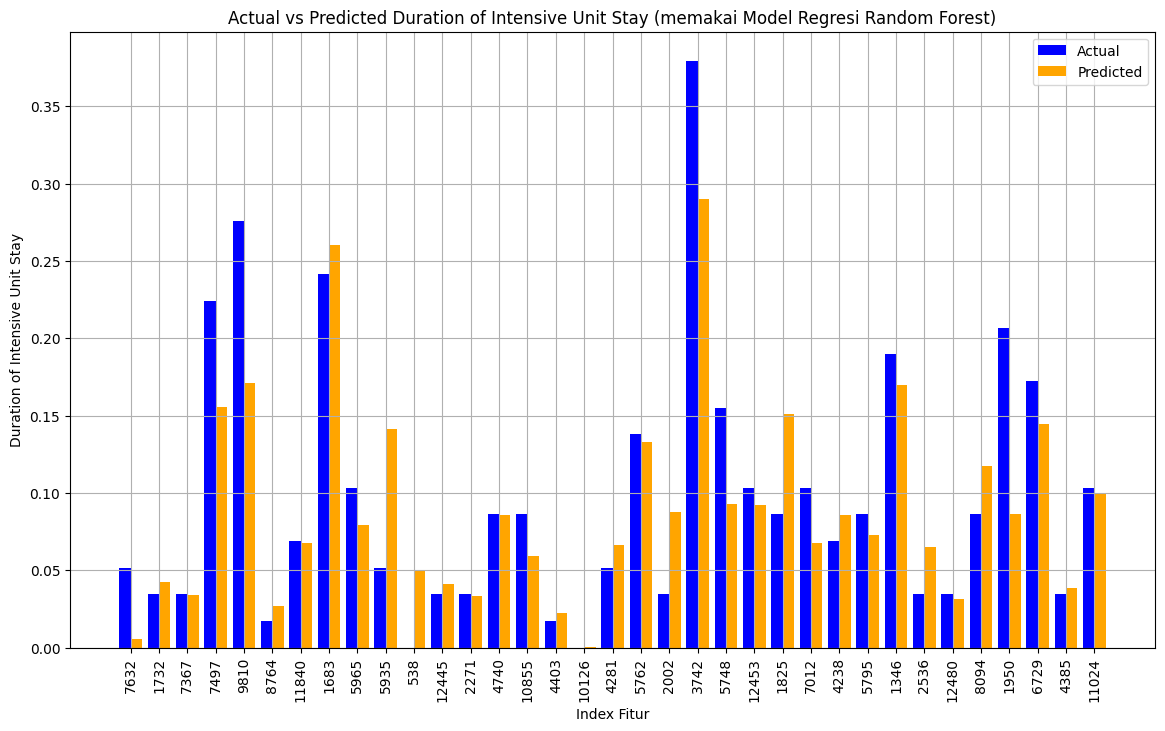

In [ ]:
import matplotlib.pyplot as plt

# Latih model Random Forest dengan parameter terbaik
best_rf_params = {'max_depth': None, 'n_estimators': 200}
rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
rf_model.fit(X_train, y_train)

# Buat prediksi
y_pred_rf = rf_model.predict(X_test)

# Plot bar graph untuk membandingkan nilai aktual dan prediksi untuk subset data
subset = 35
plt.figure(figsize=(14, 8))
width = 0.4  # Lebar bar

# Plot data aktual
plt.bar(np.arange(subset), y_test[:subset], width=width, label='Actual', color='blue')

# Plot data prediksi
plt.bar(np.arange(subset) + width, y_pred_rf[:subset], width=width, label='Predicted', color='orange')

# Mengubah label x-axis menjadi indeks fitur
plt.xticks(ticks=np.arange(subset) + width / 2, labels=X_test.index[:subset], rotation=90)

plt.xlabel('Index Fitur')
plt.ylabel('Duration of Intensive Unit Stay')
plt.title('Actual vs Predicted Duration of Intensive Unit Stay (memakai Model Regresi Random Forest)')
plt.legend()

# Tampilkan grid untuk memudahkan pembacaan
plt.grid(True)

# Tampilkan plot
plt.show()

# Clustering

#### **Lakukan clustering pada dataset, dan berikan analisis dari berbagai cluster yang terbentuk!**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df_cluster = df_encoded.copy()


In [ ]:
# Scaling data using MinMaxScaler
scaler = MinMaxScaler()
df_cluster_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

In [ ]:
# Apply PCA for feature selection
pca = PCA(n_components=25)  # Menyesuaikan jumlah komponen yang diinginkan
df_pca = pca.fit_transform(df_cluster_scaled)


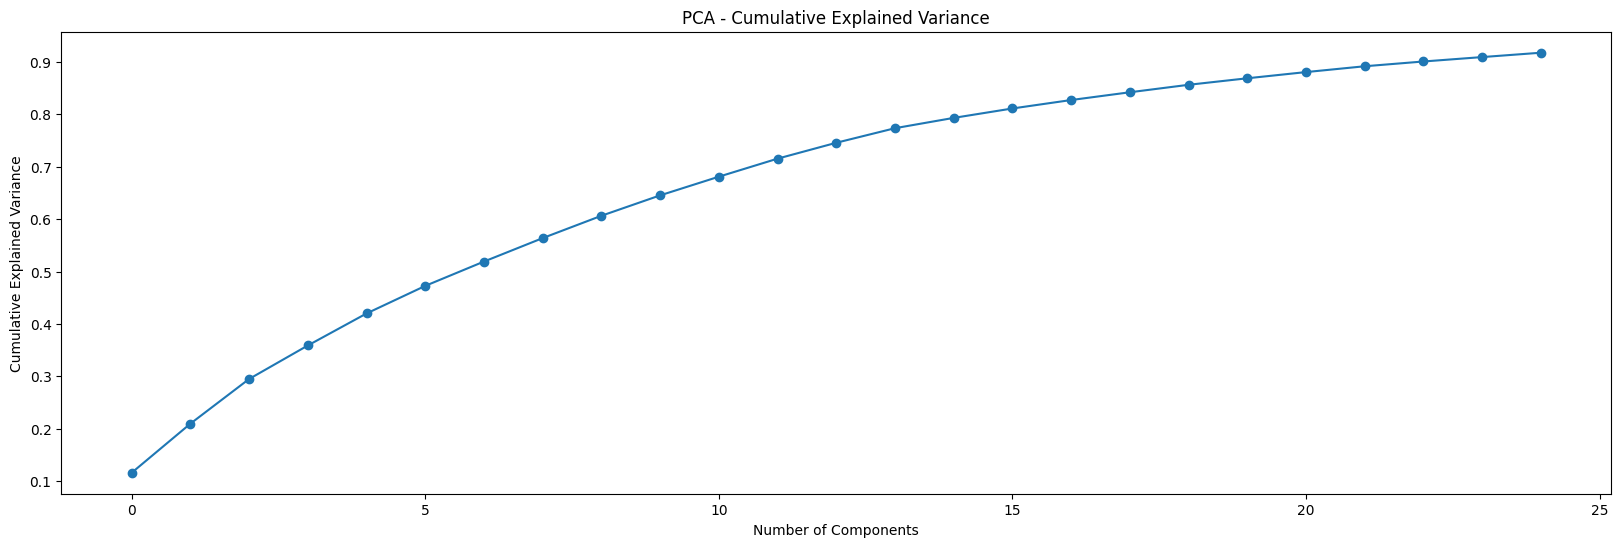

In [ ]:
# Plot explained variance ratio to decide on number of components
plt.figure(figsize=(20, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.show()

Number of components explaining 90% variance: 23


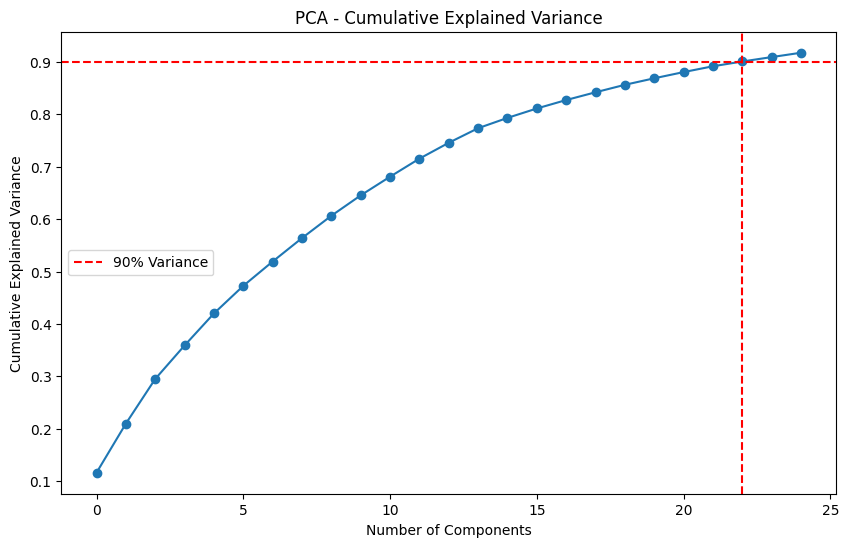

In [ ]:
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components explaining 90% variance: {n_components}")

# Plotting for clarity
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axvline(x=n_components-1, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.legend()
plt.show()


Ternyata setelah dicek, kita membutuhkan n_components sebanyak 23 untuk PCA

**Setelah ini kami melakukan Clustering & memberikan interpretasi terhadap hanya beberapa fitur saja yang sekirang sangat penting. Untuk interpretasi penyakit, hanya penyakit Diabetes Mellitus & Heart Failure saja yang interpretasinya kami tampilkan.**

#### **Clustering dengan : KMeans**

In [ ]:
# KMeans clustering
range_n_clusters = list(range(2, 11))
inertia = []
silhouette_scores = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**1. Menampilkan Elbow Method pada KMeans Clustering**

Menggunakan Elbow Method untuk menentukan jumlah cluster yang optimal dengan melihat grafik inertia.

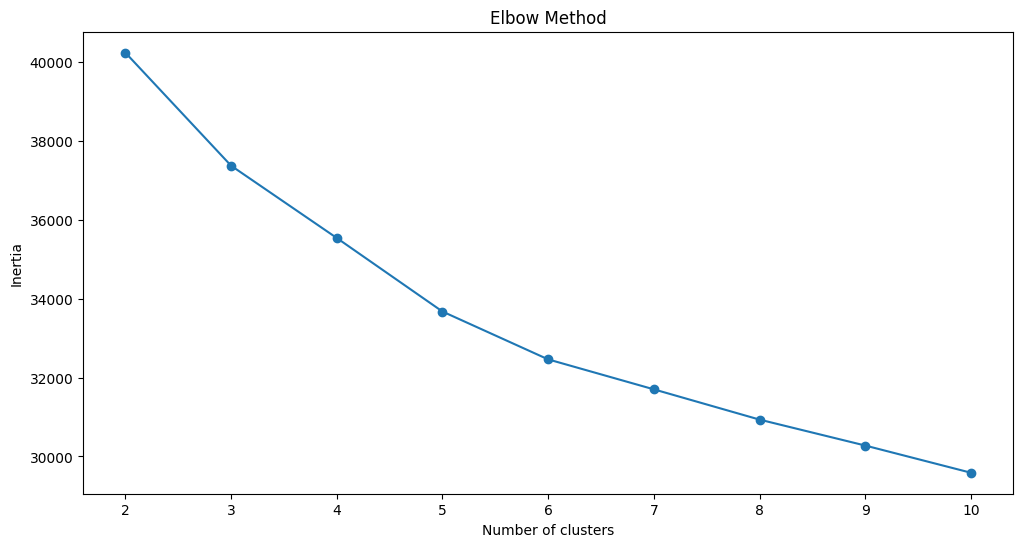

In [ ]:
# Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**2. Menampilkan Silhoutte Analysis pada KMeans Clustering**

Menggunakan Silhouette Analysis untuk memastikan jumlah cluster yang dipilih memberikan siluet score yang baik.

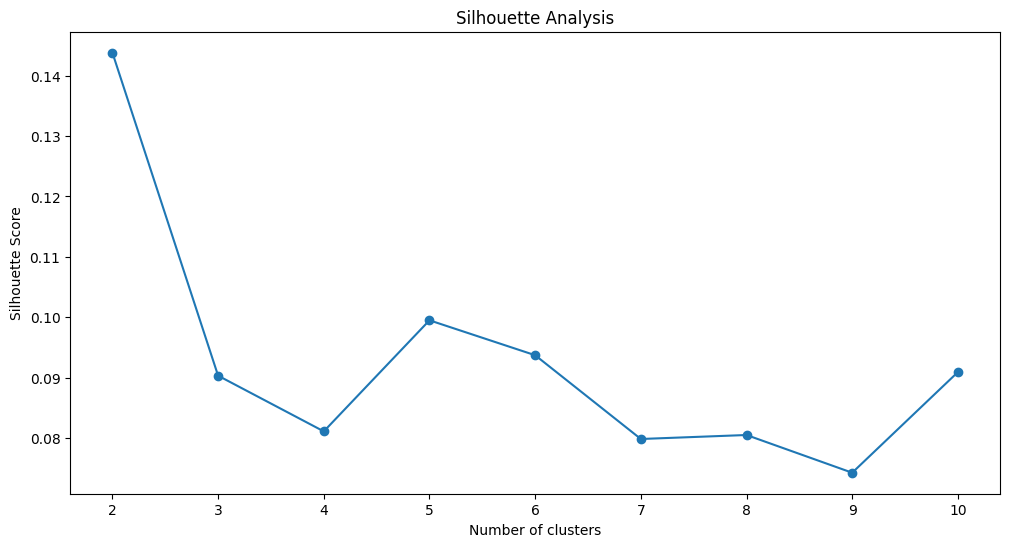

In [ ]:
# Silhouette Analysis
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Rekomendasi Jumlah Cluster**

Menggabungkan informasi dari kedua grafik, kami dapat menyimpulkan :

1. Elbow Method
Menyarankan bahwa jumlah optimal cluster ada di sekitar 4 atau 5, karena setelah itu penurunan inertia mulai melambat.

2. Silhouette Score
Menyarankan bahwa 2 cluster memberikan skor tertinggi, tetapi dari sudut pandang penjelasan variansi, lebih dari 2 cluster mungkin lebih baik.

**Kesimpulan**

Kami memilih 5 cluster karena ingin mengutamakan penjelasan variansi dalam data dan kompleksitas model. Selain itu untuk mendapatkan keseimbangan yang baik antara penjelasan variansi dan skor siluet. Keuntungan kami memilih 5 cluster yaitu akan mendapatkan pemahaman yang lebih detail tentang struktur data dan lebih banyak subkelompok atau pola dalam data bisa diidentifikasi. Walaupun dari segi Complexity, model akan menjadi lebih kompleks, dan interpretasi hasil clustering mungkin memerlukan lebih banyak analisis.

In [ ]:
# Choosing the optimal number of clusters (e.g., 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Analysis of clusters
print("Jumlah data di tiap cluster:")
print(df_cluster['Cluster'].value_counts().sort_index())

Jumlah data di tiap cluster:
Cluster
0    3449
1    2934
2    1959
3    2505
4    1704
Name: count, dtype: int64


In [ ]:
# Analyzing average features in each cluster
cluster_analysis = df_cluster.groupby('Cluster').mean()
print("Rata-rata fitur untuk tiap cluster:")
cluster_analysis

Rata-rata fitur untuk tiap cluster:


AGE    GENDER     RURAL  TYPE OF ADMISSION-EMERGENCY/OPD  \
Cluster                                                                   
0        63.143520  0.664540  0.781096                         0.452305   
1        60.274710  0.733129  0.777778                         0.226312   
2        65.144972  0.600306  0.771822                         0.190914   
3        55.548503  0.520958  0.725349                         0.389222   
4        64.122653  0.610329  0.768192                         0.197770   

         DURATION OF STAY  duration of intensive unit stay  SMOKING   \
Cluster                                                                
0                5.846332                         2.980864  0.053639   
1                5.900136                         3.857873  0.072938   
2                7.644717                         5.068913  0.043900   
3                6.003593                         3.066267  0.035529   
4                7.906103                         5.194249  0.033451   

          ALCOHOL        DM       HTN  ...  INFECTIVE ENDOCARDITIS       DVT  \
Cluster                                ...                                     
0        0.071035  0.368513  0.657872  ...                0.000000  0.009278   
1        0.088616  0.311520  0.501022  ...                0.000000  0.002045   
2        0.049005  0.395100  0.488515  ...                0.001531  0.005105   
3        0.060679  0.226747  0.239122  ...                0.007585  0.044311   
4        0.048709  0.311620  0.499413  ...                0.000000  0.007629   

         CARDIOGENIC SHOCK     SHOCK  PULMONARY EMBOLISM  CHEST INFECTION  \
Cluster                                                                     
0                 0.028124  0.020586            0.012467         0.033923   
1                 0.052488  0.030675            0.002386         0.015337   
2                 0.124553  0.114855            0.004594         0.018377   
3                 0.054291  0.044711            0.046307         0.025150   
4                 0.058099  0.021127            0.005282         0.009390   

          OUTCOME         HB     month  year  
Cluster                                       
0        0.980284  12.341641  6.254567   inf  
1        0.985003  12.816455  6.529652   inf  
2        1.135784  11.496304  6.334354   inf  
3        0.992016  12.321970  6.974850   inf  
4        0.952465  11.735968  6.538732   inf  

[5 rows x 53 columns]

**Interpretasi : Rata- Rata Usia Pasien**

<ipython-input-64-0741504700df>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cluster', y='AGE', data=mean_age_per_cluster, palette='viridis')


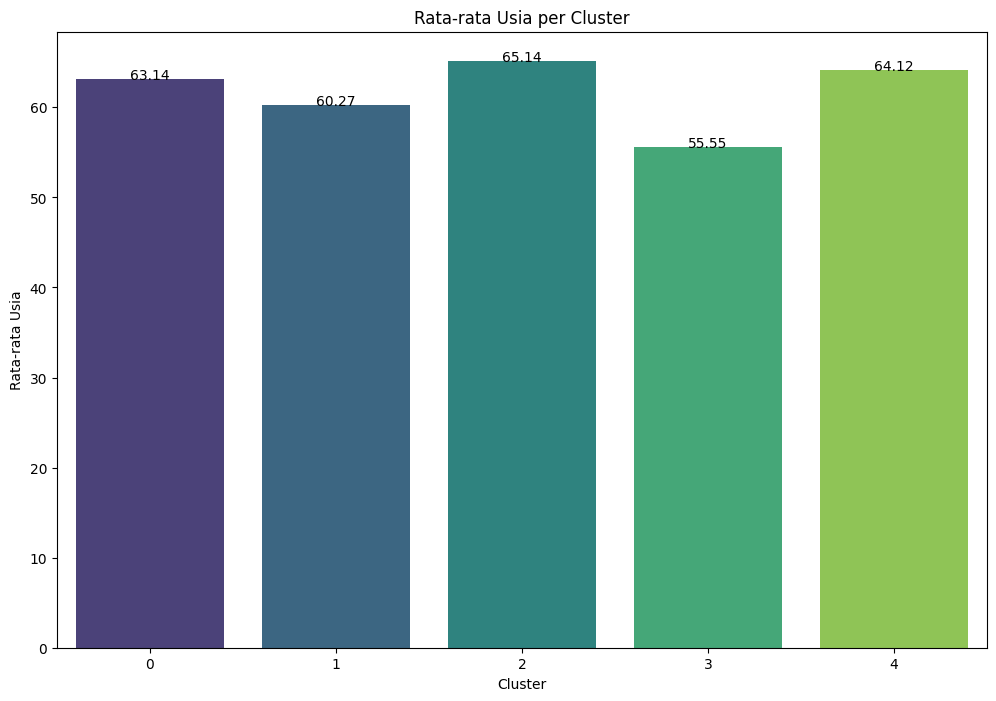

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata usia per cluster
mean_age_per_cluster = df_cluster.groupby('Cluster')['AGE'].mean().reset_index()

# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cluster', y='AGE', data=mean_age_per_cluster, palette='viridis')

# Menambahkan nilai rata-rata di atas setiap bar
for index, row in mean_age_per_cluster.iterrows():
    bar_plot.text(row.name, row.AGE, round(row.AGE, 2), color='black', ha="center")

plt.title('Rata-rata Usia per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Usia')
plt.show()

Dari visualisasi tersebut :      
- Seperti yang ditujukkan oleh visualisasi disamping, cluster 4 merupakan cluster dengan rata-rata umur paling tinggi pada pasien yang terdaftar di rumah sakit yaitu kurang lebih berumur = 65.14
- Sementara cluster 3 merupakan cluster dengan rata-rata umur terendah pada pasien di rumah sakit

**Interpretasi : Jumlah Gender Pasien pada rumah sakit**

<Figure size 1400x800 with 0 Axes>

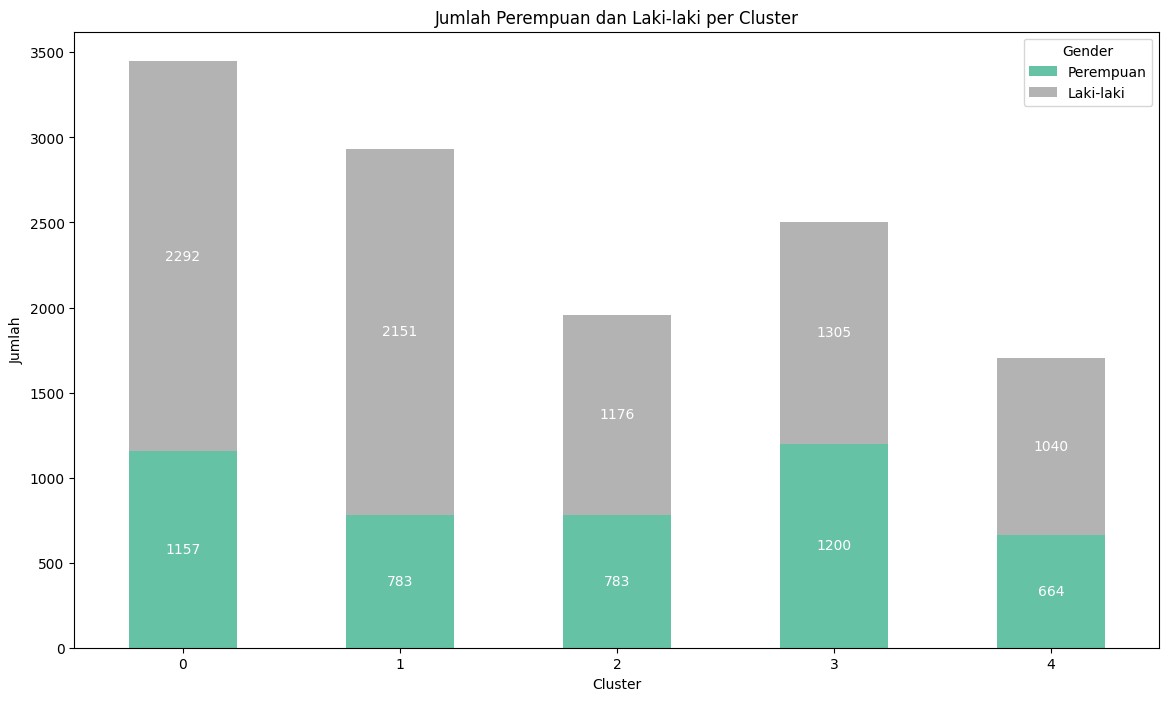

In [ ]:
# Menghitung jumlah perempuan dan laki-laki per cluster
gender_counts_per_cluster = df_cluster.groupby(['Cluster', 'GENDER']).size().unstack().fillna(0)
gender_counts_per_cluster.columns = ['Perempuan', 'Laki-laki']
# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(14, 8))
bar_plot = gender_counts_per_cluster.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
# Menambahkan nilai jumlah di atas setiap bar
for cluster in gender_counts_per_cluster.index:
    for gender in gender_counts_per_cluster.columns:
        count = gender_counts_per_cluster.loc[cluster, gender]
        plt.text(cluster, gender_counts_per_cluster.loc[cluster, :].cumsum()[gender] - count/2, int(count),
                 ha='center', va='center', color='white')
plt.title('Jumlah Perempuan dan Laki-laki per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

Dari visualisasi, dilakukan perhitungan jumlah perempuan dan laki-laki per cluster, dan menambahkan nilai jumlah di atas setiap bar dari visualisasi bar chart
- Terlihat bahwa di semua cluster yang paling banyak terdaftar yaitu pasien laki-laki
- Pasien Laki-laki terbanyak yaitu pada cluster 0
- Pasien perempuan paling sedikit yaitu pada cluster 1

**Interpretasi : Jumlah Proporsi Tempat Tinggal Pasien**

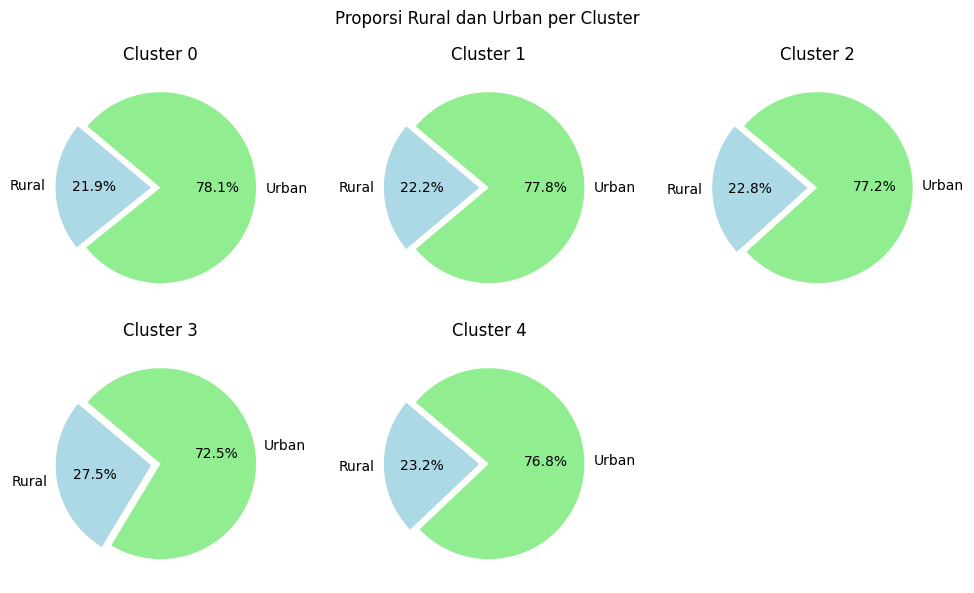

In [ ]:
# Menghitung jumlah Rural dan Urban per cluster
rural_counts_per_cluster = df_cluster.groupby(['Cluster', 'RURAL']).size().unstack().fillna(0)
rural_counts_per_cluster.columns = ['Rural', 'Urban']

# Menghitung total rural dan urban per cluster
rural_counts_per_cluster['Total'] = rural_counts_per_cluster.sum(axis=1)

# Visualisasi dalam bentuk pie chart
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']
explode = (0.1, 0)  # Meledakkan bagian pertama (Rural)
for i, cluster in enumerate(rural_counts_per_cluster.index):
    plt.subplot(2, 3, i+1)
    plt.pie(rural_counts_per_cluster.loc[cluster, ['Rural', 'Urban']], labels=['Rural', 'Urban'], colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
    plt.title(f'Cluster {cluster}')

plt.suptitle('Proporsi Rural dan Urban per Cluster')
plt.tight_layout()
plt.show()


- Dapat terlihat bahwa rata-rata pasien tinggal di daerah Perkotaan (Urban) pada setiap cluster
- Ditemukan pasien paling banyak tinggal di daerah perkotaan yaitu pada Cluster 0
- Sedangkan pasien yang paling banyak tinggal di daerah pedesaan yaitu pada cluster 2

**Interpretasi : Proporsi Tipe Pasien yang terdaftar**

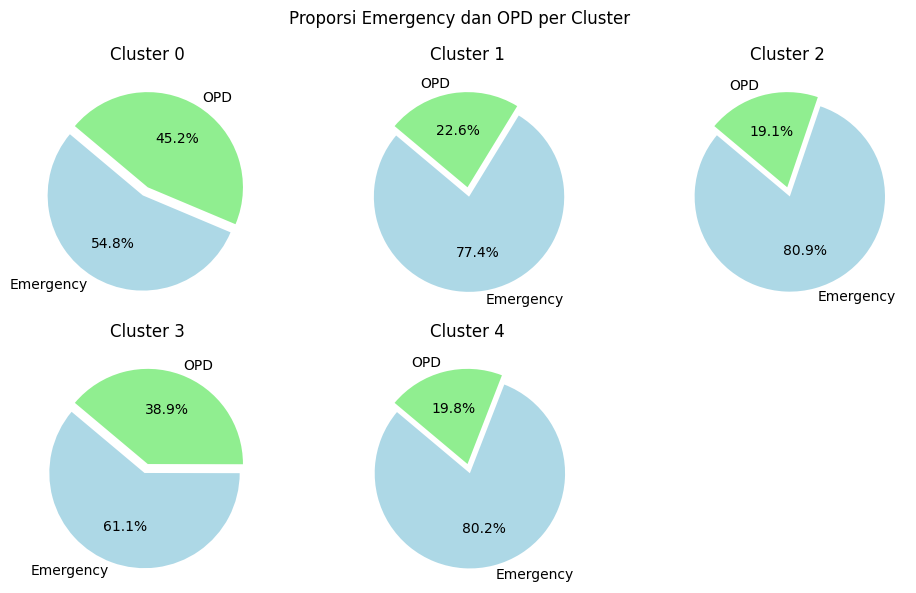

In [ ]:
#  Menghitung jumlah Rural dan Urban per cluster
rural_counts_per_cluster = df_cluster.groupby(['Cluster', 'TYPE OF ADMISSION-EMERGENCY/OPD']).size().unstack().fillna(0)
rural_counts_per_cluster.columns = ['Emergency', 'OPD']

# Menghitung total rural dan urban per cluster
rural_counts_per_cluster['Total'] = rural_counts_per_cluster.sum(axis=1)

# Visualisasi dalam bentuk pie chart
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']
explode = (0.1, 0)  # Meledakkan bagian pertama (Rural)
for i, cluster in enumerate(rural_counts_per_cluster.index):
    plt.subplot(2, 3, i+1)
    plt.pie(rural_counts_per_cluster.loc[cluster, ['Emergency', 'OPD']], labels=['Emergency', 'OPD'], colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
    plt.title(f'Cluster {cluster}')

plt.suptitle('Proporsi Emergency dan OPD per Cluster')
plt.tight_layout()
plt.show()


- Dapat terlihat bahwa rata-rata pasien yang terdaftar di rumah sakit kebanyakan pasien dengan tipe Emergency
- Ditemukan pasien paling Emergency paling banyak berada pada Cluster 4
- Sedangkan pasien yang terdaftar sebagai Outpatient paling banyak berada pada Cluster 0

**Interpretasi : Rata-Rata durasi lama pasien menginap**

<ipython-input-68-f0344cc1a296>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cluster', y='DURATION OF STAY', data=duration_of_stay_mean, palette='viridis')


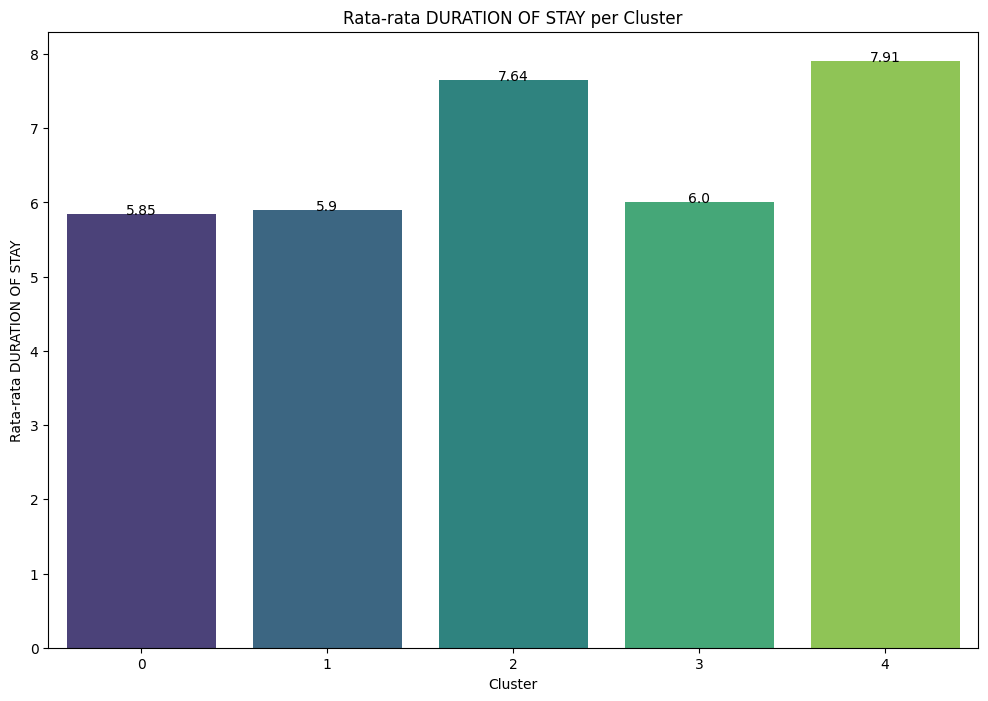

In [ ]:
# Bar chart for average DURATION OF STAY
duration_of_stay_mean = df_cluster.groupby('Cluster')['DURATION OF STAY'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cluster', y='DURATION OF STAY', data=duration_of_stay_mean, palette='viridis')

# Menambahkan nilai rata-rata di atas setiap bar
for index, row in duration_of_stay_mean.iterrows():
    bar_plot.text(row.name, row['DURATION OF STAY'], round(row['DURATION OF STAY'], 2), color='black', ha="center")

plt.title('Rata-rata DURATION OF STAY per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata DURATION OF STAY')
plt.show()


- Dapat terlihat bahwa rata-rata pasien menginap paling lama yaitu pada Cluster 1 sekitar 7-8 hari
- Sedangkan rata-rata pasien yang menginap paling sebentar yaitu pada Cluster 0  sekitar 5-6 hari

**Interpretasi rata-rata durasi lama pasien menginap di ICU**

<ipython-input-69-6efb88dfb697>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cluster', y='duration of intensive unit stay', data=duration_of_intensive_unit_stay_mean, palette='viridis')


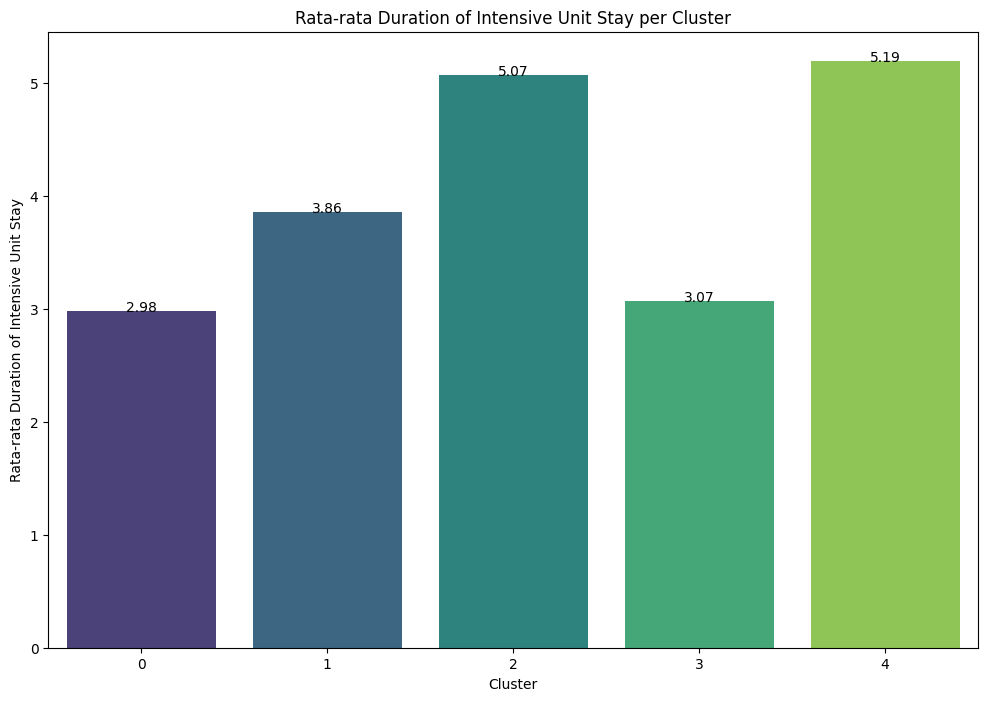

In [ ]:
# Bar chart for average duration of intensive unit stay
duration_of_intensive_unit_stay_mean = df_cluster.groupby('Cluster')['duration of intensive unit stay'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cluster', y='duration of intensive unit stay', data=duration_of_intensive_unit_stay_mean, palette='viridis')

# Menambahkan nilai rata-rata di atas setiap bar
for index, row in duration_of_intensive_unit_stay_mean.iterrows():
    bar_plot.text(row.name, row['duration of intensive unit stay'], round(row['duration of intensive unit stay'], 2), color='black', ha="center")

plt.title('Rata-rata Duration of Intensive Unit Stay per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Duration of Intensive Unit Stay')
plt.show()

- Dapat terlihat bahwa rata-rata pasien menginap paling lama di ICU (Intensive Unit Stay) yaitu pada Cluster 1 sekitar 5 hari
- Sedangkan rata-rata pasien yang menginap paling sebentar yaitu pada Cluster 0  sekitar 2-3 hari

**Interpretasi : Persentase Outcome Pasien**

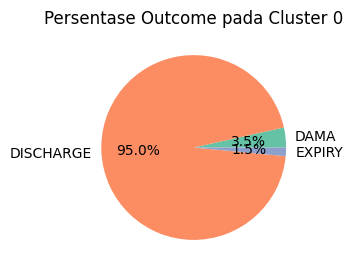

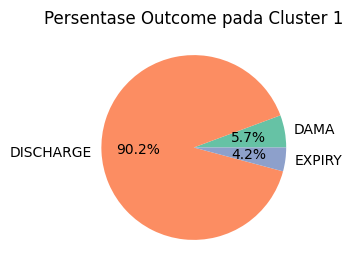

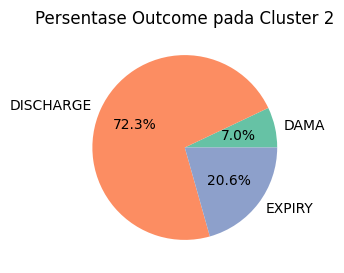

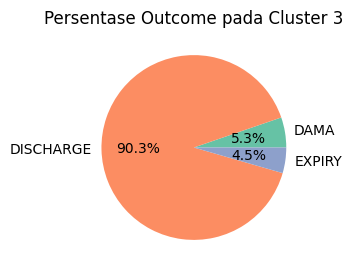

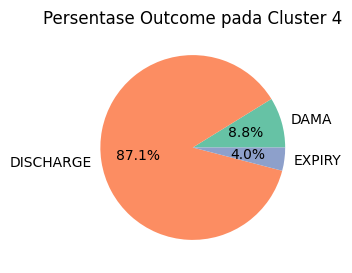

In [ ]:
# Pie chart for OUTCOME
outcome_per_cluster = df_cluster.groupby(['Cluster', 'OUTCOME']).size().unstack().fillna(0)
outcome_per_cluster.columns = ['DAMA', 'DISCHARGE', 'EXPIRY']
outcome_percentage = outcome_per_cluster.div(outcome_per_cluster.sum(axis=1), axis=0) * 100

for cluster in outcome_percentage.index:
    plt.figure(figsize=(4, 3))
    plt.pie(outcome_percentage.loc[cluster], labels=outcome_percentage.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase Outcome pada Cluster {cluster}')
    plt.show()



- Dapat terlihat bahwa persentase Outcome terbanyak yaitu dengan tipe DISCHARGE. Dengan kata lain Pasien paling banyak keluar dari rumah sakit yaitu ketika memang sudah sembuh/ kondisinya membaik sehingga dia diperbolehkan pulang dari rumah sakit.
- Persentase DISCHARGE paling tinggi adalah Cluster 0
- Persentase DAMA paling tinggi adalah pada Cluster 1
- Persentase EXPIRY paling tinggi adalah pada Cluster 4

**Interpretasi : Persentase Pasien terkena Heart Failure**

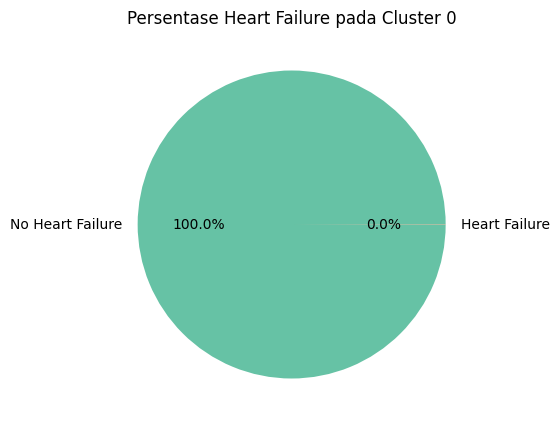

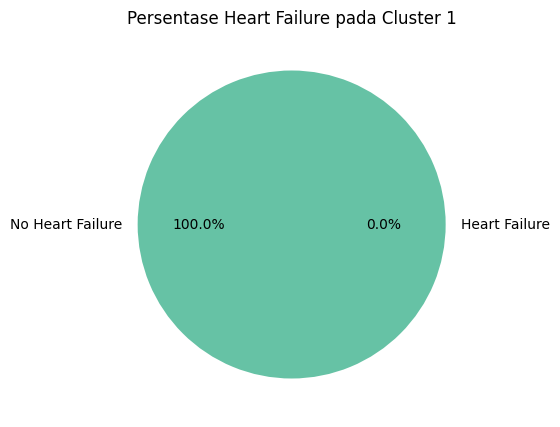

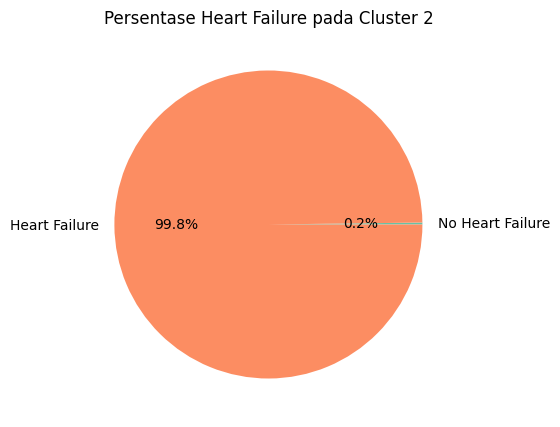

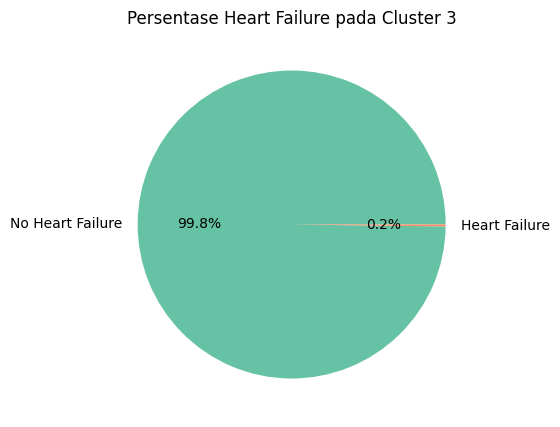

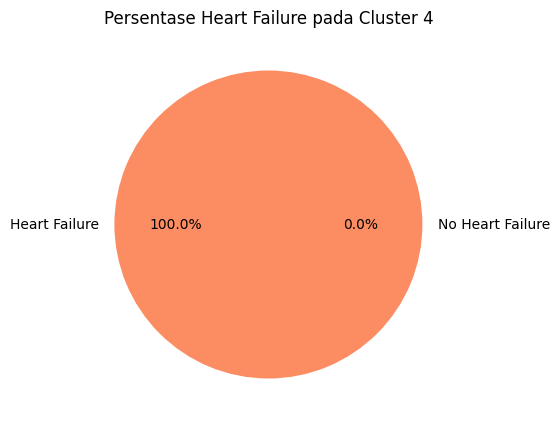

In [ ]:
# Pie chart for HEART FAILURE
heart_failure_per_cluster = df_cluster.groupby(['Cluster', 'HEART FAILURE']).size().unstack().fillna(0)
heart_failure_per_cluster.columns = ['No Heart Failure', 'Heart Failure']
heart_failure_percentage = heart_failure_per_cluster.div(heart_failure_per_cluster.sum(axis=1), axis=0) * 100

for cluster in heart_failure_percentage.index:
    plt.figure(figsize=(5, 5))
    plt.pie(heart_failure_percentage.loc[cluster], labels=heart_failure_percentage.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase Heart Failure pada Cluster {cluster}')
    plt.show()


- Dapat terlihat bahwa persentase pasien paling banyak terkena Heart Failure yaitu pada Cluster 1
- Sedangkan Pasien paling banyak yang tidak terkena Heart Failure yaitu pada Cluster 0 dan Cluster 3

**Interpretasi : Pasien terkena Diabetes Mellitus**

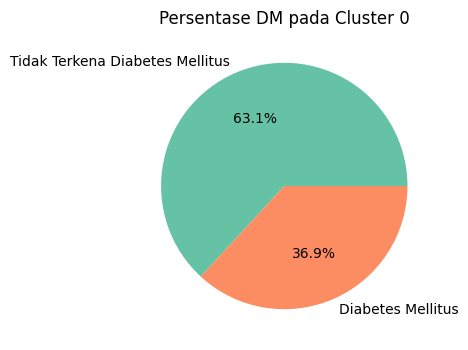

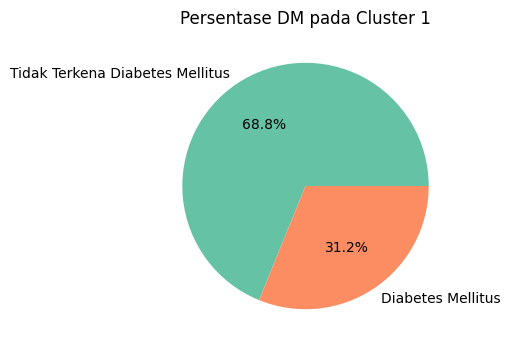

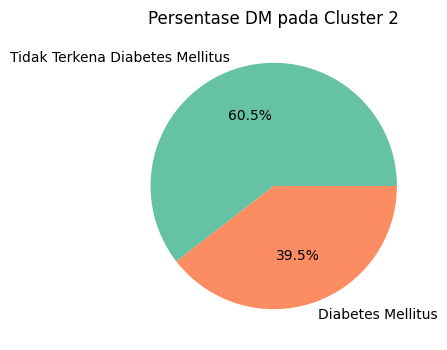

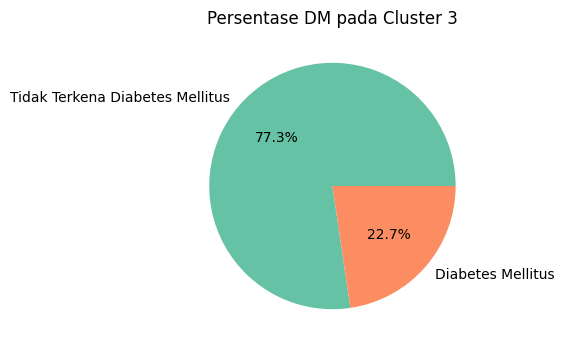

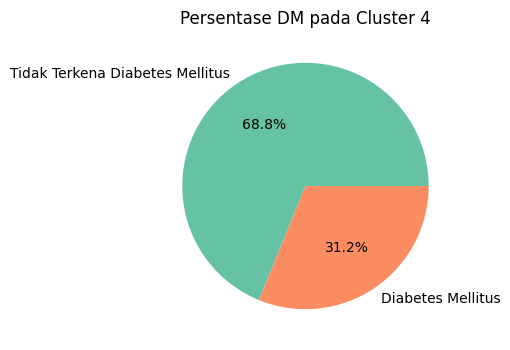

In [ ]:
# Pie chart for DM (Diabetes Mellitus)
dm_per_cluster = df_cluster.groupby(['Cluster', 'DM']).size().unstack().fillna(0)
dm_per_cluster.columns = ['Tidak Terkena Diabetes Mellitus', 'Diabetes Mellitus']
dm_percentage = dm_per_cluster.div(dm_per_cluster.sum(axis=1), axis=0) * 100
for cluster in dm_percentage.index:
    plt.figure(figsize=(4, 4))
    plt.pie(dm_percentage.loc[cluster], labels=dm_percentage.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase DM pada Cluster {cluster}')
    plt.show()

- Dapat terlihat bahwa persentase pasien paling banyak terkena Diabetes Mellitus yaitu pada Cluster 4
- Sedangkan Pasien paling banyak yang tidak terkena Diabetes Mellitus yaitu pada Cluster 2

### **Clustering dengan : Hierarchical Clustering (Agglomerative)**

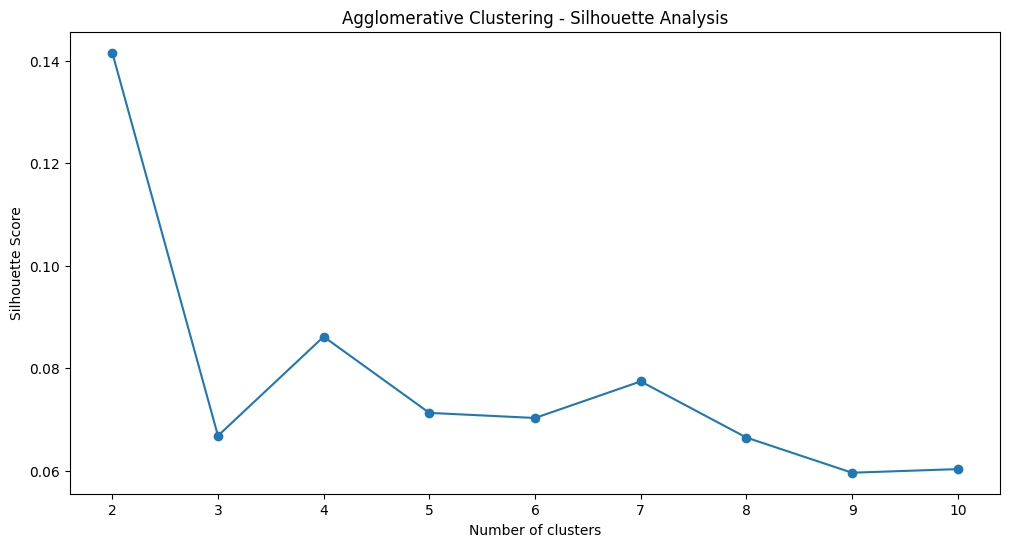

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Menerapkan PCA dengan 23 komponen seperti sebelumnya
pca = PCA(n_components=23)
df_pca = pca.fit_transform(df_cluster_scaled)

# Menentukan range untuk jumlah cluster yang akan diuji
range_n_clusters = list(range(2, 11))
silhouette_scores = []

# Menjalankan Agglomerative Clustering untuk setiap jumlah cluster
for num_clusters in range_n_clusters:
    agglom = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = agglom.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, cluster_labels))

# Plot analisis Siluet untuk Agglomerative Clustering
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Agglomerative Clustering - Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Berdasarkan siluet score di atas, kita menentukan bahwa jumlah cluster optimal-nya adalah 3

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Melakukan clustering dengan metode Agglomerative
optimal_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
df_cluster['Agg_Cluster'] = agg_clustering.fit_predict(df_pca)

# Analisis cluster
cluster_counts_agg = df_cluster['Agg_Cluster'].value_counts().sort_index()

print("Jumlah data di tiap cluster untuk Agglomerative Clustering:")
print(cluster_counts_agg)


Jumlah data di tiap cluster untuk Agglomerative Clustering:
Agg_Cluster
0    3875
1    6323
2    2353
Name: count, dtype: int64


In [ ]:
# Analisis cluster
cluster_analysis_agg = df_cluster.groupby('Agg_Cluster').mean()
print("Rata-rata fitur untuk tiap cluster (Agglomerative):")
cluster_analysis_agg

Rata-rata fitur untuk tiap cluster (Agglomerative):


AGE    GENDER     RURAL  TYPE OF ADMISSION-EMERGENCY/OPD  \
Agg_Cluster                                                                   
0            64.533419  0.605677  0.766710                         0.187097   
1            60.328009  0.610153  0.751542                         0.440455   
2            59.133022  0.747556  0.803655                         0.169996   

             DURATION OF STAY  duration of intensive unit stay  SMOKING   \
Agg_Cluster                                                                
0                    7.694452                         5.115097  0.037419   
1                    5.868733                         2.988139  0.046339   
2                    5.966001                         3.972376  0.082023   

              ALCOHOL        DM       HTN  ...       DVT  CARDIOGENIC SHOCK  \
Agg_Cluster                                ...                                
0            0.047742  0.350194  0.486968  ...  0.006452           0.138065   
1            0.067215  0.322474  0.531551  ...  0.021509           0.022300   
2            0.096048  0.281343  0.381640  ...  0.004675           0.022949   

                SHOCK  PULMONARY EMBOLISM  CHEST INFECTION   OUTCOME  \
Agg_Cluster                                                            
0            0.108903            0.005419         0.015484  1.079226   
1            0.014708            0.022616         0.028309  0.974379   
2            0.008075            0.008500         0.016150  0.960901   

                    HB     month  year   Cluster  
Agg_Cluster                                       
0            11.595583  6.455484   inf  2.851355  
1            12.254319  6.505298   inf  1.191523  
2            13.233634  6.631959   inf  1.104972  

[3 rows x 54 columns]

**Interpretasi : Rata -rata umur pasien di rumah sakit**

<ipython-input-76-ebcba113ecba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Agg_Cluster', y='AGE', data=mean_age_per_cluster_agg, palette='viridis')


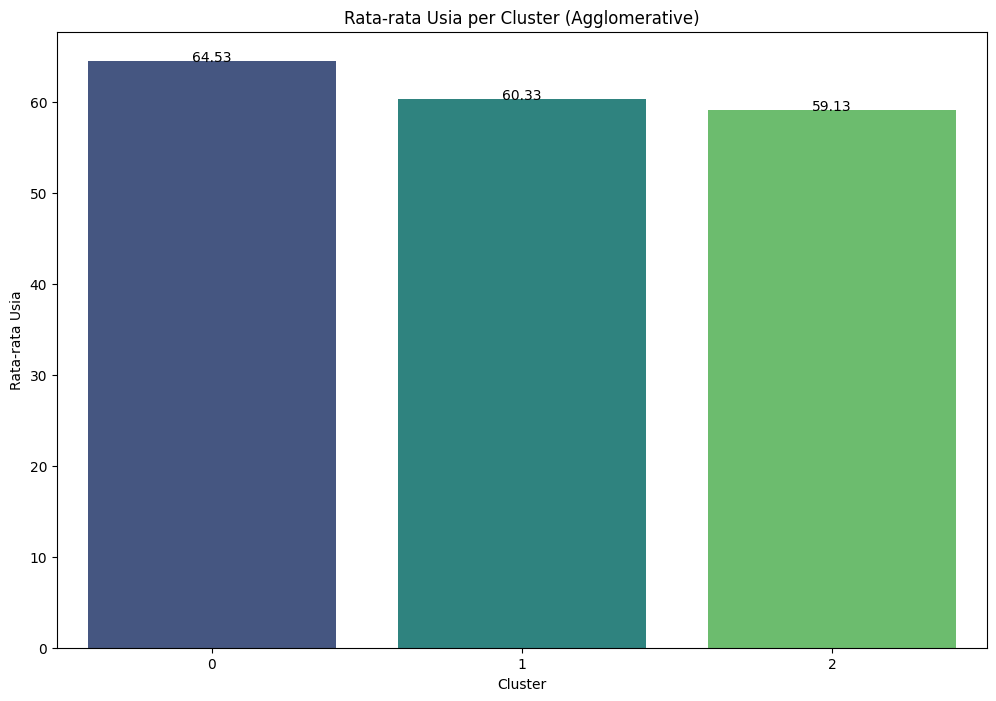

In [ ]:
# Menghitung rata-rata usia per cluster
mean_age_per_cluster_agg = df_cluster.groupby('Agg_Cluster')['AGE'].mean().reset_index()

# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Agg_Cluster', y='AGE', data=mean_age_per_cluster_agg, palette='viridis')

# Menambahkan nilai rata-rata di atas setiap bar
for index, row in mean_age_per_cluster_agg.iterrows():
    bar_plot.text(row.name, row.AGE, round(row.AGE, 2), color='black', ha="center")

plt.title('Rata-rata Usia per Cluster (Agglomerative)')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Usia')
plt.show()

Seperti yang ditujukkan oleh visualisasi disamping, **cluster 1 merupakan cluster dengan rata-rata umur paling tinggi** pada pasien yang terdaftar di rumah sakit yaitu kurang lebih berumur = 64.89

Sementara **cluster 0 merupakan cluster dengan rata-rata umur terendah** pada pasien di rumah sakit.

**Interpretasi : Jumlah Gender Pasien di rumah sakit**

<Figure size 1400x800 with 0 Axes>

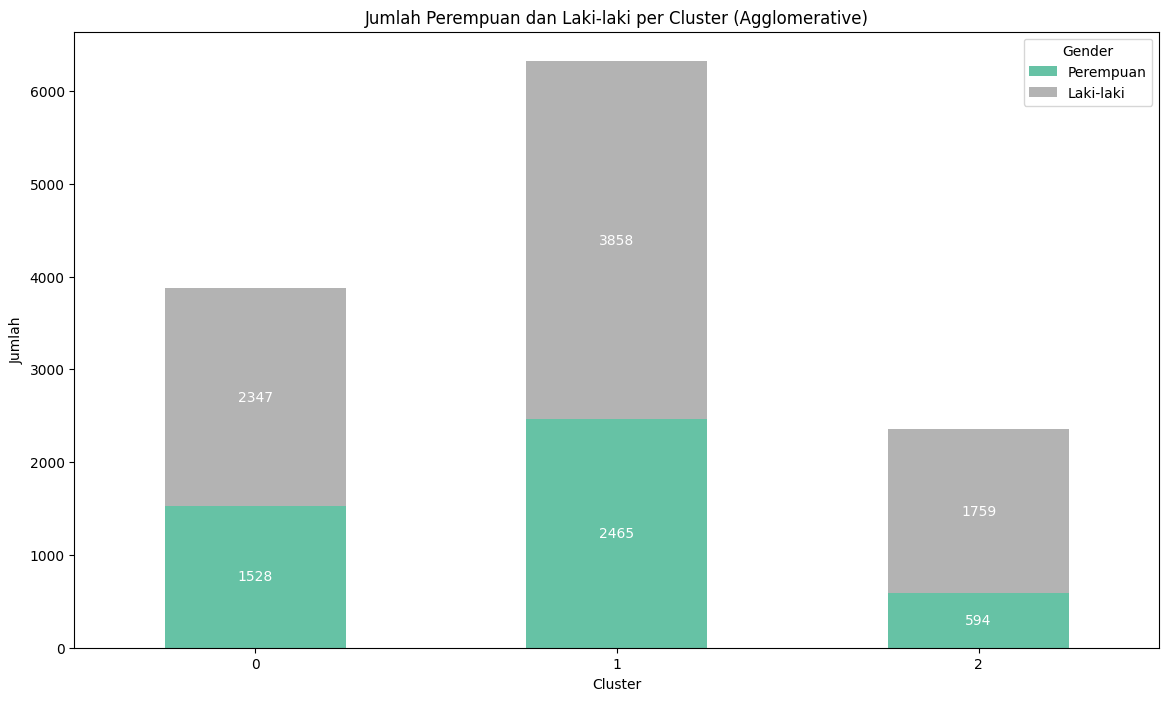

In [ ]:
# Menghitung jumlah perempuan dan laki-laki per cluster
gender_counts_per_cluster_agg = df_cluster.groupby(['Agg_Cluster', 'GENDER']).size().unstack().fillna(0)
gender_counts_per_cluster_agg.columns = ['Perempuan', 'Laki-laki']

# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(14, 8))
bar_plot = gender_counts_per_cluster_agg.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

# Menambahkan nilai jumlah di atas setiap bar
for cluster in gender_counts_per_cluster_agg.index:
    for gender in gender_counts_per_cluster_agg.columns:
        count = gender_counts_per_cluster_agg.loc[cluster, gender]
        plt.text(cluster, gender_counts_per_cluster_agg.loc[cluster, :].cumsum()[gender] - count / 2, int(count),
                 ha='center', va='center', color='white')

plt.title('Jumlah Perempuan dan Laki-laki per Cluster (Agglomerative)')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

Dari visualisasi, dilakukan perhitungan jumlah perempuan dan laki-laki per cluster, dan menambahkan nilai jumlah di atas setiap bar dari visualisasi bar chart.
- Terlihat bahwa di semua cluster yang paling banyak terdaftar yaitu pasien laki-laki.
- Pasien Laki-laki dan perempuan terbanyak yaitu pada cluster 0.

**Interpretasi : Proporsi Tempat Tinggal Pasien yang terdaftar di Rumah sakit**

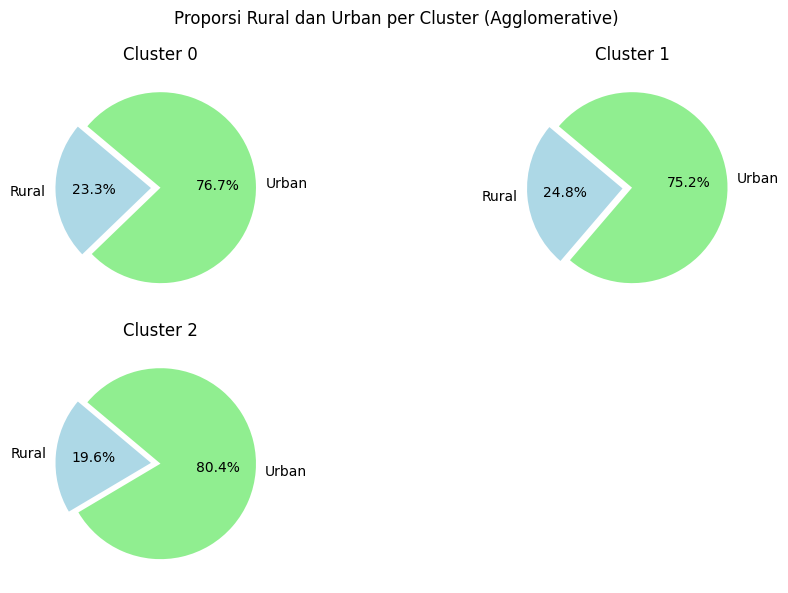

In [ ]:
# Menghitung jumlah Rural dan Urban per cluster
rural_counts_per_cluster_agg = df_cluster.groupby(['Agg_Cluster', 'RURAL']).size().unstack().fillna(0)
rural_counts_per_cluster_agg.columns = ['Rural', 'Urban']

# Menghitung total rural dan urban per cluster
rural_counts_per_cluster_agg['Total'] = rural_counts_per_cluster_agg.sum(axis=1)

# Visualisasi dalam bentuk pie chart
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Meledakkan bagian pertama (Rural)
for i, cluster in enumerate(rural_counts_per_cluster_agg.index):
    plt.subplot(2, 2, i + 1)
    plt.pie(rural_counts_per_cluster_agg.loc[cluster, ['Rural', 'Urban']], labels=['Rural', 'Urban'], colors=colors,
            autopct='%1.1f%%', startangle=140, explode=explode)
    plt.title(f'Cluster {cluster}')

plt.suptitle('Proporsi Rural dan Urban per Cluster (Agglomerative)')
plt.tight_layout()
plt.show()

Dapat terlihat bahwa rata-rata pasien tinggal di daerah Perkotaan (Urban) pada setiap cluster
- Ditemukan pasien paling banyak tinggal di daerah perkotaan (Urban) yaitu pada Cluster 1
- Sedangkan pasien yang paling banyak tinggal di daerah pedesaan yaitu pada cluster 0

**Interpretasi : Proporsi Tipe Pasien yang Terdaftar**

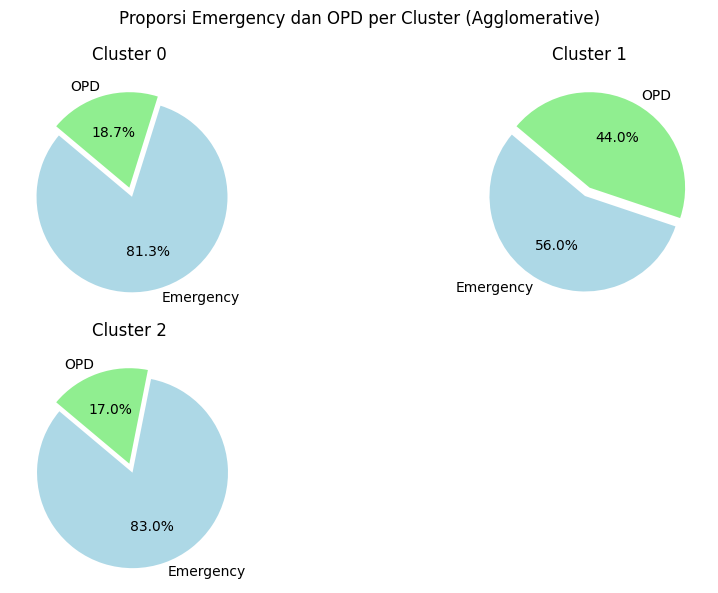

In [ ]:
# Menghitung jumlah Emergency dan OPD per cluster
admission_counts_per_cluster_agg = df_cluster.groupby(['Agg_Cluster', 'TYPE OF ADMISSION-EMERGENCY/OPD']).size().unstack().fillna(0)
admission_counts_per_cluster_agg.columns = ['Emergency', 'OPD']

# Menghitung total emergency dan OPD per cluster
admission_counts_per_cluster_agg['Total'] = admission_counts_per_cluster_agg.sum(axis=1)

# Visualisasi dalam bentuk pie chart
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Meledakkan bagian pertama (Emergency)
for i, cluster in enumerate(admission_counts_per_cluster_agg.index):
    plt.subplot(2, 2, i + 1)
    plt.pie(admission_counts_per_cluster_agg.loc[cluster, ['Emergency', 'OPD']], labels=['Emergency', 'OPD'],
            colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
    plt.title(f'Cluster {cluster}')

plt.suptitle('Proporsi Emergency dan OPD per Cluster (Agglomerative)')
plt.tight_layout()
plt.show()

- Dapat terlihat bahwa rata-rata pasien yang terdaftar di rumah sakit kebanyakan pasien dengan tipe Emergency
- Ditemukan pasien paling Emergency paling banyak berada pada Cluster 2
- Sedangkan pasien yang terdaftar sebagai Outpatient paling banyak berada pada Cluster 0

**Interpretasi : Rata-Rata Durasi Lama pasien menginap**

<ipython-input-80-7add85b67c88>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Agg_Cluster', y='DURATION OF STAY', data=duration_of_stay_mean_agg, palette='viridis')


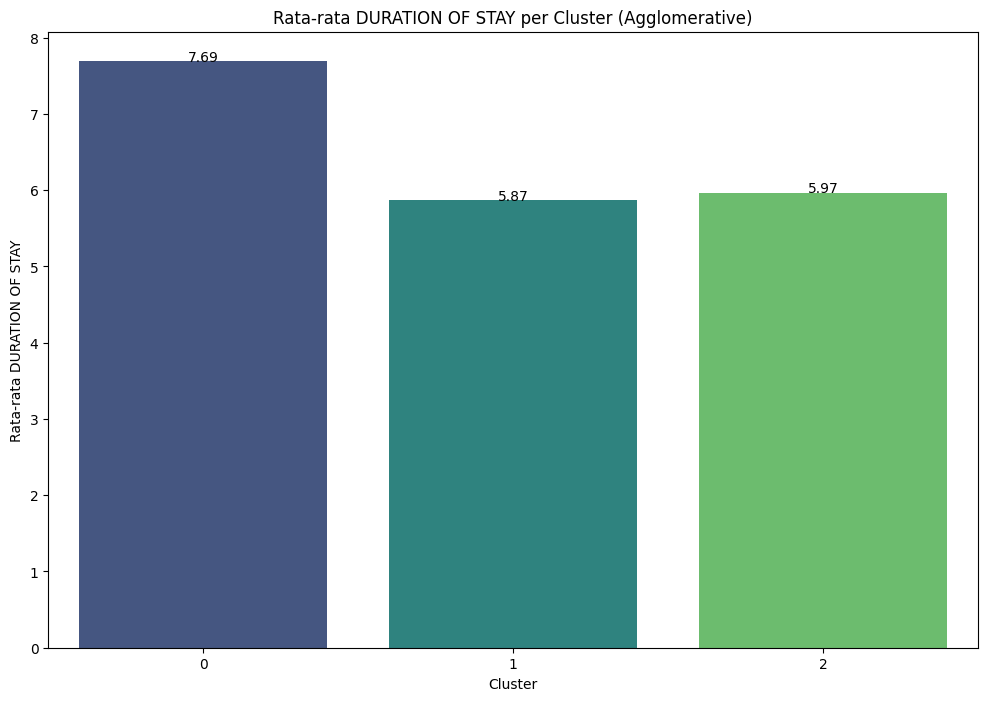

In [ ]:
# Bar chart untuk rata-rata DURATION OF STAY
duration_of_stay_mean_agg = df_cluster.groupby('Agg_Cluster')['DURATION OF STAY'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Agg_Cluster', y='DURATION OF STAY', data=duration_of_stay_mean_agg, palette='viridis')

# Menambahkan nilai rata-rata di atas setiap bar
for index, row in duration_of_stay_mean_agg.iterrows():
    bar_plot.text(row.name, row['DURATION OF STAY'], round(row['DURATION OF STAY'], 2), color='black', ha="center")

plt.title('Rata-rata DURATION OF STAY per Cluster (Agglomerative)')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata DURATION OF STAY')
plt.show()

- Dapat terlihat bahwa rata-rata pasien menginap paling lama yaitu pada Cluster  2 sekitar 7-8 hari
- Sedangkan rata-rata pasien yang menginap paling sebentar yaitu pada Cluster 0  sekitar 5-6 hari

**Interpretasi : Rata-rata durasi lama pasien menginap di ICU**

<ipython-input-81-c199339d3b73>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Agg_Cluster', y='duration of intensive unit stay', data=duration_of_intensive_unit_stay_mean_agg, palette='viridis')


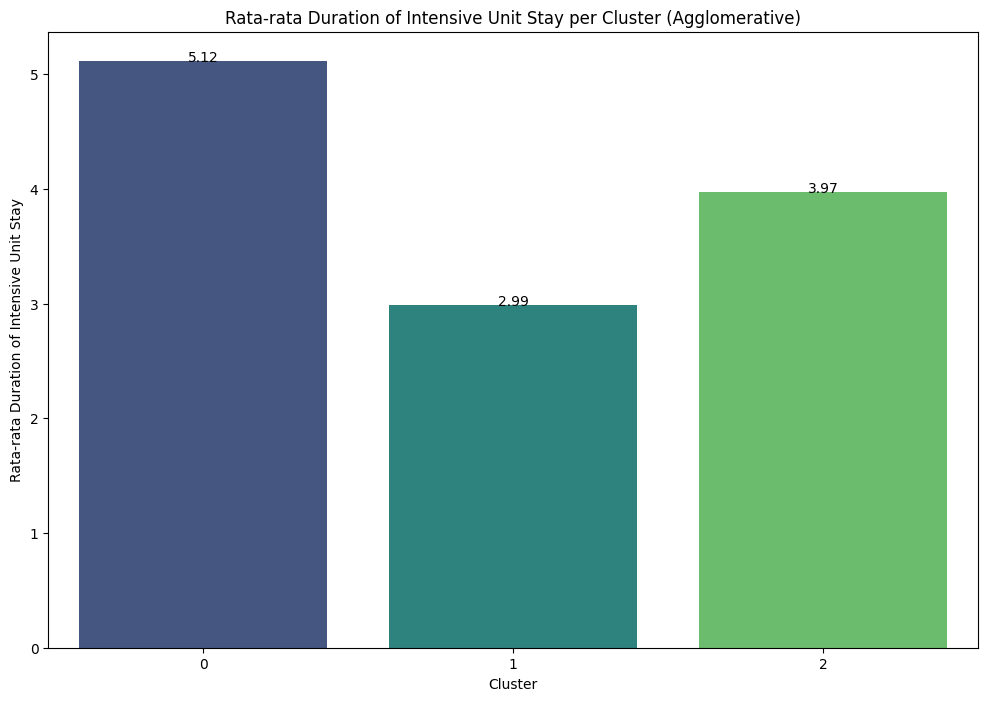

In [ ]:
# Bar chart untuk rata-rata duration of intensive unit stay
duration_of_intensive_unit_stay_mean_agg = df_cluster.groupby('Agg_Cluster')['duration of intensive unit stay'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Agg_Cluster', y='duration of intensive unit stay', data=duration_of_intensive_unit_stay_mean_agg, palette='viridis')

# Menambahkan nilai rata-rata di atas setiap bar
for index, row in duration_of_intensive_unit_stay_mean_agg.iterrows():
    bar_plot.text(row.name, row['duration of intensive unit stay'], round(row['duration of intensive unit stay'], 2), color='black', ha="center")

plt.title('Rata-rata Duration of Intensive Unit Stay per Cluster (Agglomerative)')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Duration of Intensive Unit Stay')
plt.show()

- Dapat terlihat bahwa rata-rata pasien menginap paling lama di ICU (Intensive Unit Stay) yaitu pada Cluster  2 sekitar 5 hari
- Sedangkan rata-rata pasien yang menginap paling sebentar yaitu pada Cluster 0  sekitar 3 hari

**Interpretasi : Persentase Outcome Pasien**

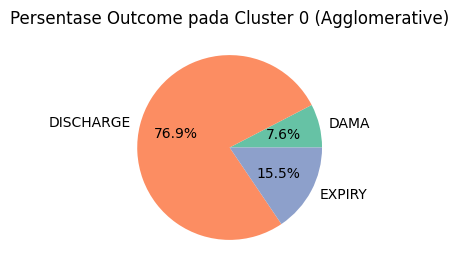

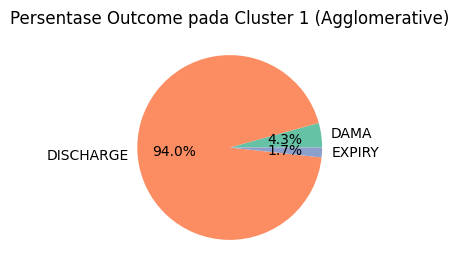

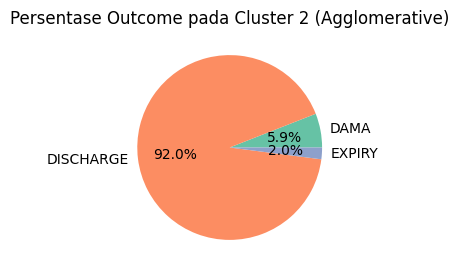

In [ ]:
# Pie chart untuk OUTCOME
outcome_per_cluster_agg = df_cluster.groupby(['Agg_Cluster', 'OUTCOME']).size().unstack().fillna(0)
outcome_per_cluster_agg.columns = ['DAMA', 'DISCHARGE', 'EXPIRY']
outcome_percentage_agg = outcome_per_cluster_agg.div(outcome_per_cluster_agg.sum(axis=1), axis=0) * 100

for cluster in outcome_percentage_agg.index:
    plt.figure(figsize=(4, 3))
    plt.pie(outcome_percentage_agg.loc[cluster], labels=outcome_percentage_agg.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase Outcome pada Cluster {cluster} (Agglomerative)')
    plt.show()


- Dapat terlihat bahwa persentase Outcome terbanyak yaitu dengan tipe DISCHARGE. Dengan kata lain Pasien paling banyak keluar dari rumah sakit yaitu ketika memang sudah sembuh/ kondisinya membaik sehingga dia diperbolehkan pulang dari rumah sakit.
- Persentase DISCHARGE paling tinggi adalah Cluster 0
- Persentase DAMA paling tinggi adalah pada Cluster 2
- Persentase EXPIRY paling tinggi adalah pada Cluster 1

**Interpretasi :Persentase Pasien terkena Heart Failure**

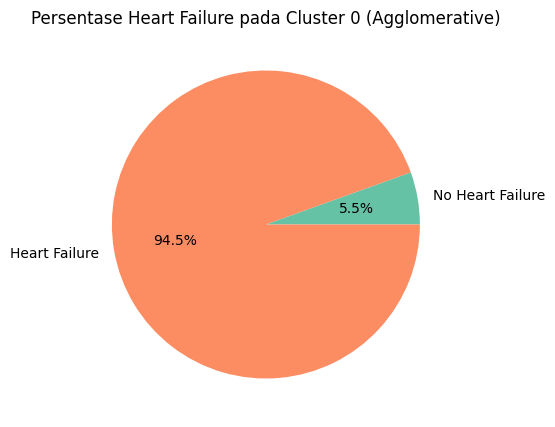

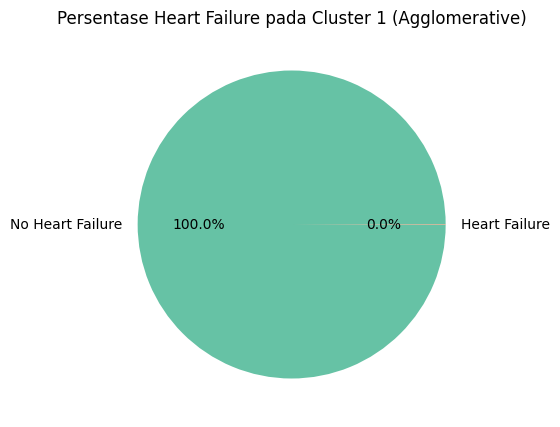

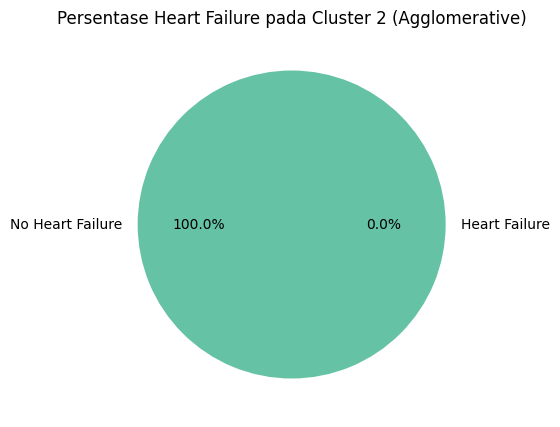

In [ ]:
# Pie chart untuk HEART FAILURE
heart_failure_per_cluster_agg = df_cluster.groupby(['Agg_Cluster', 'HEART FAILURE']).size().unstack().fillna(0)
heart_failure_per_cluster_agg.columns = ['No Heart Failure', 'Heart Failure']
heart_failure_percentage_agg = heart_failure_per_cluster_agg.div(heart_failure_per_cluster_agg.sum(axis=1), axis=0) * 100

for cluster in heart_failure_percentage_agg.index:
    plt.figure(figsize=(5, 5))
    plt.pie(heart_failure_percentage_agg.loc[cluster], labels=heart_failure_percentage_agg.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase Heart Failure pada Cluster {cluster} (Agglomerative)')
    plt.show()


- Dapat terlihat bahwa persentase pasien paling banyak terkena Heart Failure yaitu pada Cluster 1 dan cluster 2
- Sedangkan Pasien paling banyak yang tidak terkena Heart Failure yaitu pada Cluster 0

**Interpretasi : Persentase Pasien yang terkena Diabetes Mellitus**

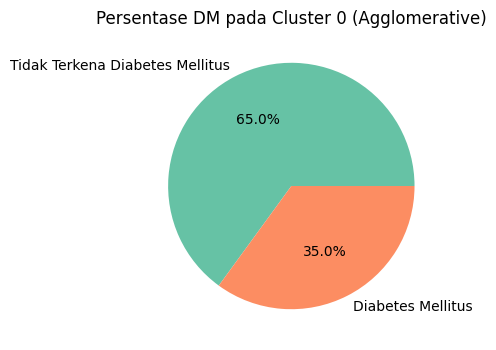

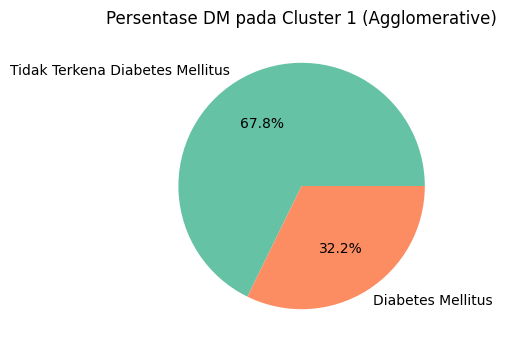

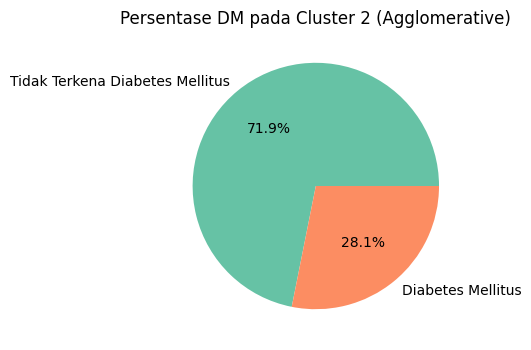

In [ ]:
# Pie chart untuk DM (Diabetes Mellitus)
dm_per_cluster_agg = df_cluster.groupby(['Agg_Cluster', 'DM']).size().unstack().fillna(0)
dm_per_cluster_agg.columns = ['Tidak Terkena Diabetes Mellitus', 'Diabetes Mellitus']
dm_percentage_agg = dm_per_cluster_agg.div(dm_per_cluster_agg.sum(axis=1), axis=0) * 100

for cluster in dm_percentage_agg.index:
    plt.figure(figsize=(4, 4))
    plt.pie(dm_percentage_agg.loc[cluster], labels=dm_percentage_agg.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase DM pada Cluster {cluster} (Agglomerative)')
    plt.show()

- Dapat terlihat bahwa persentase pasien paling banyak terkena Diabetes Mellitus yaitu pada Cluster 1
- Sedangkan Pasien paling banyak yang tidak terkena Diabetes Mellitus yaitu pada Cluster 0

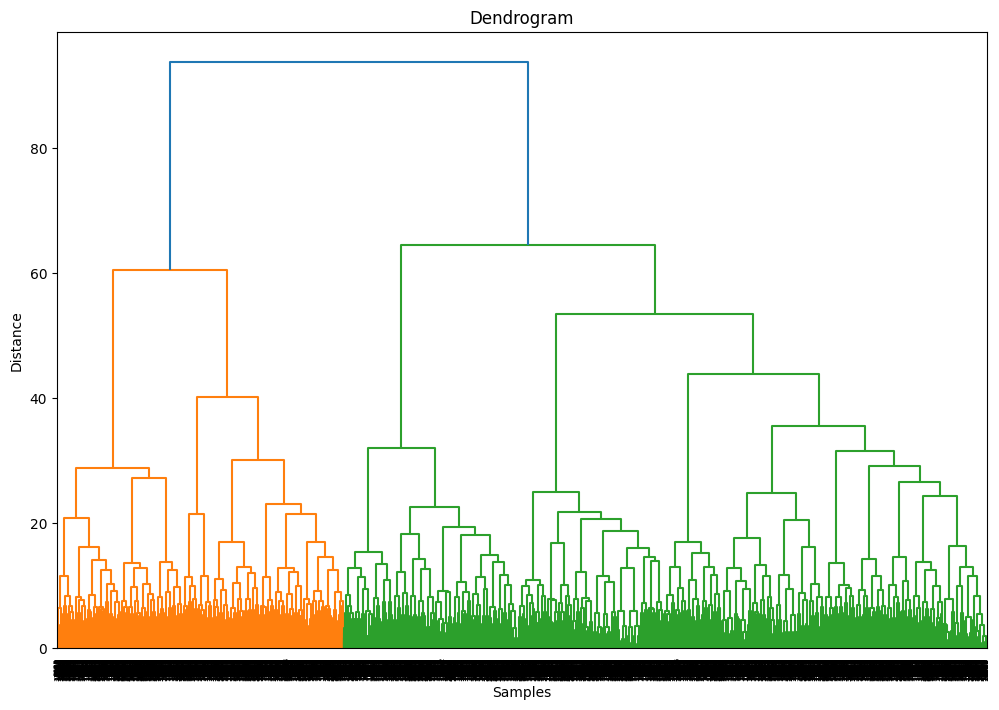

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Menghitung linkage matrix
Z = linkage(df_pca, method='ward')

# Menggambar dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


### **Clustering dengan : KMEANS tanpa PCA**

Untuk menentukan jumlah cluster yang optimal, kami menggunakan menggunakan Elbow Method dan Silhouette Analysis terlebih dahulu

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

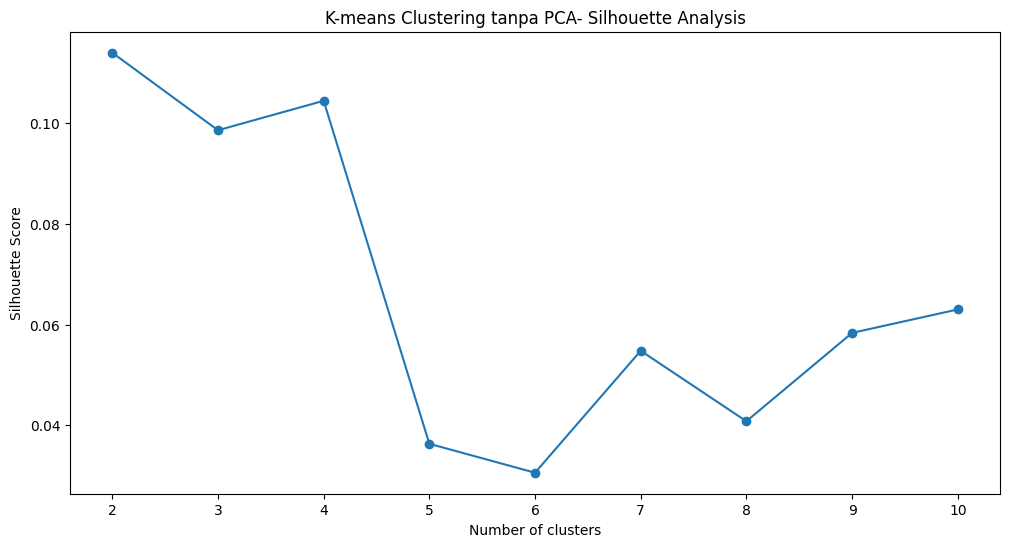

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Mengasumsikan df_cluster sudah tersedia dan siap digunakan
# Skalakan data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Menentukan range untuk jumlah cluster yang akan diuji
range_n_clusters = list(range(2, 11))
silhouette_scores = []

# Menjalankan K-means untuk setiap jumlah cluster
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_cluster_scaled)
    silhouette_scores.append(silhouette_score(df_cluster_scaled, cluster_labels))

# Plot analisis Siluet untuk K-means
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('K-means Clustering tanpa PCA- Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

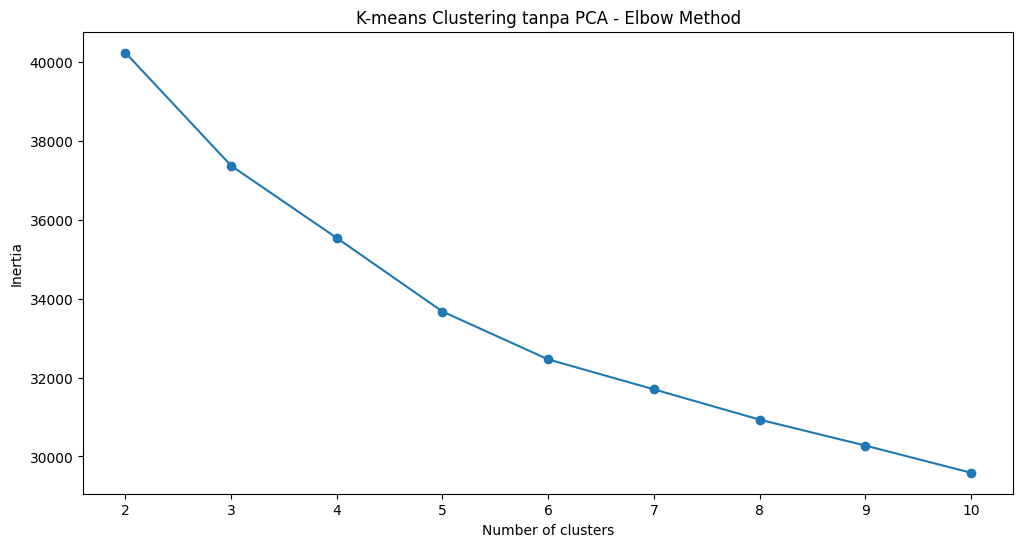

In [ ]:
# Plot Elbow Method untuk K-means
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('K-means Clustering tanpa PCA - Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.show()

Berdasarkan elbow method dan siluet score di atas kami menentukan bahwa n cluster paling optimal adalah 3.

**Rata-rata fitur untuk tiap cluster**

In [ ]:
# Jalankan K-means dengan n_cluster = 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Analisis rata-rata fitur di tiap cluster
cluster_analysis = df_cluster.groupby('Cluster').mean()
print("Rata-rata fitur untuk tiap cluster:")
cluster_analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Rata-rata fitur untuk tiap cluster:


AGE    GENDER     RURAL  TYPE OF ADMISSION-EMERGENCY/OPD  \
Cluster                                                                   
0        65.543276  0.663782  0.766977                         0.155792   
1        64.239856  0.592277  0.771597                         0.204516   
2        59.539347  0.645190  0.763668                         0.381709   

         DURATION OF STAY  duration of intensive unit stay  SMOKING   \
Cluster                                                                
0                8.697736                         5.789614   0.02996   
1                7.736257                         5.094241   0.04123   
2                5.536845                         2.977355   0.05755   

          ALCOHOL        DM       HTN  ...       DVT  CARDIOGENIC SHOCK  \
Cluster                                ...                                
0        0.051931  0.486019  0.579893  ...  0.003329           0.184421   
1        0.050393  0.334751  0.470550  ...  0.006872           0.069045   
2        0.075566  0.288377  0.480045  ...  0.018266           0.030276   

            SHOCK  PULMONARY EMBOLISM  CHEST INFECTION   OUTCOME         HB  \
Cluster                                                                       
0        0.174434            0.007989         0.029294  1.129827  10.189157   
1        0.045157            0.004908         0.013089  1.020615  11.899787   
2        0.016765            0.019642         0.024146  0.974353  12.746881   

            month  year  Agg_Cluster  
Cluster                               
0        6.432756   inf     0.509321  
1        6.506217   inf     0.015052  
2        6.531715   inf     1.278369  

[3 rows x 54 columns]

**Interpretasi : Rata-rata umur pasien**

<ipython-input-89-54d48dc2cb8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cluster', y='AGE', data=mean_age_per_cluster, palette='viridis')


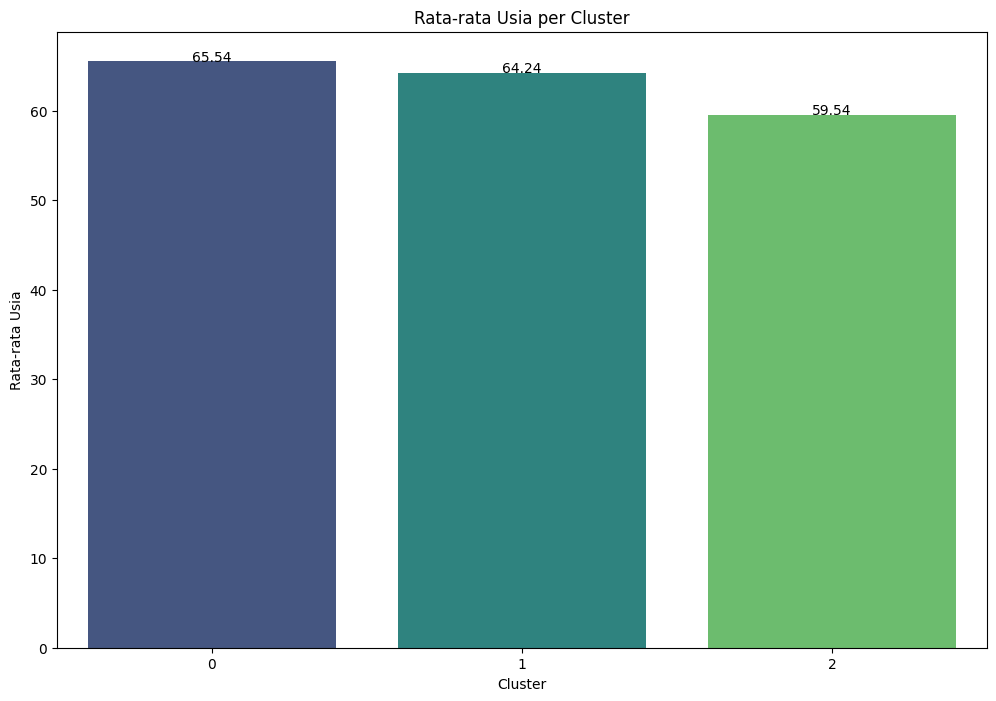

In [ ]:
# Menghitung rata-rata usia per cluster
mean_age_per_cluster = df_cluster.groupby('Cluster')['AGE'].mean().reset_index()

# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cluster', y='AGE', data=mean_age_per_cluster, palette='viridis')

# Menambahkan nilai rata-rata di atas setiap bar
for index, row in mean_age_per_cluster.iterrows():
    bar_plot.text(row.name, row.AGE, round(row.AGE, 2), color='black', ha="center")

plt.title('Rata-rata Usia per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Usia')
plt.show()

- Seperti yang ditujukkan oleh visualisasi disamping, cluster 2 merupakan cluster dengan rata-rata umur paling tinggi pada pasien yang terdaftar di rumah sakit yaitu kurang lebih berumur = 65.62

- Sementara cluster 0 merupakan cluster dengan rata-rata umur terendah pada pasien di rumah sakit

**Interpretasi : Rata-rata Jumlah Gender Pasien**

<Figure size 1400x800 with 0 Axes>

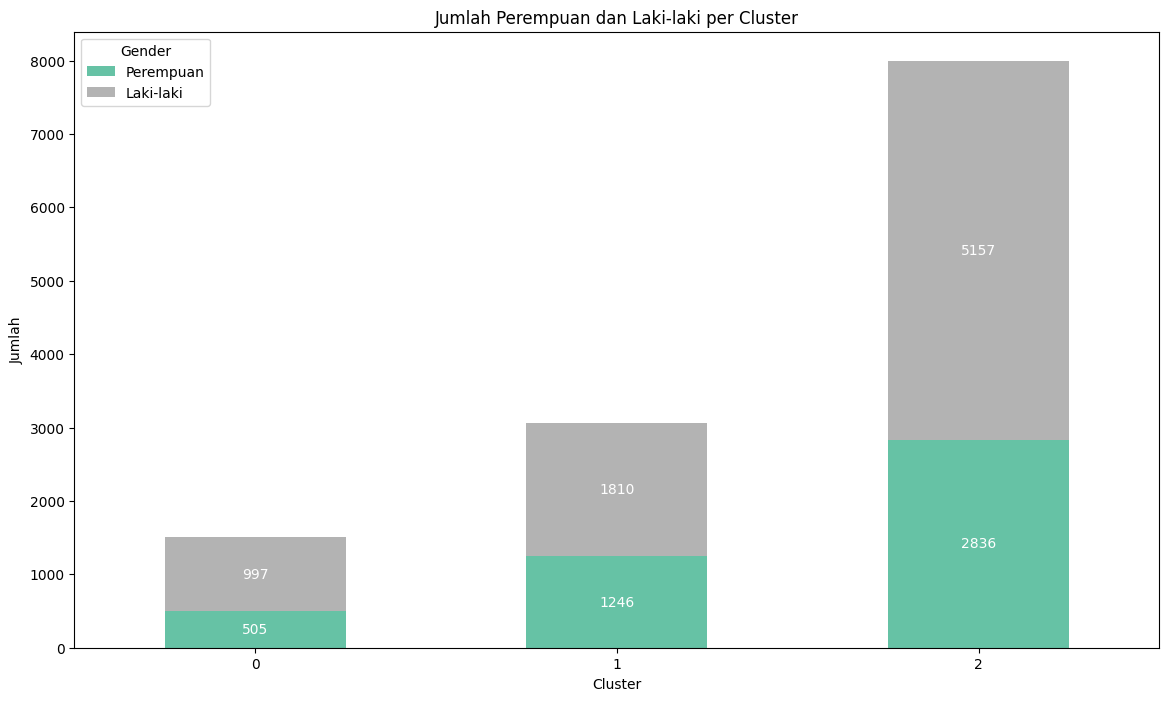

In [ ]:
# Menghitung jumlah perempuan dan laki-laki per cluster
gender_counts_per_cluster = df_cluster.groupby(['Cluster', 'GENDER']).size().unstack().fillna(0)
gender_counts_per_cluster.columns = ['Perempuan', 'Laki-laki']

# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(14, 8))
gender_counts_per_cluster.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
# Menambahkan nilai jumlah di atas setiap bar
for cluster in gender_counts_per_cluster.index:
    for gender in gender_counts_per_cluster.columns:
        count = gender_counts_per_cluster.loc[cluster, gender]
        plt.text(cluster, gender_counts_per_cluster.loc[cluster, :].cumsum()[gender] - count / 2, int(count),
                 ha='center', va='center', color='white')
plt.title('Jumlah Perempuan dan Laki-laki per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

Dari visualisasi, dilakukan perhitungan jumlah perempuan dan laki-laki per cluster, dan menambahkan nilai jumlah di atas setiap bar dari visualisasi bar chart.

- Terlihat bahwa di semua cluster yang paling banyak terdaftar yaitu pasien laki-laki.
- Pasien Laki-laki dan perempuan terbanyak yaitu pada cluster 0.

**Interpretasi : Proporsi Tempat Tinggal Pasien**

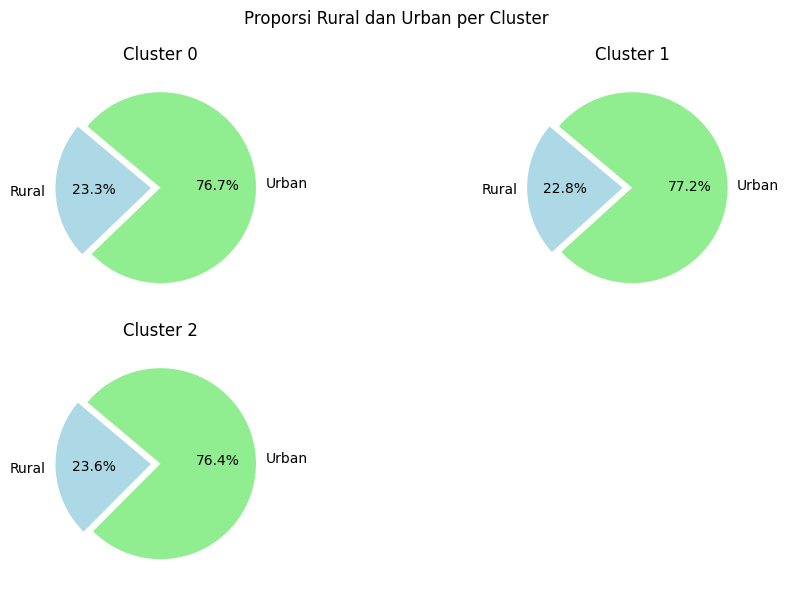

In [ ]:
# Menghitung jumlah Rural dan Urban per cluster
rural_counts_per_cluster = df_cluster.groupby(['Cluster', 'RURAL']).size().unstack().fillna(0)
rural_counts_per_cluster.columns = ['Rural', 'Urban']

# Visualisasi dalam bentuk pie chart
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Meledakkan bagian pertama (Rural)
for i, cluster in enumerate(rural_counts_per_cluster.index):
    plt.subplot(2, 2, i + 1)
    plt.pie(rural_counts_per_cluster.loc[cluster, ['Rural', 'Urban']], labels=['Rural', 'Urban'], colors=colors,
            autopct='%1.1f%%', startangle=140, explode=explode)
    plt.title(f'Cluster {cluster}')

plt.suptitle('Proporsi Rural dan Urban per Cluster')
plt.tight_layout()
plt.show()

- Dapat terlihat bahwa rata-rata pasien tinggal di daerah Perkotaan (Urban) pada setiap cluster
- Ditemukan pasien paling banyak tinggal di daerah perkotaan yaitu pada Cluster 2 Sedangkan pasien yang paling banyak tinggal di daerah pedesaan yaitu pada cluster 0

**Interpretasi : Proporsi Tipe Pasien yang Terdaftar**

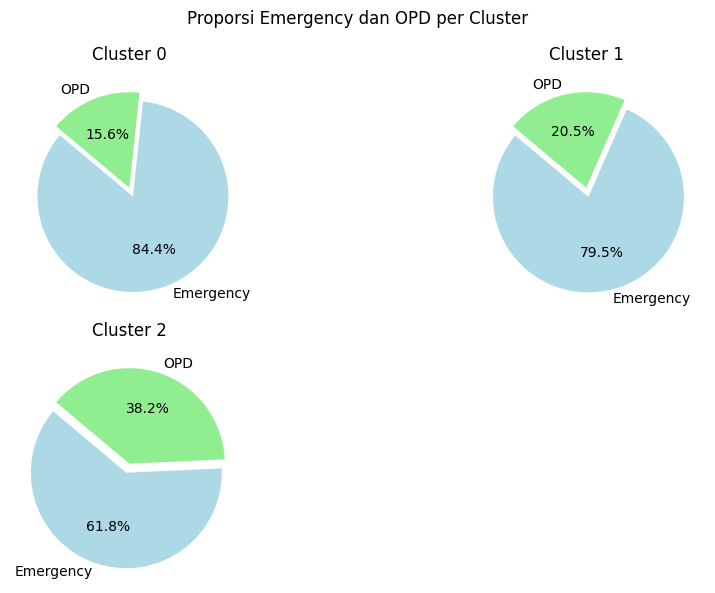

In [ ]:
# Menghitung jumlah Emergency dan OPD per cluster
admission_counts_per_cluster = df_cluster.groupby(['Cluster', 'TYPE OF ADMISSION-EMERGENCY/OPD']).size().unstack().fillna(0)
admission_counts_per_cluster.columns = ['Emergency', 'OPD']

# Visualisasi dalam bentuk pie chart
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Meledakkan bagian pertama (Emergency)
for i, cluster in enumerate(admission_counts_per_cluster.index):
    plt.subplot(2, 2, i + 1)
    plt.pie(admission_counts_per_cluster.loc[cluster, ['Emergency', 'OPD']], labels=['Emergency', 'OPD'], colors=colors,
            autopct='%1.1f%%', startangle=140, explode=explode)
    plt.title(f'Cluster {cluster}')

plt.suptitle('Proporsi Emergency dan OPD per Cluster')
plt.tight_layout()
plt.show()

- Dapat terlihat bahwa rata-rata pasien yang terdaftar di rumah sakit kebanyakan pasien dengan tipe Emergency
- Ditemukan pasien paling Emergency paling banyak berada pada Cluster 1
Sedangkan pasien yang terdaftar sebagai Outpatient paling banyak berada pada Cluster 0

**Interpretasi : Rata-rata Durasi Lama Pasien Menginap**

<ipython-input-93-214d9bd6be1a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cluster', y='DURATION OF STAY', data=duration_of_stay_mean, palette='viridis')


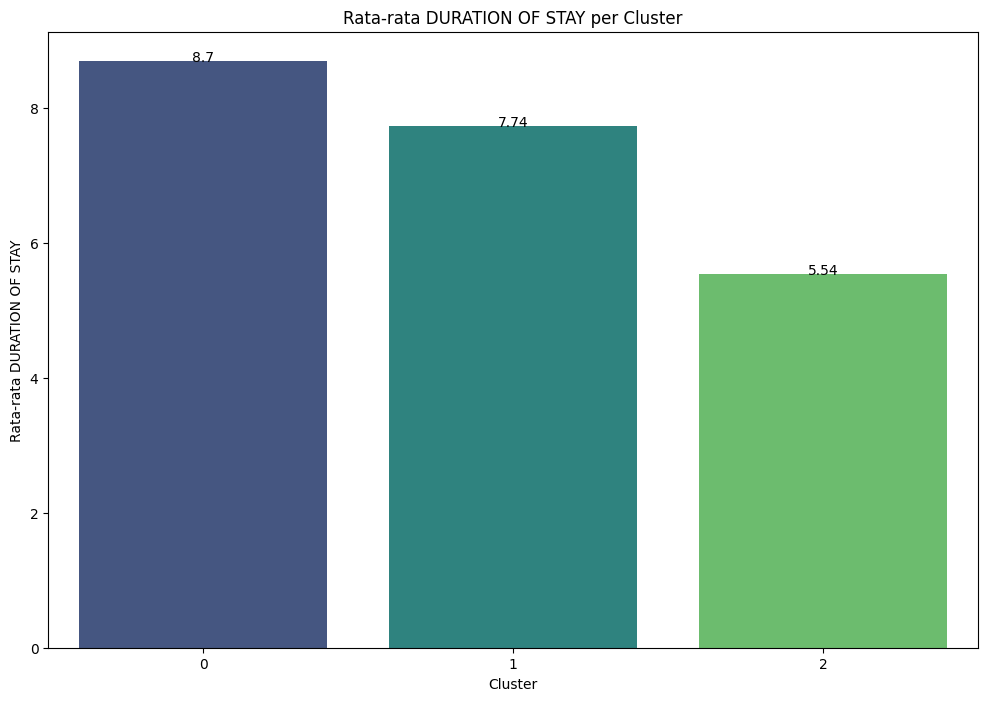

In [ ]:
# Bar chart untuk rata-rata DURATION OF STAY
duration_of_stay_mean = df_cluster.groupby('Cluster')['DURATION OF STAY'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cluster', y='DURATION OF STAY', data=duration_of_stay_mean, palette='viridis')

# Menambahkan nilai rata-rata di atas setiap bar
for index, row in duration_of_stay_mean.iterrows():
    bar_plot.text(row.name, row['DURATION OF STAY'], round(row['DURATION OF STAY'], 2), color='black', ha="center")

plt.title('Rata-rata DURATION OF STAY per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata DURATION OF STAY')
plt.show()

- Dapat terlihat bahwa rata-rata pasien menginap paling lama yaitu pada Cluster  1 sekitar 8-9 hari
- Sedangkan rata-rata pasien yang menginap paling sebentar yaitu pada Cluster 0  sekitar 5-6 hari

**Interpretasi : Rata-rata Durasi Lama Pasien Menginap di ICU**

<ipython-input-94-7f8a34a326e2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cluster', y='duration of intensive unit stay', data=duration_of_intensive_unit_stay_mean, palette='viridis')


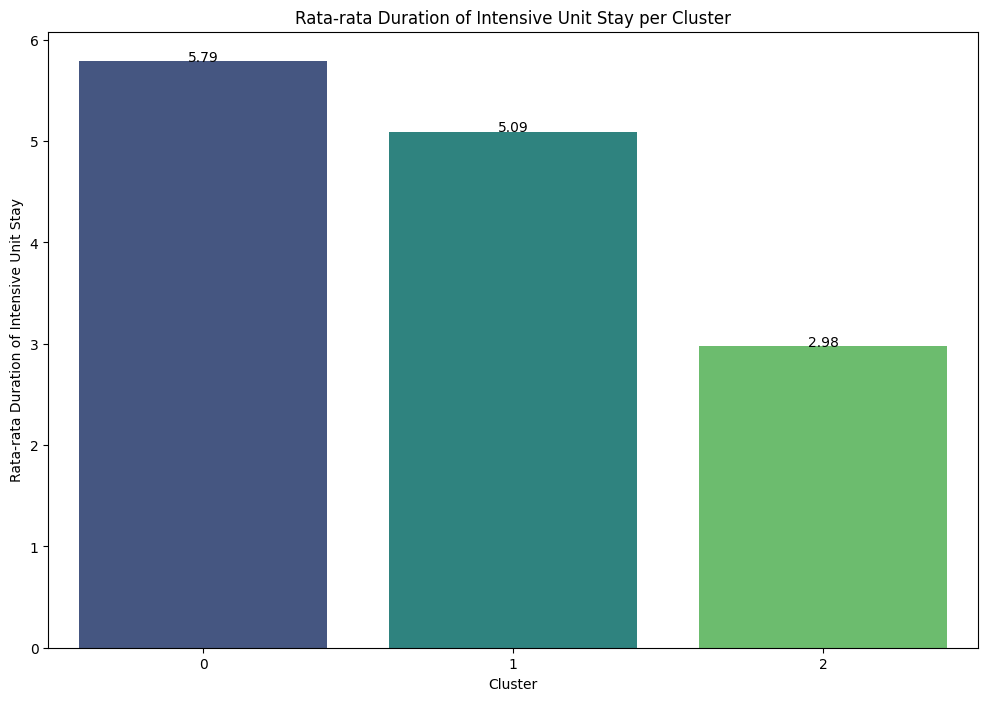

In [ ]:
# Bar chart untuk rata-rata duration of intensive unit stay
duration_of_intensive_unit_stay_mean = df_cluster.groupby('Cluster')['duration of intensive unit stay'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cluster', y='duration of intensive unit stay', data=duration_of_intensive_unit_stay_mean, palette='viridis')

# Menambahkan nilai rata-rata di atas setiap bar
for index, row in duration_of_intensive_unit_stay_mean.iterrows():
    bar_plot.text(row.name, row['duration of intensive unit stay'], round(row['duration of intensive unit stay'], 2), color='black', ha="center")

plt.title('Rata-rata Duration of Intensive Unit Stay per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Duration of Intensive Unit Stay')
plt.show()

- Dapat terlihat bahwa rata-rata pasien menginap paling lama di ICU (Intensive Unit Stay) yaitu pada Cluster  1 sekitar 6 hari
- Sedangkan rata-rata pasien yang menginap paling sebentar yaitu pada Cluster 0  sekitar 3 hari

**Interpretasi : Presentase Outcome Pasien**

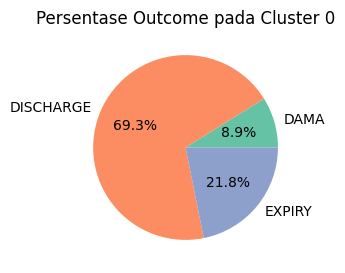

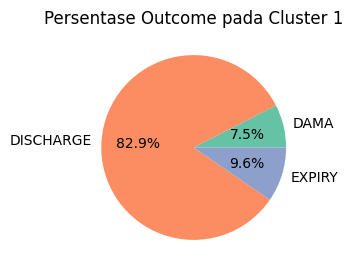

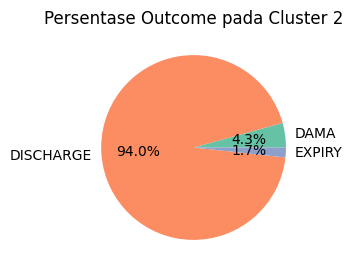

In [ ]:
# Pie chart untuk OUTCOME
outcome_per_cluster = df_cluster.groupby(['Cluster', 'OUTCOME']).size().unstack().fillna(0)
outcome_per_cluster.columns = ['DAMA', 'DISCHARGE', 'EXPIRY']
outcome_percentage = outcome_per_cluster.div(outcome_per_cluster.sum(axis=1), axis=0) * 100

for cluster in outcome_percentage.index:
    plt.figure(figsize=(4, 3))
    plt.pie(outcome_percentage.loc[cluster], labels=outcome_percentage.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase Outcome pada Cluster {cluster}')
    plt.show()

- Dapat terlihat bahwa persentase Outcome terbanyak yaitu dengan tipe DISCHARGE. Dengan kata lain Pasien paling banyak keluar dari rumah sakit yaitu ketika memang sudah sembuh/ kondisinya membaik sehingga dia diperbolehkan pulang dari rumah sakit.
- Persentase DISCHARGE paling tinggi adalah Cluster 0
- Persentase DAMA paling tinggi adalah pada Cluster 2
- Persentase EXPIRY paling tinggi adalah pada Cluster 1

**Interpretasi : Persentase Pasien terkena Heart Failure**

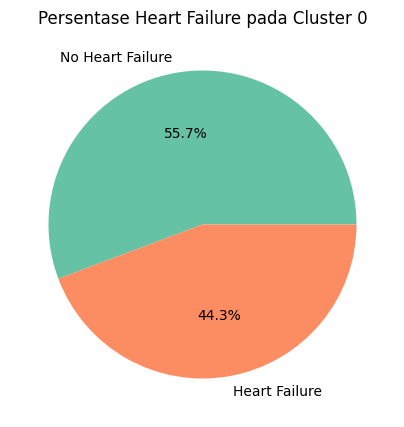

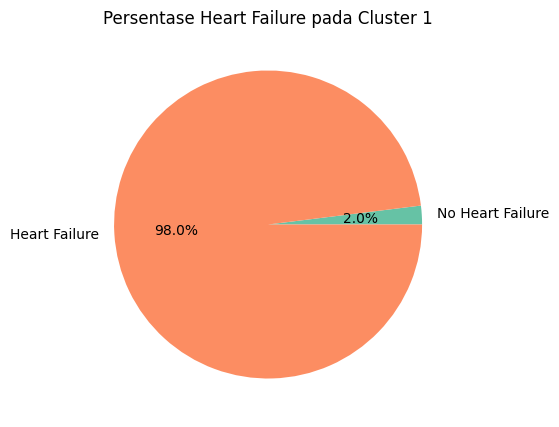

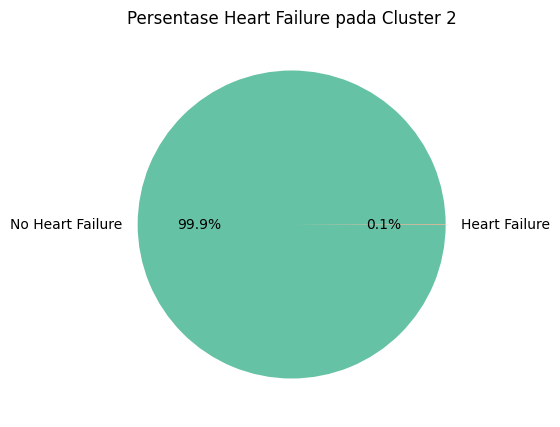

In [ ]:
# Pie chart untuk HEART FAILURE
heart_failure_per_cluster = df_cluster.groupby(['Cluster', 'HEART FAILURE']).size().unstack().fillna(0)
heart_failure_per_cluster.columns = ['No Heart Failure', 'Heart Failure']
heart_failure_percentage = heart_failure_per_cluster.div(heart_failure_per_cluster.sum(axis=1), axis=0) * 100

for cluster in heart_failure_percentage.index:
    plt.figure(figsize=(5, 5))
    plt.pie(heart_failure_percentage.loc[cluster], labels=heart_failure_percentage.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase Heart Failure pada Cluster {cluster}')
    plt.show()

**Interpretasi : Persentase Pasien terkena Diabetes Mellitus**

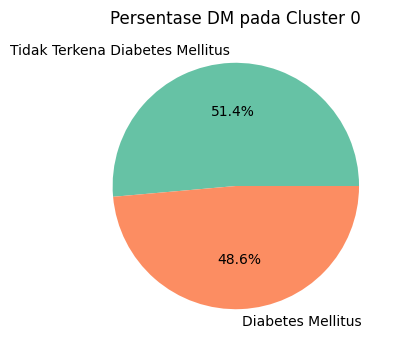

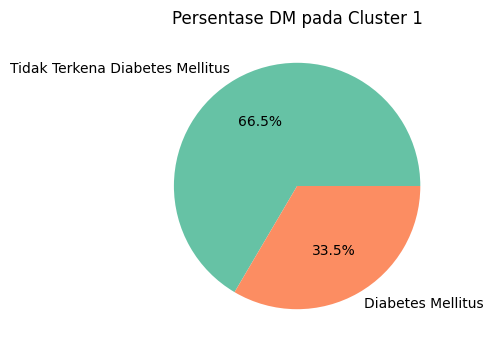

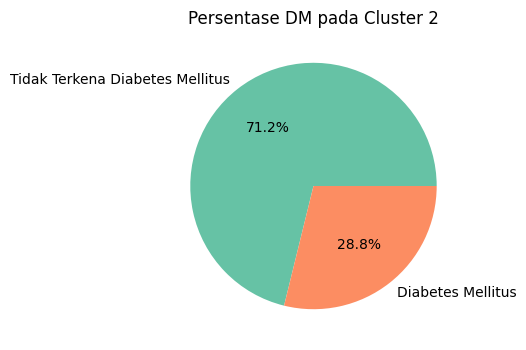

In [ ]:
# Pie chart untuk DM (Diabetes Mellitus)
dm_per_cluster = df_cluster.groupby(['Cluster', 'DM']).size().unstack().fillna(0)
dm_per_cluster.columns = ['Tidak Terkena Diabetes Mellitus', 'Diabetes Mellitus']
dm_percentage = dm_per_cluster.div(dm_per_cluster.sum(axis=1), axis=0) * 100

for cluster in dm_percentage.index:
    plt.figure(figsize=(4, 4))
    plt.pie(dm_percentage.loc[cluster], labels=dm_percentage.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase DM pada Cluster {cluster}')
    plt.show()

- Dapat terlihat bahwa persentase pasien paling banyak terkena Heart Failure yaitu pada Cluster 1 dan cluster 2
- Sedangkan Pasien paling banyak yang tidak terkena Heart Failure yaitu pada Cluster 0

### **Clustering dengan : DBSCAN**

Eps: 0.3, Min_samples: 3, Silhouette Score: -0.1774445147960222
Eps: 0.4, Min_samples: 3, Silhouette Score: -0.27387017868118085
Eps: 0.5, Min_samples: 3, Silhouette Score: -0.30731338081773674
Eps: 0.5, Min_samples: 4, Silhouette Score: -0.1481348422057857
Eps: 0.6, Min_samples: 3, Silhouette Score: -0.3367880863049799
Eps: 0.6, Min_samples: 4, Silhouette Score: -0.24820806211363283
Eps: 0.6, Min_samples: 5, Silhouette Score: -0.04298328410723698
Eps: 0.7, Min_samples: 3, Silhouette Score: -0.37046689952628975
Eps: 0.7, Min_samples: 4, Silhouette Score: -0.34587539263551126
Eps: 0.7, Min_samples: 5, Silhouette Score: -0.16401525713583384
Eps: 0.7, Min_samples: 6, Silhouette Score: -0.1638170653284721
Eps: 0.7, Min_samples: 7, Silhouette Score: -0.15169297263391124
Best Silhouette Score: -0.04298328410723698
Best Params: Eps = 0.6, Min_samples = 5


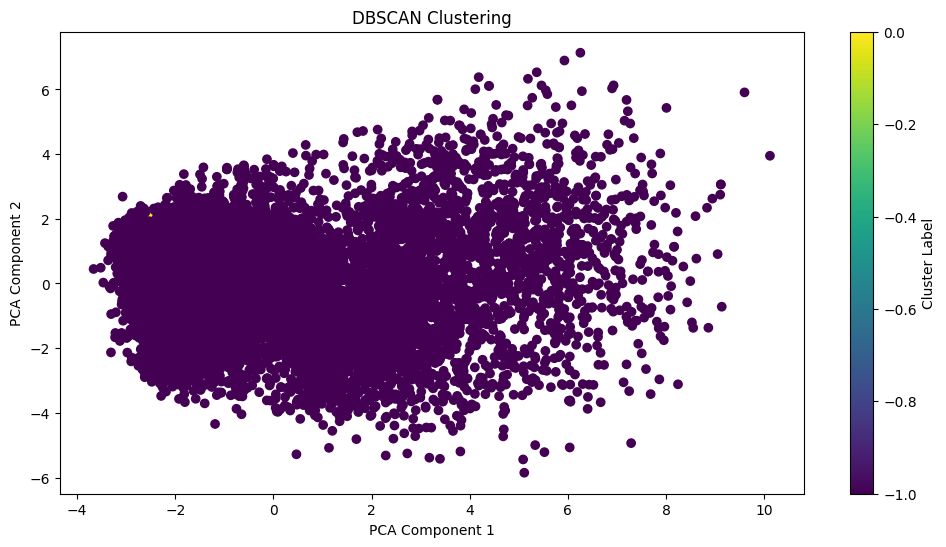

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df_cluster
# Example: df_cluster = pd.read_csv('your_data.csv')

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Optional: Applying PCA for dimensionality reduction
pca = PCA(n_components=23)
df_pca = pca.fit_transform(df_scaled)

# Function to try different DBSCAN parameters
def try_dbscan(eps_values, min_samples_values):
    best_silhouette = -1
    best_params = None
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = dbscan.fit_predict(df_pca)

            # Check if more than 1 cluster was found
            if len(set(cluster_labels)) > 1:
                silhouette_avg = silhouette_score(df_pca, cluster_labels)
                print(f'Eps: {eps}, Min_samples: {min_samples}, Silhouette Score:
                {silhouette_avg}')

                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_params = (eps, min_samples)
                    best_labels = cluster_labels

    return best_silhouette, best_params, best_labels

# Define the range of eps and min_samples to try
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [3, 4, 5, 6, 7]

# Find the best DBSCAN parameters
best_silhouette, best_params, best_labels = try_dbscan(eps_values, min_samples_values)

print(f'Best Silhouette Score: {best_silhouette}')
print(f'Best Params: Eps = {best_params[0]}, Min_samples = {best_params[1]}')

# Plotting the best results
plt.figure(figsize=(12, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=best_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
print ("Silhoutte Score terbaik yang diambil dari percobaan")

# Applying DBSCAN with best parameters found
dbscan = DBSCAN(eps=0.5, min_samples=4)
cluster_labels = dbscan.fit_predict(df_pca)

# Check if more than 1 cluster was found
if len(set(cluster_labels)) > 1:
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("DBSCAN did not find more than one cluster.")


Silhoutte Score terbaik yang diambil dari percobaan
Silhouette Score: -0.1481348422057857


In [ ]:
# Adding the best labels to the original DataFrame
df_cluster['DBSCAN_Cluster'] = best_labels

# Re-checking if the column is correctly added
if 'DBSCAN_Cluster' not in df_cluster.columns:
    raise ValueError("'DBSCAN_Cluster' column not found in df_cluster.")

In [ ]:
# Analisis cluster
cluster_counts_dbscan = df_cluster['DBSCAN_Cluster'].value_counts().sort_index()
print("Jumlah data di tiap cluster untuk DBSCAN Clustering:")
print(cluster_counts_dbscan)

# Analisis cluster
cluster_analysis_dbscan = df_cluster.groupby('DBSCAN_Cluster').mean()
print("Rata-rata fitur untuk tiap cluster (DBSCAN):")
cluster_analysis_dbscan

Jumlah data di tiap cluster untuk DBSCAN Clustering:
DBSCAN_Cluster
-1    12546
 0        5
Name: count, dtype: int64
Rata-rata fitur untuk tiap cluster (DBSCAN):


AGE    GENDER     RURAL  \
DBSCAN_Cluster                                  
-1              61.404193  0.634784  0.765901   
 0              56.800000  0.000000  1.000000   

                TYPE OF ADMISSION-EMERGENCY/OPD  DURATION OF STAY  \
DBSCAN_Cluster                                                      
-1                                     0.311255          6.452415   
 0                                     1.000000          2.000000   

                duration of intensive unit stay  SMOKING    ALCOHOL       DM  \
DBSCAN_Cluster                                                                 
-1                                     3.830703  0.050295  0.066635  0.32345   
 0                                     0.400000  0.000000  0.000000  0.00000   

                     HTN  ...  CARDIOGENIC SHOCK     SHOCK  \
DBSCAN_Cluster            ...                                
-1              0.489479  ...           0.058186  0.042563   
 0              1.000000  ...           0.000000  0.000000   

                PULMONARY EMBOLISM  CHEST INFECTION   OUTCOME         HB  \
DBSCAN_Cluster                                                             
-1                        0.014666         0.022079  1.004224  12.235022   
 0                        0.000000         0.000000  1.000000  11.020000   

                  month                   year   Cluster  Agg_Cluster  
DBSCAN_Cluster                                                         
-1              6.51355                    inf  1.516978     0.878686  
 0              6.80000  4036403640364036096.0  2.000000     1.000000  

[2 rows x 55 columns]

<ipython-input-108-513f89b20aa5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='DBSCAN_Cluster', y='AGE', data=mean_age_per_cluster_dbscan, palette='viridis')


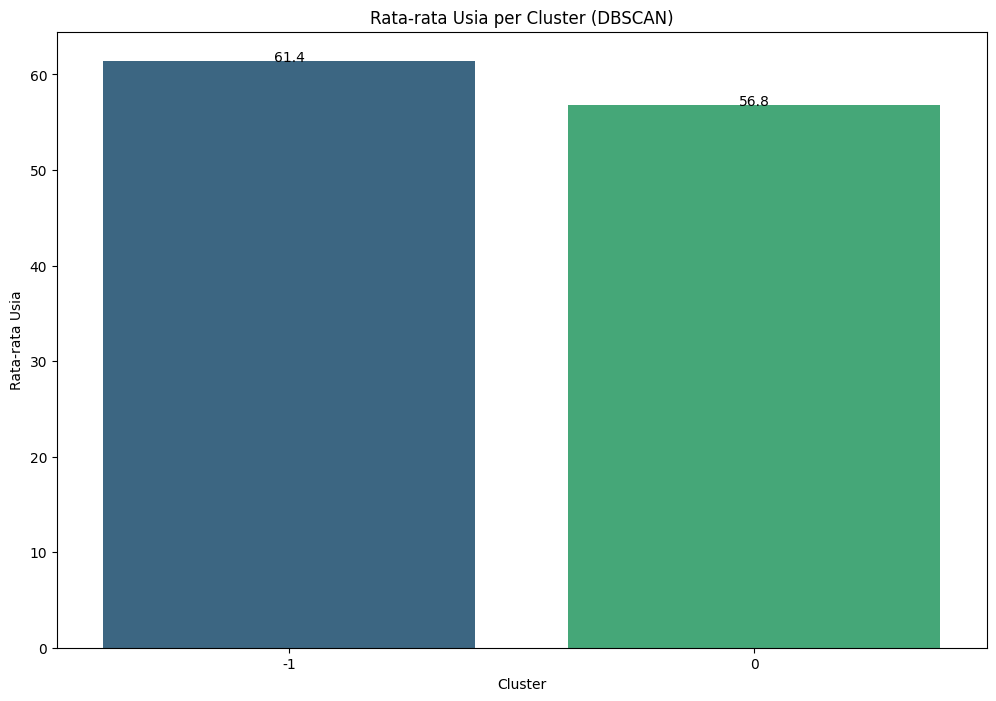

In [ ]:
# Interpretasi: Rata-rata umur pasien di rumah sakit
mean_age_per_cluster_dbscan = df_cluster.groupby('DBSCAN_Cluster')['AGE'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='DBSCAN_Cluster', y='AGE', data=mean_age_per_cluster_dbscan, palette='viridis')
for index, row in mean_age_per_cluster_dbscan.iterrows():
    bar_plot.text(row.name, row.AGE, round(row.AGE, 2), color='black', ha="center")
plt.title('Rata-rata Usia per Cluster (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Usia')
plt.show()

<Figure size 1400x800 with 0 Axes>

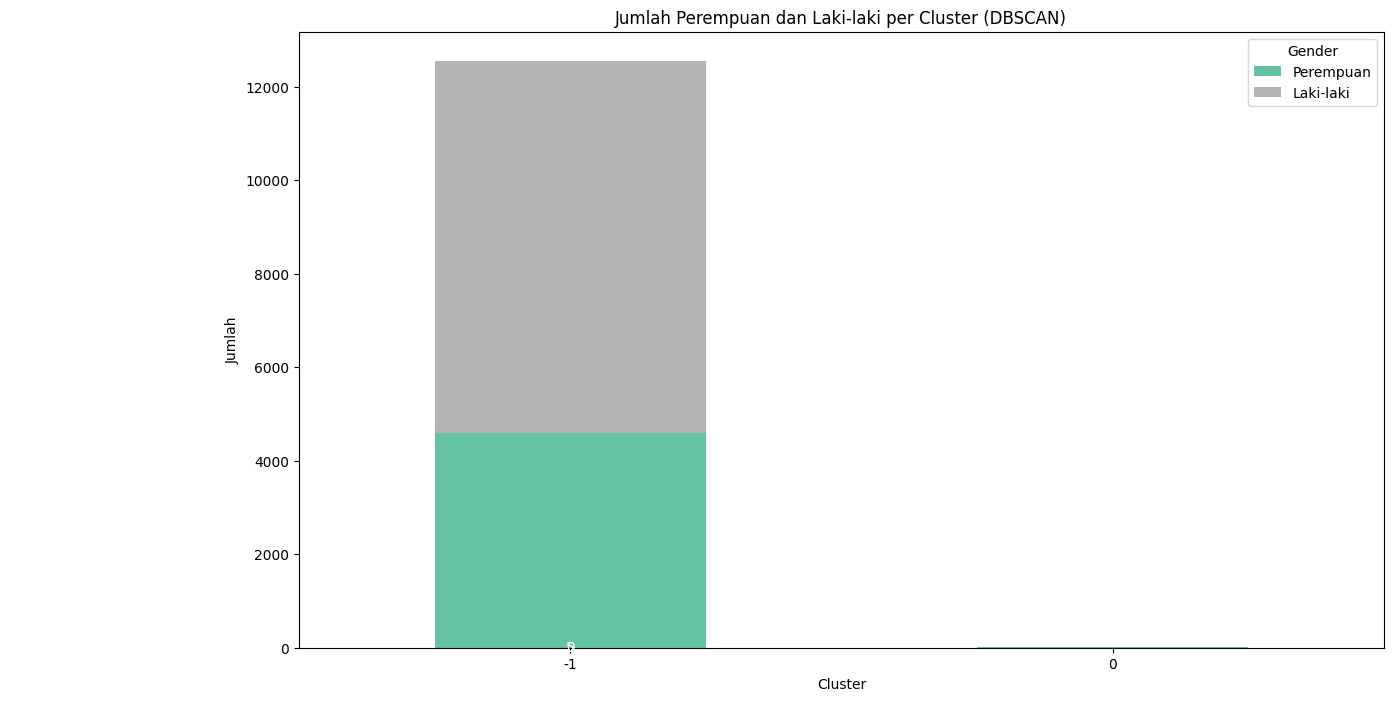

In [ ]:
# Interpretasi: Jumlah Gender Pasien di rumah sakit
gender_counts_per_cluster_dbscan = df_cluster.groupby(['DBSCAN_Cluster', 'GENDER']).size().unstack().fillna(0)
gender_counts_per_cluster_dbscan.columns = ['Perempuan', 'Laki-laki']

plt.figure(figsize=(14, 8))
bar_plot = gender_counts_per_cluster_dbscan.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
for cluster in gender_counts_per_cluster_dbscan.index:
    for gender in gender_counts_per_cluster_dbscan.columns:
        count = gender_counts_per_cluster_dbscan.loc[cluster, gender]
        plt.text(cluster, gender_counts_per_cluster_dbscan.loc[cluster, :].cumsum()[gender] - count / 2, int(count), ha='center', va='center', color='white')
plt.title('Jumlah Perempuan dan Laki-laki per Cluster (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

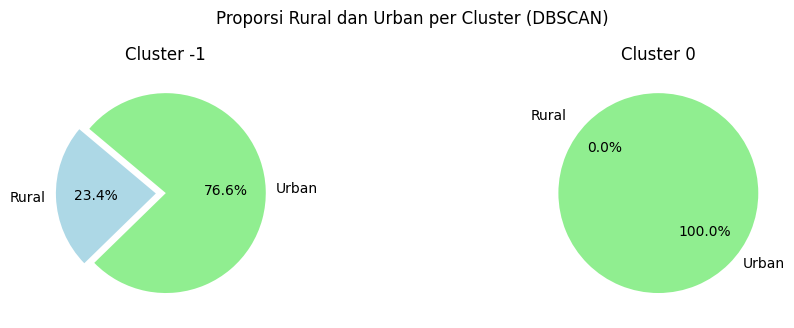

In [ ]:
# Interpretasi: Proporsi Tempat Tinggal Pasien yang terdaftar di Rumah sakit
rural_counts_per_cluster_dbscan = df_cluster.groupby(['DBSCAN_Cluster', 'RURAL']).size().unstack().fillna(0)
rural_counts_per_cluster_dbscan.columns = ['Rural', 'Urban']
rural_counts_per_cluster_dbscan['Total'] = rural_counts_per_cluster_dbscan.sum(axis=1)

plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)
for i, cluster in enumerate(rural_counts_per_cluster_dbscan.index):
    plt.subplot(2, 2, i + 1)
    plt.pie(rural_counts_per_cluster_dbscan.loc[cluster, ['Rural', 'Urban']], labels=['Rural', 'Urban'], colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
    plt.title(f'Cluster {cluster}')
plt.suptitle('Proporsi Rural dan Urban per Cluster (DBSCAN)')
plt.tight_layout()
plt.show()

<ipython-input-111-8e5c3816636b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='DBSCAN_Cluster', y='DURATION OF STAY', data=duration_of_stay_mean_dbscan, palette='viridis')


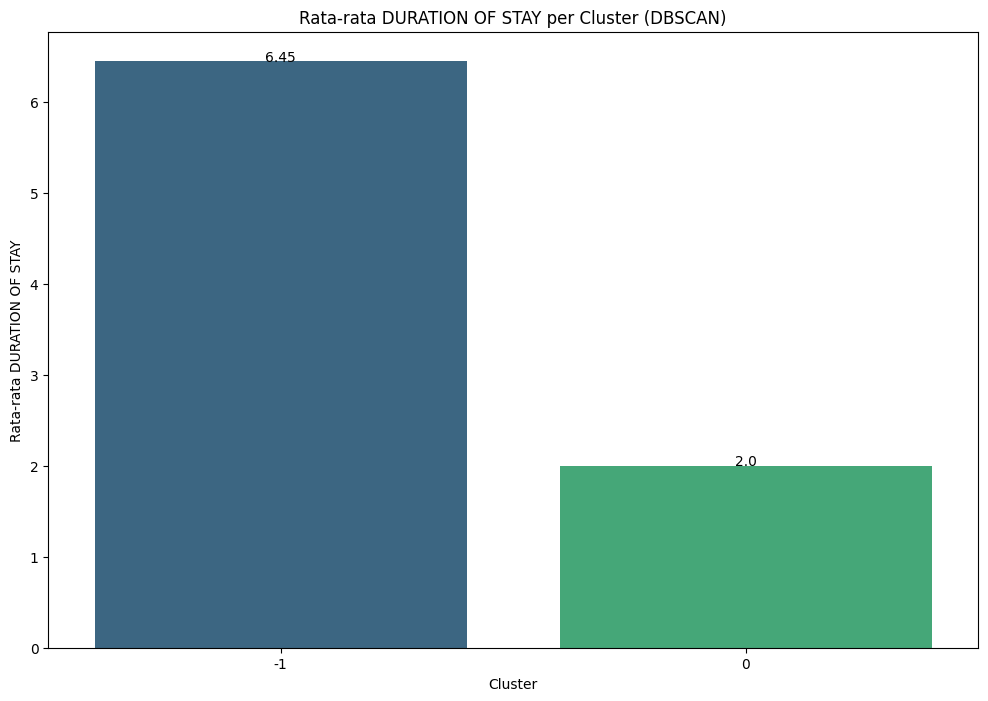

In [ ]:
# Interpretasi: Rata-Rata Durasi Lama pasien menginap
duration_of_stay_mean_dbscan = df_cluster.groupby('DBSCAN_Cluster')['DURATION OF STAY'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='DBSCAN_Cluster', y='DURATION OF STAY', data=duration_of_stay_mean_dbscan, palette='viridis')
for index, row in duration_of_stay_mean_dbscan.iterrows():
    bar_plot.text(row.name, row['DURATION OF STAY'], round(row['DURATION OF STAY'], 2), color='black', ha="center")
plt.title('Rata-rata DURATION OF STAY per Cluster (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata DURATION OF STAY')
plt.show()


<ipython-input-112-fd24c36ac0b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='DBSCAN_Cluster', y='duration of intensive unit stay', data=duration_of_intensive_unit_stay_mean_dbscan, palette='viridis')


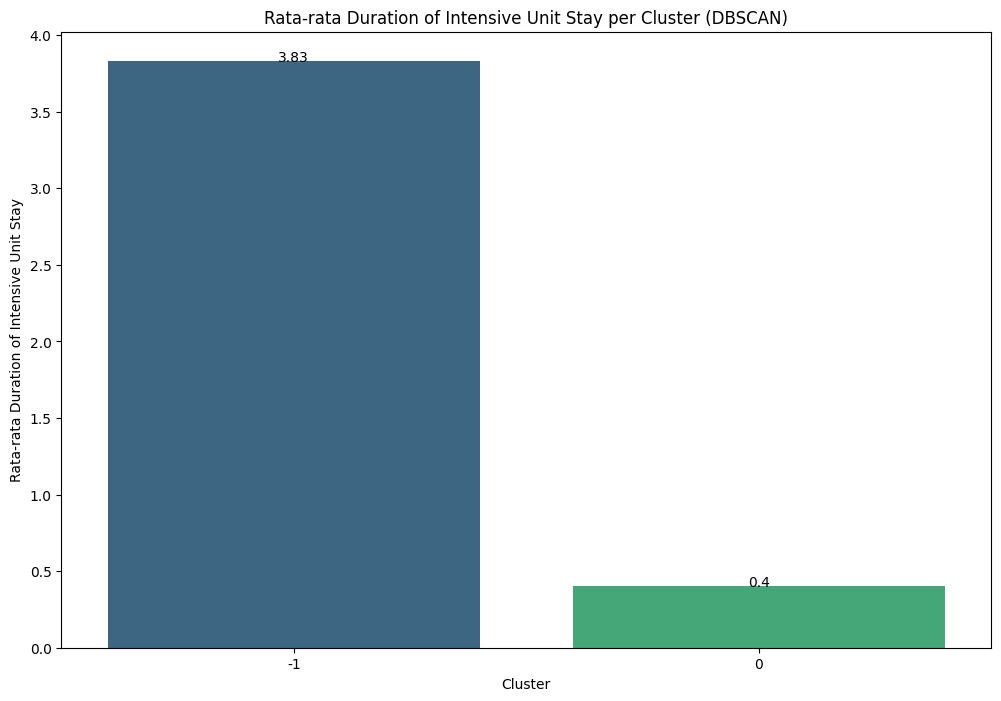

In [ ]:

# Interpretasi: Rata-rata durasi lama pasien menginap di ICU
duration_of_intensive_unit_stay_mean_dbscan = df_cluster.groupby('DBSCAN_Cluster')['duration of intensive unit stay'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='DBSCAN_Cluster', y='duration of intensive unit stay', data=duration_of_intensive_unit_stay_mean_dbscan, palette='viridis')
for index, row in duration_of_intensive_unit_stay_mean_dbscan.iterrows():
    bar_plot.text(row.name, row['duration of intensive unit stay'], round(row['duration of intensive unit stay'], 2), color='black', ha="center")
plt.title('Rata-rata Duration of Intensive Unit Stay per Cluster (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Duration of Intensive Unit Stay')
plt.show()


<ipython-input-113-fd24c36ac0b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='DBSCAN_Cluster', y='duration of intensive unit stay', data=duration_of_intensive_unit_stay_mean_dbscan, palette='viridis')


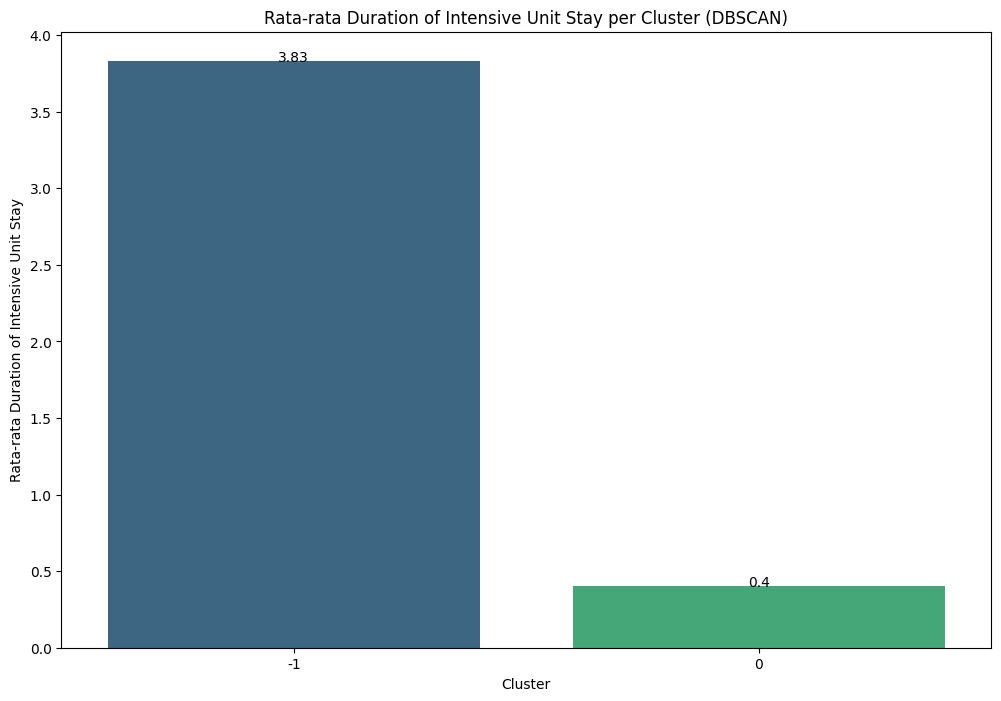

In [ ]:

# Interpretasi: Rata-rata durasi lama pasien menginap di ICU
duration_of_intensive_unit_stay_mean_dbscan = df_cluster.groupby('DBSCAN_Cluster')['duration of intensive unit stay'].mean().reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='DBSCAN_Cluster', y='duration of intensive unit stay', data=duration_of_intensive_unit_stay_mean_dbscan, palette='viridis')
for index, row in duration_of_intensive_unit_stay_mean_dbscan.iterrows():
    bar_plot.text(row.name, row['duration of intensive unit stay'], round(row['duration of intensive unit stay'], 2), color='black', ha="center")
plt.title('Rata-rata Duration of Intensive Unit Stay per Cluster (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Duration of Intensive Unit Stay')
plt.show()


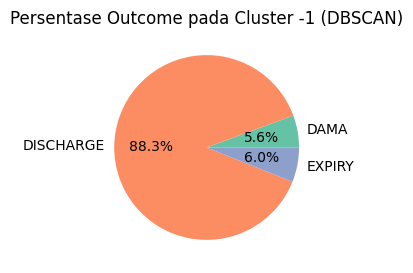

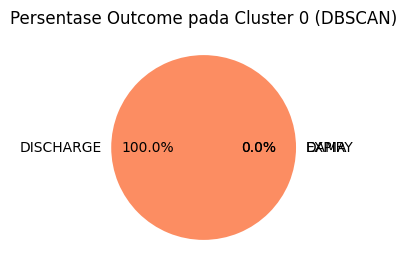

In [ ]:
# Interpretasi: Persentase Outcome Pasien
outcome_per_cluster_dbscan = df_cluster.groupby(['DBSCAN_Cluster', 'OUTCOME']).size().unstack().fillna(0)
outcome_per_cluster_dbscan.columns = ['DAMA', 'DISCHARGE', 'EXPIRY']
outcome_percentage_dbscan = outcome_per_cluster_dbscan.div(outcome_per_cluster_dbscan.sum(axis=1), axis=0) * 100

for cluster in outcome_percentage_dbscan.index:
    plt.figure(figsize=(4, 3))
    plt.pie(outcome_percentage_dbscan.loc[cluster], labels=outcome_percentage_dbscan.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase Outcome pada Cluster {cluster} (DBSCAN)')
    plt.show()


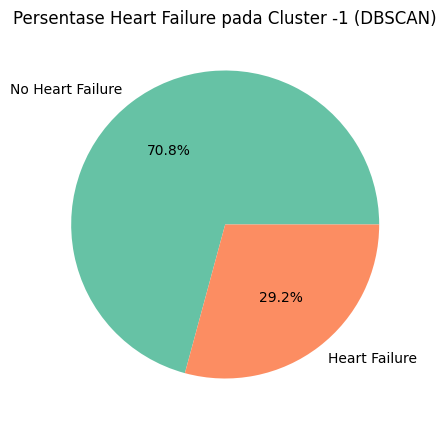

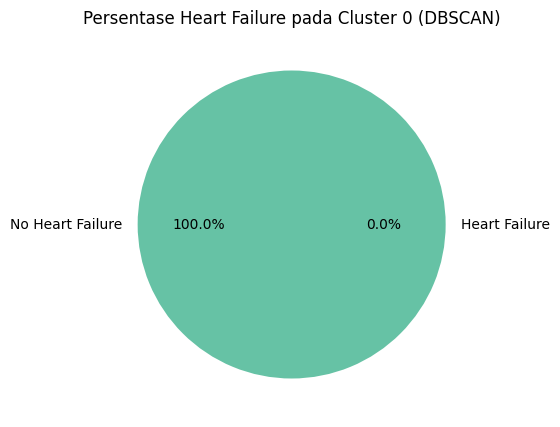

In [ ]:


# Interpretasi: Persentase Pasien terkena Heart Failure
heart_failure_per_cluster_dbscan = df_cluster.groupby(['DBSCAN_Cluster', 'HEART FAILURE']).size().unstack().fillna(0)
heart_failure_per_cluster_dbscan.columns = ['No Heart Failure', 'Heart Failure']
heart_failure_percentage_dbscan = heart_failure_per_cluster_dbscan.div(heart_failure_per_cluster_dbscan.sum(axis=1), axis=0) * 100

for cluster in heart_failure_percentage_dbscan.index:
    plt.figure(figsize=(5, 5))
    plt.pie(heart_failure_percentage_dbscan.loc[cluster], labels=heart_failure_percentage_dbscan.columns, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Persentase Heart Failure pada Cluster {cluster} (DBSCAN)')
    plt.show()



# Kaggle Klasifikasi

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

import plotly.express as px
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler

In [ ]:
train_data = pd.read_csv('train_klasifikasi.csv')
test_data = pd.read_csv('test_klasifikasi.csv')
test_data_akhir = pd.read_csv('test_klasifikasi.csv')

In [ ]:
train_data.dtypes

SNO                                 int64
MRD No.                            object
D.O.A                              object
D.O.D                              object
AGE                                 int64
GENDER                             object
RURAL                              object
TYPE OF ADMISSION-EMERGENCY/OPD    object
month year                         object
DURATION OF STAY                    int64
duration of intensive unit stay     int64
SMOKING                             int64
ALCOHOL                             int64
DM                                  int64
HTN                                 int64
CAD                                 int64
PRIOR CMP                           int64
CKD                                 int64
TLC                                object
PLATELETS                          object
GLUCOSE                            object
UREA                               object
CREATININE                         object
BNP                               

In [ ]:
total_rows, total_attributes = train_data.shape
print("Jumlah data: ", total_rows)
print("Jumlah atribut: ", total_attributes)

Jumlah data:  12551
Jumlah atribut:  56


In [ ]:
stats = train_data.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print ("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


Empty DataFrame
Columns: [redundant]
Index: []

In [ ]:
stats = test_data.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print ("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


Empty DataFrame
Columns: [redundant]
Index: []

In [ ]:
print ("Jumlah missing values tiap kolom\n", train_data.isnull().sum())

Jumlah missing values tiap kolom
 SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
TLC                                  30
PLATELETS                            29
GLUCOSE                             580
UREA                                 25
CREATININE                           31
BNP                                6615
RAISED

In [ ]:
print ("Jumlah missing values tiap kolom\n", test_data.isnull().sum())

Jumlah missing values tiap kolom
 SNO                                  0
MRD No.                              0
D.O.A                                0
D.O.D                                0
AGE                                  0
GENDER                               0
RURAL                                0
TYPE OF ADMISSION-EMERGENCY/OPD      0
month year                           0
DURATION OF STAY                     0
duration of intensive unit stay      0
SMOKING                              0
ALCOHOL                              0
DM                                   0
HTN                                  0
CAD                                  0
PRIOR CMP                            0
CKD                                  0
HB                                  17
TLC                                 18
PLATELETS                           19
GLUCOSE                             79
UREA                                18
CREATININE                          22
BNP                           

In [ ]:
import numpy as np

# Ganti nilai 'EMPTY' dengan NaN
train_data.replace('EMPTY', np.nan, inplace=True)

# Extract the relevant columns for calculating skewness
relevant_columns = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF']

# Konversi kolom yang relevan menjadi tipe data numerik
for col in relevant_columns:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')

# Calculate skewness for each of these columns
skewness_values = train_data[relevant_columns].skew()
print("Skewness values:")
print(skewness_values)

columns_to_impute = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'HB']

# Pastikan semua kolom yang akan diimputasi adalah numerik
for col in columns_to_impute:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')

# Impute missing values with median and mean
for col in columns_to_impute:
    if col in ['EF', 'PLATELETS']:
        mean_value = train_data[col].mean()
        train_data[col].fillna(mean_value, inplace=True)
    else:
        median_value = train_data[col].median()
        train_data[col].fillna(median_value, inplace=True)

# Check the number of missing values per column after imputation to confirm
print("Jumlah missing values tiap kolom setelah imputasi:")
print(train_data[columns_to_impute].isnull().sum())

Skewness values:
TLC           12.706371
PLATELETS      1.454696
GLUCOSE        2.018762
UREA           2.814217
CREATININE     3.989751
BNP            2.096849
EF            -0.034840
dtype: float64
Jumlah missing values tiap kolom setelah imputasi:
TLC           0
PLATELETS     0
GLUCOSE       0
UREA          0
CREATININE    0
BNP           0
EF            0
HB            0
dtype: int64


In [ ]:
import numpy as np

# Ganti nilai 'EMPTY' dengan NaN
test_data.replace('EMPTY', np.nan, inplace=True)

# Extract the relevant columns for calculating skewness
relevant_columns = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF']

# Konversi kolom yang relevan menjadi tipe data numerik
for col in relevant_columns:
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

# Calculate skewness for each of these columns
skewness_values = test_data[relevant_columns].skew()
print("Skewness values:")
print(skewness_values)

columns_to_impute = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'HB']

# Pastikan semua kolom yang akan diimputasi adalah numerik
for col in columns_to_impute:
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

# Impute missing values with median and mean
for col in columns_to_impute:
    if col in ['EF', 'PLATELETS']:
        mean_value = test_data[col].mean()
        test_data[col].fillna(mean_value, inplace=True)
    else:
        median_value = test_data[col].median()
        test_data[col].fillna(median_value, inplace=True)

# Check the number of missing values per column after imputation to confirm
print("Jumlah missing values tiap kolom setelah imputasi:")
print(test_data[columns_to_impute].isnull().sum())

Skewness values:
TLC           11.116035
PLATELETS      1.779039
GLUCOSE        1.924019
UREA           2.611464
CREATININE     3.797754
BNP            2.155379
EF            -0.043554
dtype: float64
Jumlah missing values tiap kolom setelah imputasi:
TLC           0
PLATELETS     0
GLUCOSE       0
UREA          0
CREATININE    0
BNP           0
EF            0
HB            0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom-kolom kategorikal
categorical_columns = train_data.select_dtypes(include=['object']).columns

print("Kolom kategorikal:")
categorical_columns

Kolom kategorikal:


Index(['MRD No.', 'D.O.A', 'D.O.D', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'CHEST INFECTION',
       'OUTCOME'],
      dtype='object')

In [ ]:
# Lakukan encoding pada kolom-kolom kategorikal
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    train_data[col] = label_encoders[col].fit_transform(train_data[col].astype(str))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom-kolom kategorikal
categorical_columns = test_data.select_dtypes(include=['object']).columns

print("Kolom kategorikal:")
categorical_columns

Kolom kategorikal:


Index(['D.O.A', 'D.O.D', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
       'month year'],
      dtype='object')

In [ ]:
# Lakukan encoding pada kolom-kolom kategorikal
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    test_data[col] = label_encoders[col].fit_transform(test_data[col].astype(str))

In [ ]:
# Menghapus kolom 'D.O.A', 'D.O.D'
train_data = train_data.drop(columns=['SNO', 'MRD No.', 'D.O.A', 'D.O.D'])

In [ ]:
# Mengecek jumlah nilai NaN di setiap kolom
nan_counts = train_data.isnull().sum()

# Menampilkan kolom-kolom yang mengandung nilai NaN beserta jumlahnya
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)


In [ ]:
# Menghitung jumlah nilai 'NILL' di setiap kolom
nill_counts = (train_data == 'NILL').sum()

# Menampilkan kolom yang mengandung nilai 'NILL' beserta jumlahnya
nill_columns = nill_counts[nill_counts > 0]
print(nill_columns)

Series([], dtype: int64)


In [ ]:
# Memisahkan fitur dan label
X_train = train_data.drop(columns=['OUTCOME'])
y_train = train_data['OUTCOME']

In [ ]:
X_test = test_data

In [ ]:
# Memeriksa distribusi kelas pada data target
class_distribution = y_train.value_counts(normalize=True)

print("Distribusi Kelas pada Data Target:")
class_distribution

Distribusi Kelas pada Data Target:


OUTCOME
1    0.883276
2    0.060473
0    0.056250
Name: proportion, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Melakukan seleksi fitur
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X_train, y_train.values.ravel())

# Mendapatkan skor tiap fitur
feature_scores = selector.scores_

# Membuat DataFrame untuk menampilkan skor fitur
feature_scores_df = pd.DataFrame({'Feature': X_train.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

print("Skor Fitur:")
print(feature_scores_df)


Skor Fitur:
                            Feature        Score
47                            SHOCK  2717.095979
46                CARDIOGENIC SHOCK  1337.829918
29                            HFREF   470.676250
17                             UREA   417.305480
34                              AKI   387.916561
21                               EF   365.649386
28                    HEART FAILURE   253.040643
12                        PRIOR CMP   235.000321
14                              TLC   223.636565
19                              BNP   211.815317
18                       CREATININE   200.476731
3   TYPE OF ADMISSION-EMERGENCY/OPD   193.943314
38                               VT   138.624537
11                              CAD   130.836911
13                              CKD   118.856877
50                               HB    91.473595
23                          ANAEMIA    79.141553
20           RAISED CARDIAC ENZYMES    69.629858
25                              ACS    66.721869
24      

In [ ]:
selected_features = [
    'SHOCK', 'CARDIOGENIC SHOCK', 'HFREF', 'UREA', 'AKI',
    'EF', 'HEART FAILURE', 'PRIOR CMP', 'TLC', 'BNP',
    'CREATININE', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'VT', 'CAD', 'CKD'
]

In [ ]:
X_train = X_train[selected_features]

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from numpy import where
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.base import clone

In [ ]:
# Definisi MLPClassifier class
classifier3 = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(100,50),
    solver='adam',
    random_state=42,
    activation='relu',
    learning_rate_init=0.01
)

In [ ]:
DecisionTreeK = DecisionTreeClassifier()

In [ ]:
stepsK = [('over', RandomOverSampler(sampling_strategy='minority')), ('model', DecisionTreeK)]
pipelineK = Pipeline(steps=stepsK)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

# Evaluasi model
for i in range(len(scoring)):
  score = cross_val_score(pipelineK, X_train, y_train, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8620832004518764
f1_macro score: 0.5479930181963358
precision_micro score: 0.863437179200363
precision_macro score: 0.546601358660637
recall_micro score: 0.8591350250134469
recall_macro score: 0.5443346858120124


In [ ]:
pipelineK.fit(X_train, y_train)
y_predK = pipelineK.predict(test_data[selected_features])
Counter(y_predK)

Counter({1: 1389, 2: 100, 0: 87})

In [ ]:
y_pred_Kaggle = pd.DataFrame(y_predK, columns=['OUTCOME'])

In [ ]:
test_snoK = test_data['SNO']
test_outcomeK = y_pred_Kaggle['OUTCOME']
outcome_Kaggle = pd.concat([test_snoK, test_outcomeK], axis=1)
outcome_Kaggle.head()

SNO  OUTCOME
0  8310        1
1  9393        1
2   478        1
3  9884        1
4  6586        1

In [ ]:
outcome_Kaggle.to_csv('Kaggle_Kelompok_K5.csv', index=False)

# Kaggle Regresi

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

import plotly.express as px
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler

In [ ]:
train_data = pd.read_csv('train_regression.csv')
test_data = pd.read_csv('test_regression.csv')
test_data1 = pd.read_csv('test_regression.csv')

In [ ]:
train_data.dtypes

SNO                                 int64
MRD No.                            object
D.O.A                              object
D.O.D                              object
AGE                                 int64
GENDER                             object
RURAL                              object
TYPE OF ADMISSION-EMERGENCY/OPD    object
month year                         object
DURATION OF STAY                    int64
duration of intensive unit stay     int64
SMOKING                             int64
ALCOHOL                             int64
DM                                  int64
HTN                                 int64
CAD                                 int64
PRIOR CMP                           int64
CKD                                 int64
TLC                                object
PLATELETS                          object
GLUCOSE                            object
UREA                               object
CREATININE                         object
BNP                               

In [ ]:
total_rows, total_attributes = train_data.shape
print("Jumlah data: ", total_rows)
print("Jumlah atribut: ", total_attributes)

Jumlah data:  12551
Jumlah atribut:  56


In [ ]:
stats = train_data.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print ("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


Empty DataFrame
Columns: [redundant]
Index: []

In [ ]:
stats = test_data.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print ("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


Empty DataFrame
Columns: [redundant]
Index: []

In [ ]:
print ("Jumlah missing values tiap kolom\n", train_data.isnull().sum())

Jumlah missing values tiap kolom
 SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
TLC                                  30
PLATELETS                            29
GLUCOSE                             580
UREA                                 25
CREATININE                           31
BNP                                6615
RAISED

In [ ]:
print ("Jumlah missing values tiap kolom\n", test_data.isnull().sum())

Jumlah missing values tiap kolom
 SNO                                  0
MRD No.                              0
D.O.A                                0
D.O.D                                0
AGE                                  0
GENDER                               0
RURAL                                0
TYPE OF ADMISSION-EMERGENCY/OPD      0
month year                           0
DURATION OF STAY                     0
SMOKING                              0
ALCOHOL                              0
DM                                   0
HTN                                  0
CAD                                  0
PRIOR CMP                            0
CKD                                  0
TLC                                  5
PLATELETS                            6
GLUCOSE                             70
UREA                                 5
CREATININE                           5
BNP                                753
RAISED CARDIAC ENZYMES               0
EF                            

In [ ]:
import numpy as np

# Ganti nilai 'EMPTY' dengan NaN
train_data.replace('EMPTY', np.nan, inplace=True)

# Extract the relevant columns for calculating skewness
relevant_columns = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF']

# Konversi kolom yang relevan menjadi tipe data numerik
for col in relevant_columns:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')

# Calculate skewness for each of these columns
skewness_values = train_data[relevant_columns].skew()
print("Skewness values:")
print(skewness_values)

columns_to_impute = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'HB']

# Pastikan semua kolom yang akan diimputasi adalah numerik
for col in columns_to_impute:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')

# Impute missing values with median and mean
for col in columns_to_impute:
    if col in ['EF', 'PLATELETS']:
        mean_value = train_data[col].mean()
        train_data[col].fillna(mean_value, inplace=True)
    else:
        median_value = train_data[col].median()
        train_data[col].fillna(median_value, inplace=True)

# Check the number of missing values per column after imputation to confirm
print("Jumlah missing values tiap kolom setelah imputasi:")
print(train_data[columns_to_impute].isnull().sum())

Skewness values:
TLC           12.706371
PLATELETS      1.454696
GLUCOSE        2.018762
UREA           2.814217
CREATININE     3.989751
BNP            2.096849
EF            -0.034840
dtype: float64
Jumlah missing values tiap kolom setelah imputasi:
TLC           0
PLATELETS     0
GLUCOSE       0
UREA          0
CREATININE    0
BNP           0
EF            0
HB            0
dtype: int64


In [ ]:
import numpy as np

# Ganti nilai 'EMPTY' dengan NaN
test_data.replace('EMPTY', np.nan, inplace=True)

# Extract the relevant columns for calculating skewness
relevant_columns = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF']

# Konversi kolom yang relevan menjadi tipe data numerik
for col in relevant_columns:
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

# Calculate skewness for each of these columns
skewness_values = test_data[relevant_columns].skew()
print("Skewness values:")
print(skewness_values)

columns_to_impute = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'HB']

# Pastikan semua kolom yang akan diimputasi adalah numerik
for col in columns_to_impute:
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

# Impute missing values with median and mean
for col in columns_to_impute:
    if col in ['EF', 'PLATELETS']:
        mean_value = test_data[col].mean()
        test_data[col].fillna(mean_value, inplace=True)
    else:
        median_value = test_data[col].median()
        test_data[col].fillna(median_value, inplace=True)

# Check the number of missing values per column after imputation to confirm
print("Jumlah missing values tiap kolom setelah imputasi:")
print(test_data[columns_to_impute].isnull().sum())

Skewness values:
TLC           11.774741
PLATELETS      0.887954
GLUCOSE        1.814552
UREA           3.752053
CREATININE     3.697900
BNP            2.082436
EF            -0.114580
dtype: float64
Jumlah missing values tiap kolom setelah imputasi:
TLC           0
PLATELETS     0
GLUCOSE       0
UREA          0
CREATININE    0
BNP           0
EF            0
HB            0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom-kolom kategorikal
categorical_columns = train_data.select_dtypes(include=['object']).columns

print("Kolom kategorikal:")
categorical_columns

Kolom kategorikal:


Index(['MRD No.', 'D.O.A', 'D.O.D', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'CHEST INFECTION',
       'OUTCOME'],
      dtype='object')

In [ ]:
# Lakukan encoding pada kolom-kolom kategorikal
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    train_data[col] = label_encoders[col].fit_transform(train_data[col].astype(str))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom-kolom kategorikal
categorical_columns = test_data.select_dtypes(include=['object']).columns

print("Kolom kategorikal:")
categorical_columns

Kolom kategorikal:


Index(['D.O.A', 'D.O.D', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
       'month year', 'OUTCOME'],
      dtype='object')

In [ ]:
# Lakukan encoding pada kolom-kolom kategorikal
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    test_data[col] = label_encoders[col].fit_transform(test_data[col].astype(str))

In [ ]:
# Menghapus kolom tidak penting
train_data = train_data.drop(columns=['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'month year'])
test_data = test_data.drop(columns=['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'month year'])

In [ ]:
# Mengecek jumlah nilai NaN di setiap kolom
nan_counts = train_data.isnull().sum()

# Menampilkan kolom-kolom yang mengandung nilai NaN beserta jumlahnya
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)


In [ ]:
# Menghitung jumlah nilai 'NILL' di setiap kolom
nill_counts = (train_data == 'NILL').sum()

# Menampilkan kolom yang mengandung nilai 'NILL' beserta jumlahnya
nill_columns = nill_counts[nill_counts > 0]
print(nill_columns)

Series([], dtype: int64)


In [ ]:
df_all = pd.get_dummies(pd.concat([train_data, test_data], axis=0))

In [ ]:
train_data = df_all[df_all['duration of intensive unit stay'].notnull()]
test_data = df_all[df_all['duration of intensive unit stay'].isnull()].drop('duration of intensive unit stay', axis=1)

In [ ]:
x = train_data.drop(['duration of intensive unit stay'], axis = 1)
y = train_data['duration of intensive unit stay']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from numpy import where
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.base import clone

In [ ]:
# Menggunakan 5 alphas
alphas = [0.001,0.01, 0.1, 1, 10]

In [ ]:
# train linear
linear_bonus = LinearRegression()
linear_bonus.fit(X_train, y_train)

LinearRegression()

In [ ]:
scores = cross_val_score(linear_bonus, X_train, y_train, scoring='r2', cv=5)
print(f'Hasil Evaluasi cross validation Linear: {scores.mean()}')

Hasil Evaluasi cross validation Linear: 0.6817820886486106


In [ ]:
# List alpha
alphas = [0.001, 0.01, 0.1, 1, 10]

# Train Linear Regression
linear_bonus = LinearRegression()
linear_bonus.fit(X_train, y_train)

scores = cross_val_score(linear_bonus, X_train, y_train, scoring='r2', cv=5)
print(f'Hasil Evaluasi cross validation Linear: {scores.mean()}')

# Train Lasso
lasso_r2 = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    lasso_r2.append((alpha, r2))

best_alpha_lasso, best_r2_lasso = max(lasso_r2, key=lambda x: x[1])

print(f'Best alpha for Lasso: {best_alpha_lasso}')
print(f'Best R2 for Lasso: {best_r2_lasso}')

Hasil Evaluasi cross validation Linear: 0.6817820886486106
Best alpha for Lasso: 0.01
Best R2 for Lasso: 0.6224666060434371


In [ ]:
# train lasso
lasso_r2 = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    lasso_r2.append((alpha, r2))

best_alpha_lasso, best_r2_lasso = max(lasso_r2, key=lambda x: x[1])

In [ ]:

# train ridge
ridge_r2 = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    ridge_r2.append((alpha, r2))

best_alpha_ridge, best_r2_ridge = max(ridge_r2, key=lambda x: x[1])

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Choose the model with the highest R-squared
if best_r2_lasso >= best_r2_ridge:
    best_alpha = best_alpha_lasso
    best_model = Lasso(alpha=best_alpha)
    print("Selected model: Lasso")
else:
    best_alpha = best_alpha_ridge
    best_model = Ridge(alpha=best_alpha)
    print("Selected model: Ridge")

# Impute missing values in test data using median
imputer = SimpleImputer(strategy='median')
test_data_imputed = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

# Train the selected model with full training data
best_model.fit(x, y)

# Make predictions on test data
predictions = best_model.predict(test_data_imputed)

Selected model: Lasso


In [ ]:
presict_kaggle = pd.DataFrame(predictions, columns=['duration of intensive unit stay'])
presict_kaggle = presict_kaggle.assign(SNO=test_data1['SNO'])
presict_kaggle = presict_kaggle.reindex(columns=['SNO', 'duration of intensive unit stay'])
presict_kaggle.head()

SNO  duration of intensive unit stay
0  1539                         3.318406
1  9941                         5.171488
2  5048                         3.441952
3  7917                        10.485637
4  5275                         0.580486